## ***``Indian Liver Patients :: Data Analysis and Classification``***
![Liver_img1](Knowledge_Doc/Liver_Img.PNG)

#### **``Flow Diagram``**
![Flow_Diag](Knowledge_Doc/Flow_Diagram.PNG)

##### **If you want to attain more knowledge around the features of this dataset then refer to below document:**
[Features_Detailing_Doc](https://github.com/Rajesh-ML-Engg/Liver_Disease_Data_Analysis/blob/master/Detailing%20around%20Liver%20%26%20its%20components.docx)

In [1]:
## Import the required libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

%matplotlib inline

import category_encoders as ce

from sklearn import preprocessing as prep
from sklearn.utils import resample

from sklearn.model_selection import train_test_split as tts
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, roc_auc_score

from yellowbrick import ROCAUC

## Ignoring the warnings by messages
import warnings
warnings.filterwarnings("ignore", message="divide by zero encountered in divide")
warnings.filterwarnings("ignore", message="invalid value encountered in true_divide")
warnings.filterwarnings("ignore", message="invalid value encountered in double_scalars")

c:\users\rajsh\appdata\local\programs\python\python35\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
patients_df = pd.read_csv("Dataset/indian_liver_patient.csv")
patients_df.head(10)

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   
5   46    Male              1.8               0.7                   208   
6   26  Female              0.9               0.2                   154   
7   29  Female              0.9               0.3                   202   
8   17    Male              0.9               0.3                   202   
9   55    Male              0.7               0.2                   290   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   
5                        19                          14             7.6   
6                        16                          12             7.0   
7                        14                          11             6.7   
8                        22                          19             7.4   
9                        53                          58             6.8   

   Albumin  Albumin_and_Globulin_Ratio  Dataset  
0      3.3                        0.90        1  
1      3.2                        0.74        1  
2      3.3                        0.89        1  
3      3.4                        1.00        1  
4      2.4                        0.40        1  
5      4.4                        1.30        1  
6      3.5                        1.00        1  
7      3.6                        1.10        1  
8      4.1                        1.20        2  
9      3.4                        1.00        1

#### **``Data Shape``**

In [3]:
patients_df.shape

(583, 11)

#### **``Variables Datatypes``**

In [4]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age                           583 non-null int64
Gender                        583 non-null object
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Alkaline_Phosphotase          583 non-null int64
Alamine_Aminotransferase      583 non-null int64
Aspartate_Aminotransferase    583 non-null int64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    579 non-null float64
Dataset                       583 non-null int64
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


#### **``Check for Null/NaN or Missing values``**

In [5]:
label_font_dict = {'family':'calibri','size':18,'color':'coral','style':'italic'}
title_font_dict = {'family':'calibri','size':20,'color':'Blue','style':'italic'}

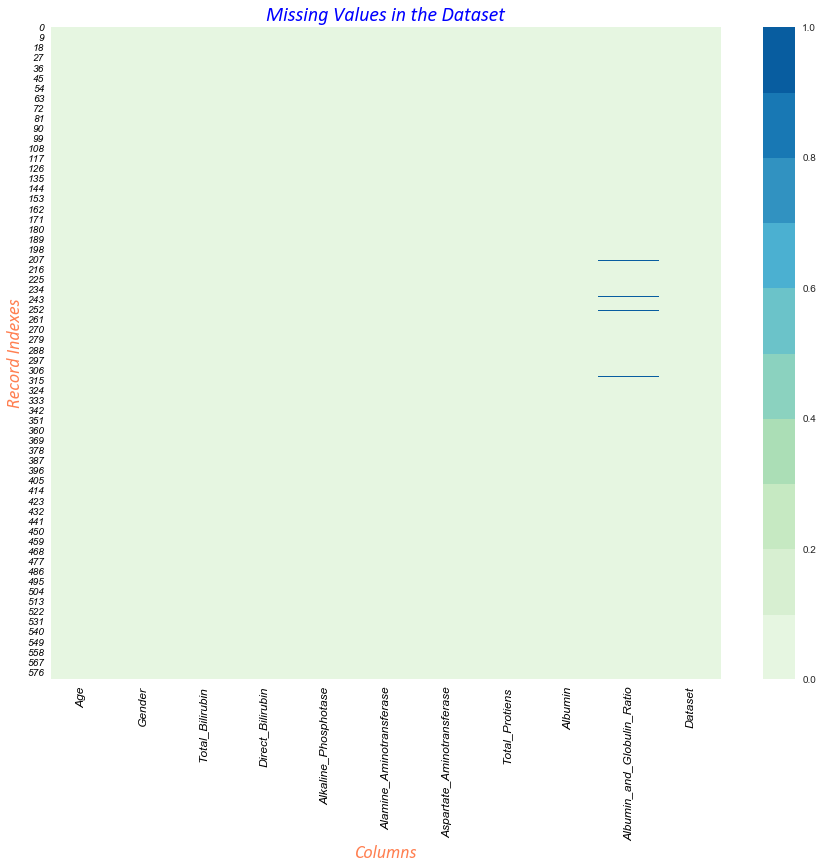

In [6]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,12))
    sns.heatmap(data=pd.DataFrame(patients_df.isnull()),cmap=ListedColormap(sns.color_palette('GnBu',10)))
    plt.xlabel('Columns',fontdict=label_font_dict)
    plt.ylabel('Record Indexes',fontdict=label_font_dict)
    plt.title('Missing Values in the Dataset',fontdict=title_font_dict)
    plt.xticks(color='black',size=12,style='oblique')
    plt.yticks(color='black',size=10,style='oblique')
plt.show()

##### **This shows us that there are 4 missing records in the dataset in column "Albumin_and_Globulin_Ratio".**

#### **``PLOT - 1``**
##### **``"Age and Gender Wise Patients Count"``**

In [7]:
patients_as_per_age_gender = pd.DataFrame(patients_df.groupby(by=['Age','Gender']).count()['Total_Bilirubin']).reset_index()
patients_as_per_age_gender.columns = ['Age','Gender','Record_Count']
patients_as_per_age_gender.head()

Age  Gender  Record_Count
0    4    Male             2
1    6    Male             1
2    7  Female             1
3    7    Male             1
4    8  Female             1

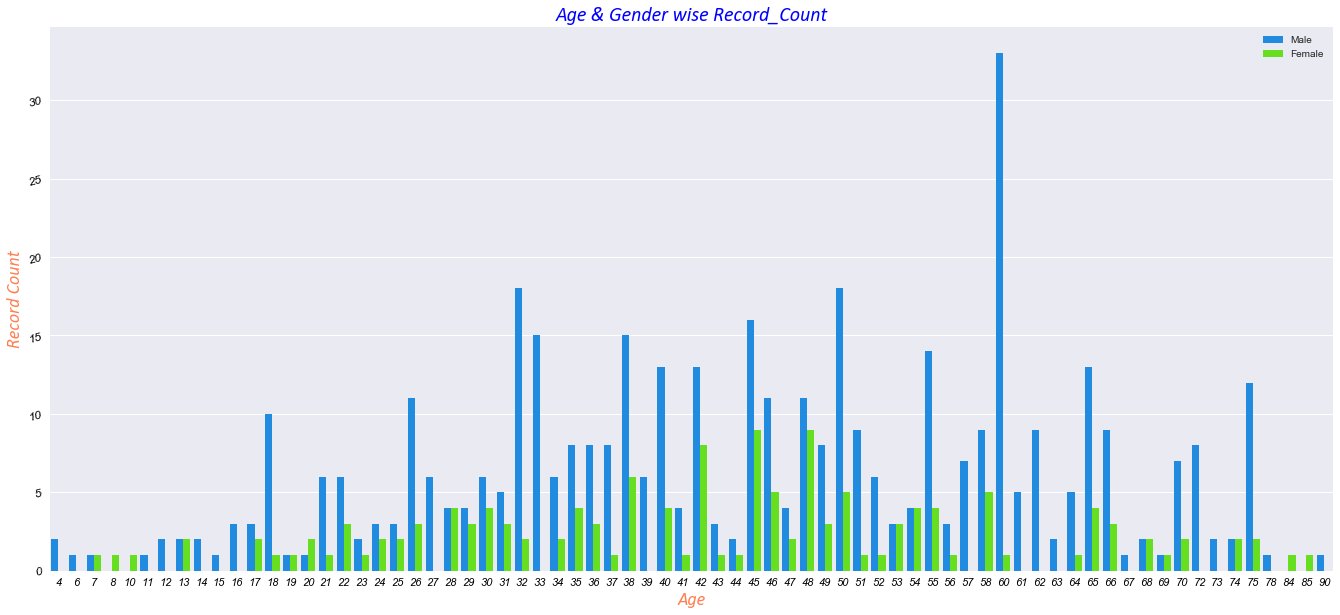

In [8]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(23,10))
    sns.barplot(x='Age',y='Record_Count',hue='Gender',data=patients_as_per_age_gender,palette=sns.color_palette('gist_rainbow_r',2))
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Record Count',fontdict=label_font_dict)
    plt.title('Age & Gender wise Record_Count',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=15,color='black',size=12,style='oblique')
    plt.legend(loc='upper right')

##### **This clearly shows us the difference in the number of female and male patients across Ages.**

#### **``PLOT - 2``**
##### **``"Positive and Negative Patients Count"``**

In [9]:
patients_df['Dataset'].unique()

array([1, 2], dtype=int64)

In [10]:
pos_neg_count = patients_df['Dataset'].value_counts().reset_index()
pos_neg_count.columns = ['Class','Patients_Count']
pos_neg_count

Class  Patients_Count
0      1             416
1      2             167

In [11]:
patients_df['Label'] = patients_df['Dataset'].apply(lambda val: val if val == 1 else 0)
patients_df.drop(['Dataset'],axis=1,inplace=True)
pos_neg_count = patients_df['Label'].value_counts().reset_index()
pos_neg_count.columns = ['Class','Patients_Count']
pos_neg_count

Class  Patients_Count
0      1             416
1      0             167

In [12]:
patients_df['Label'].unique()

array([1, 0], dtype=int64)

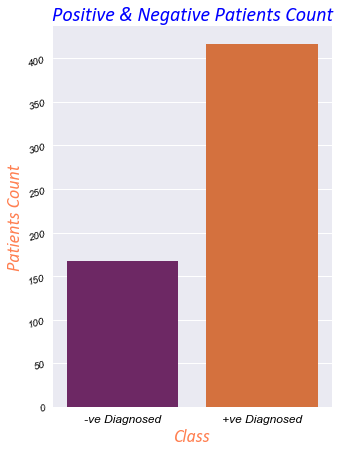

In [13]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(5,7))
    sns.barplot(x='Class',y='Patients_Count',data=pos_neg_count,palette='inferno')
    plt.xlabel('Class',fontdict=label_font_dict)
    plt.ylabel('Patients Count',fontdict=label_font_dict)
    plt.title('Positive & Negative Patients Count',fontdict=title_font_dict)
    plt.xticks(ticks=[0,1],labels=['-ve Diagnosed','+ve Diagnosed'],color='black',size=12,style='oblique')
    plt.yticks(rotation=15,color='black',size=10,style='oblique')
plt.show()

##### **This shows us that there is a class imbalance in this dataset. And, -ve patients are less than the 50% of the +ve ones.** 

#### **``PLOT - 3``**
##### **``"Positive and Negative Patients Count for both GENDER"``**

In [14]:
pos_neg_patients_as_per_gender = patients_df.groupby(['Gender','Label']).count()['Age'].reset_index()
pos_neg_patients_as_per_gender.columns = ['Gender','Label','Patients_Count']
pos_neg_patients_as_per_gender

Gender  Label  Patients_Count
0  Female      0              50
1  Female      1              92
2    Male      0             117
3    Male      1             324

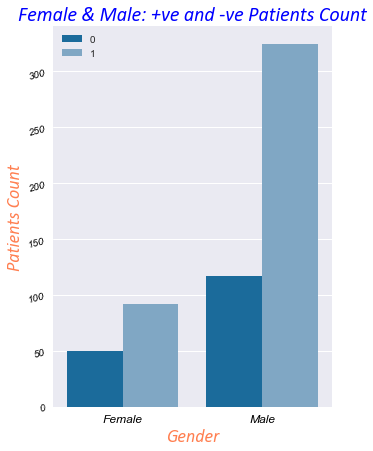

In [15]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(5,7))
    sns.barplot(x='Gender',y='Patients_Count',hue='Label',data=pos_neg_patients_as_per_gender,palette=sns.color_palette('PuBu_r',3))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Patients Count',fontdict=label_font_dict)
    plt.title('Female & Male: +ve and -ve Patients Count',fontdict=title_font_dict)
    plt.xticks(ticks=[0,1],labels=['Female','Male'],color='black',size=12,style='oblique')
    plt.yticks(rotation=15,color='black',size=10,style='oblique')
    plt.legend()
plt.show()

##### **This shows us that for Males there is a significant difference among +ve and -ve patients.**

#### **``PLOT - 4``**
##### **``"Positive and Negative Patients Count as per AGE and GENDER"``**

In [16]:
patients_df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Label  
0      3.3                        0.90      1  
1      3.2                        0.74      1  
2      3.3                        0.89      1  
3      3.4                        1.00      1  
4      2.4                        0.40      1

In [17]:
pos_neg_patients_as_per_age_gender = patients_df.groupby(['Age','Gender','Label']).count()['Total_Bilirubin'].reset_index()
pos_neg_patients_as_per_age_gender.columns = ['Age','Gender','Label','Patients_Count']
pos_neg_patients_as_per_age_gender.head()

Age  Gender  Label  Patients_Count
0    4    Male      0               2
1    6    Male      0               1
2    7  Female      1               1
3    7    Male      0               1
4    8  Female      1               1

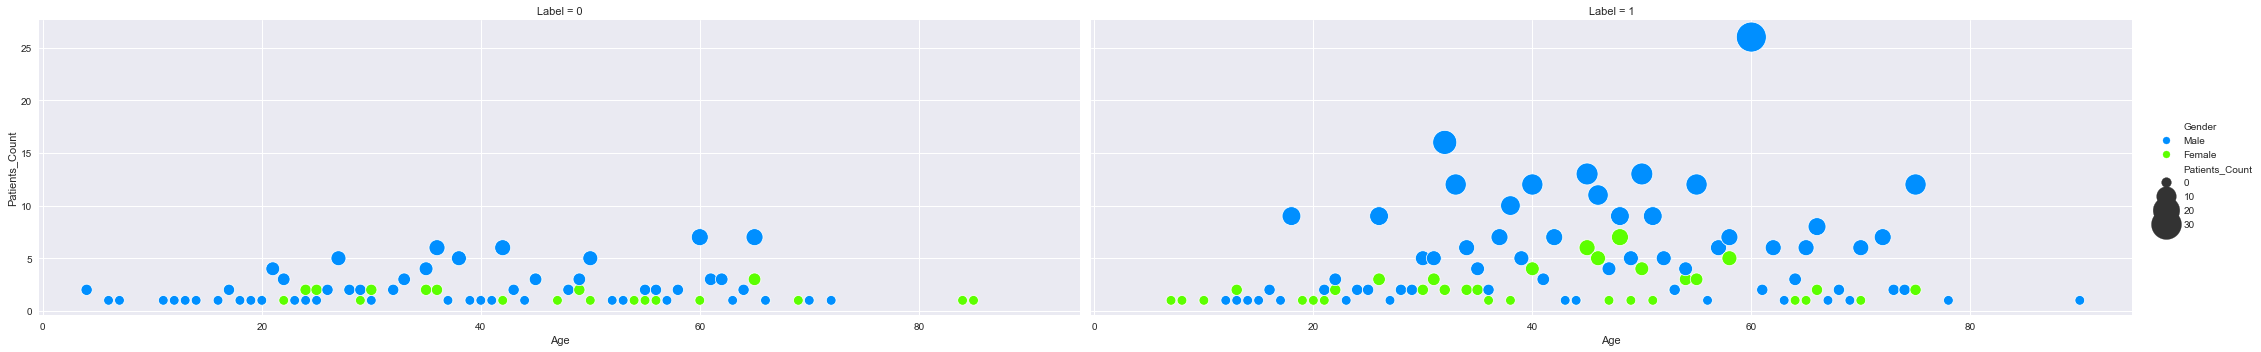

In [18]:
with plt.style.context('seaborn'):
    sns.relplot(x='Age',y='Patients_Count',hue='Gender',col='Label',data=pos_neg_patients_as_per_age_gender,size='Patients_Count',sizes=(95,900),
                palette=sns.color_palette('gist_rainbow_r',2),height=5,aspect=3)
plt.show()

##### **This shows the bifurcation of +ve and -ve patients across Age for both the Genders.**
##### **Few points to joot down here:**
- ###### **Among females the major spikes are only present in the age group of 40-50 years**
- ###### **One question that this dataset loudly raise, is that, does liver disease is not prevalent among Indian females?**
    - ###### **To gain understanding around that we really need to study the alcohol/smoking habits of females or their lifestyle in rural/urban/sub urban regions of India.**
    - ###### **Below are some links that can be checked out:**

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3025160/

https://www.thenewsminute.com/article/andhra-pradesh-tops-smoking-and-alcohol-consumption-kerala-comes-second-44996

https://www.shethepeople.tv/news/indian-women-drinking-more/#:~:text=Key%20Points%3A-,Alcohol%20consumption%20in%20India%20increased%20by%2038%20percent%20between%202010,report%20by%20AIIMS%20as%20saying.

#### **``PLOT - 5``**
##### **``"Does higher value of Total Bilirubin leads to Liver Disease?"``**

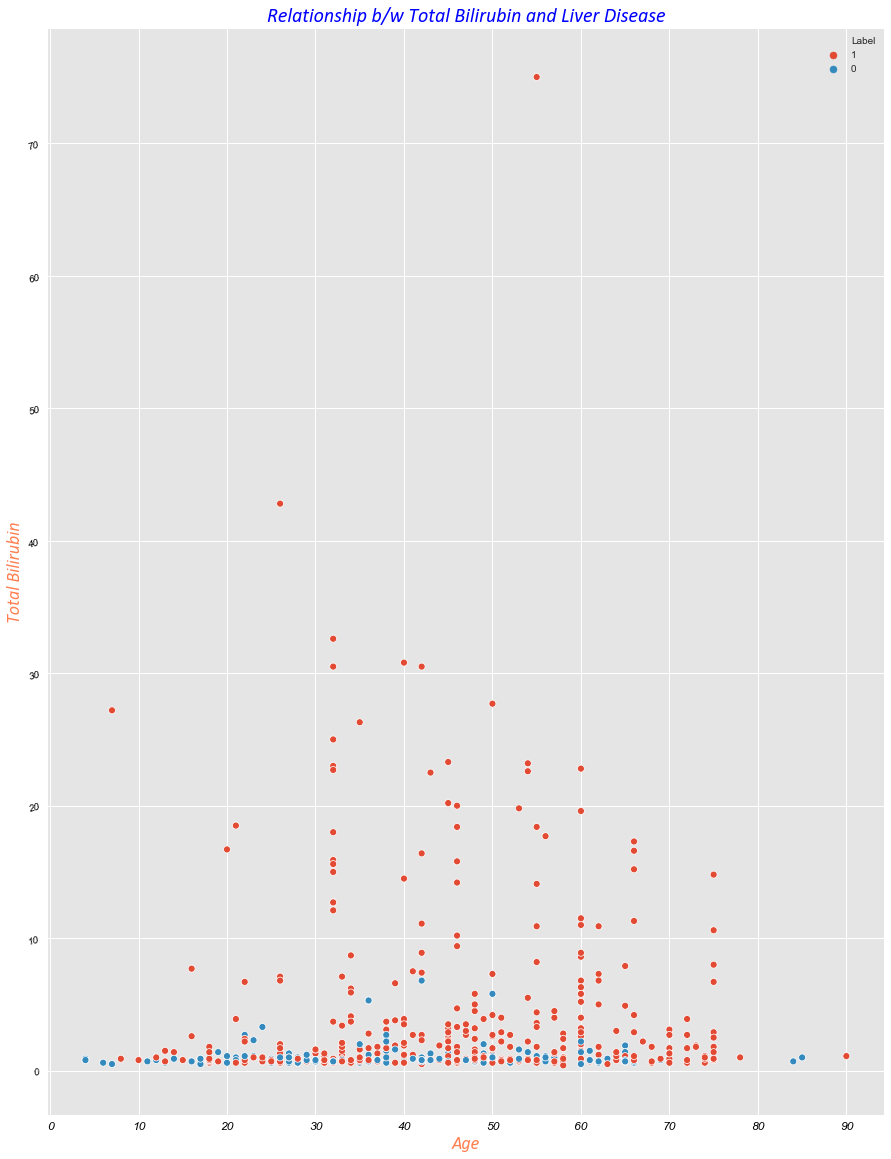

In [19]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(15,20))
    sns.scatterplot(x='Age',y='Total_Bilirubin',hue='Label',data=patients_df,hue_order=[1,0])
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Total Bilirubin',fontdict=label_font_dict)
    plt.title('Relationship b/w Total Bilirubin and Liver Disease',fontdict=title_font_dict)
    plt.xticks(ticks=[0,10,20,30,40,50,60,70,80,90],color='black',size=12,style='oblique')
    plt.yticks(rotation=15,color='black',size=10,style='oblique')
plt.show()

##### **This is clearly evident that higher value of Total Bilirubin does leads to Liver disease. However, there are positive cases at the lower value as well.** 
##### **Same is displayed in below chart ::**

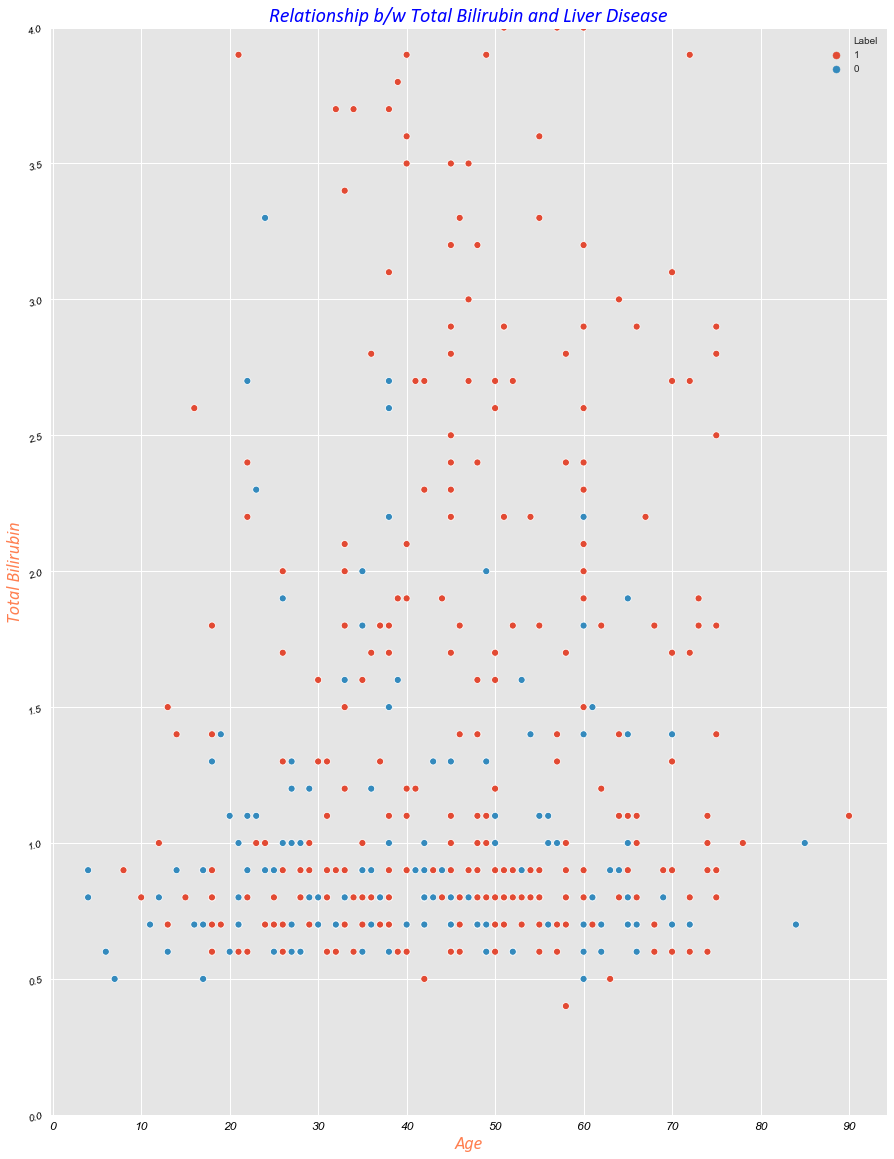

In [20]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(15,20))
    fig = sns.scatterplot(x='Age',y='Total_Bilirubin',hue='Label',data=patients_df,hue_order=[1,0])
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Total Bilirubin',fontdict=label_font_dict)
    plt.title('Relationship b/w Total Bilirubin and Liver Disease',fontdict=title_font_dict)
    plt.xticks(ticks=[0,10,20,30,40,50,60,70,80,90],color='black',size=12,style='oblique')
    plt.yticks(rotation=15,color='black',size=10,style='oblique')
    plt.ylim(bottom=0,top=4)
plt.show()

#### **``PLOT - 6``**
##### **``"Above plot raises a question : Does liver problems are more prominent at a higher age?"``**
###### **From first look of above Scatter Plot it doesn't seems like that. Still, let's plot a line graph..**

In [21]:
pos_neg_patients_as_per_age = patients_df.groupby(['Age','Label']).count()['Gender'].reset_index()
pos_neg_patients_as_per_age.columns = ['Age','Label','Patients_Count']
pos_neg_patients_as_per_age.head()

Age  Label  Patients_Count
0    4      0               2
1    6      0               1
2    7      0               1
3    7      1               1
4    8      1               1

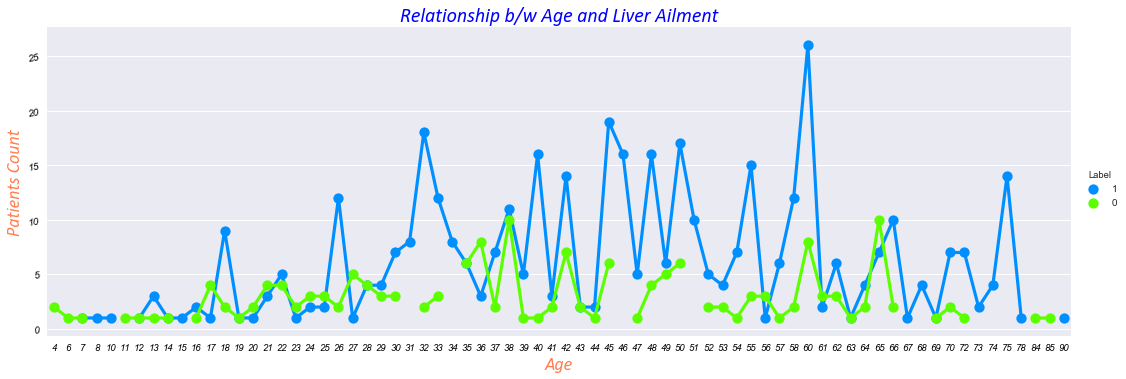

In [22]:
with plt.style.context('seaborn'):
    sns.catplot(x='Age',y='Patients_Count',hue='Label',data=pos_neg_patients_as_per_age,kind='point',
                height=5,aspect=3,hue_order=[1,0],palette=sns.color_palette('gist_rainbow_r',2))
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Patients Count',fontdict=label_font_dict)
    plt.title('Relationship b/w Age and Liver Ailment',fontdict=title_font_dict)
    plt.xticks(color='black',size=9.5,style='oblique')
    plt.yticks(rotation=10,color='black',size=10,style='oblique')
plt.show()

##### **So, the initial guess proves out to be correct as we can see the spikes across every age.** 
##### **However, there are few things which needs to be examined:**
- ###### **Some good number of patients below 35 years of age**
- ###### **Very less number of non-diseased people exist after 66 years of age**
    - ###### **And, we also witnessed a significant jump in the number of cases at 75 years of age**

#### **``PLOT - 7``**
##### **``"Does Total Bilirubin and Direct Bilirubin together leads to liver problems?"``**
###### **Going by the medical words this should be proved correct...**

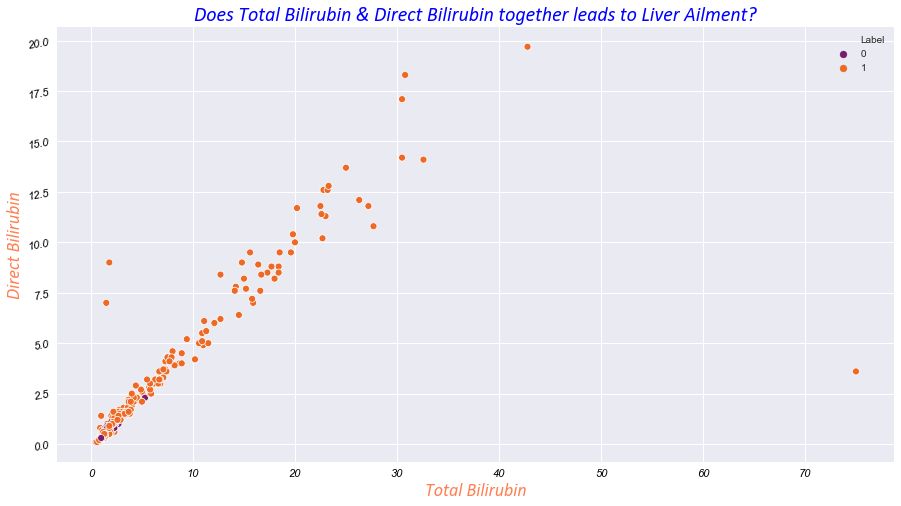

In [23]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,8))
    sns.scatterplot(x='Total_Bilirubin',y='Direct_Bilirubin',hue='Label',
                    hue_order=[0,1],data=patients_df,palette=sns.color_palette('inferno',2))
    plt.xlabel('Total Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Does Total Bilirubin & Direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

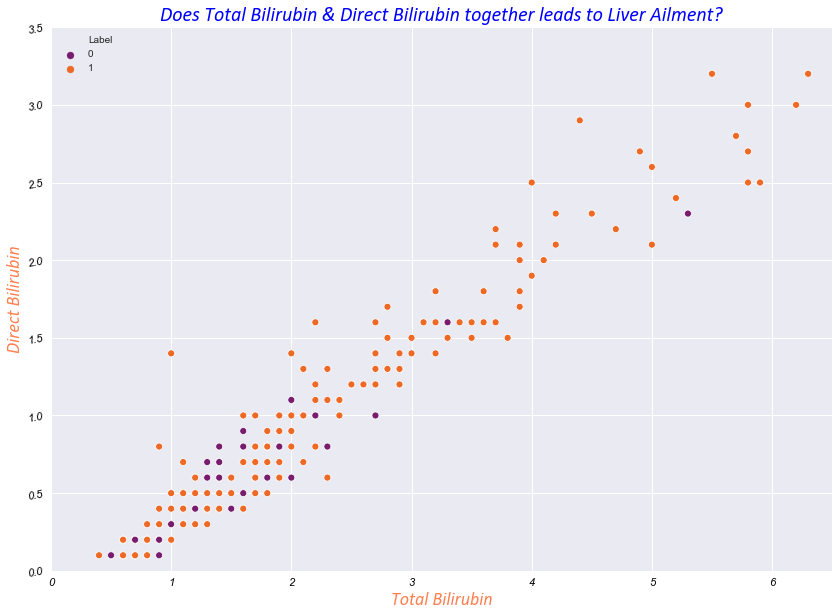

In [24]:
## Close-eye with shorter axes
with plt.style.context('seaborn'):
    plt.figure(figsize=(14,10))
    sns.scatterplot(x='Total_Bilirubin',y='Direct_Bilirubin',hue='Label',
                    hue_order=[0,1],data=patients_df,palette=sns.color_palette('inferno',2))
    plt.ylim(0,3.5)
    plt.xlim(0,6.5)
    plt.xlabel('Total Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Does Total Bilirubin & Direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Here, we hit the bingo!! Statistically speaking it looks like Total Bilirubin & Direct Bilirubin both are correlated with each other and shows good sign of relationship.**

In [25]:
pearson_coeff_r = pd.DataFrame(np.corrcoef(patients_df['Total_Bilirubin'],patients_df['Direct_Bilirubin']))
pearson_coeff_r

0         1
0  1.000000  0.874618
1  0.874618  1.000000

In [26]:
pearson_coeff_r_sqr = pearson_coeff_r.applymap(lambda val: np.square(val))
pearson_coeff_r_sqr

0         1
0  1.000000  0.764957
1  0.764957  1.000000

##### **This mean approx 76% of the variations in these two variables are explainable because among them. And, they are positively correlated to each other.**

#### **``PLOT - 8``**
##### **``"Let's bring Unconjugated or Indirect Bilirubin in our dataset and examine its relationship with Total or Direct Bilirubin"``**
###### **Going by the medical words we would definitely find something good too here..**

In [27]:
patients_df['Unconjugated_bilirubin'] = patients_df['Total_Bilirubin'] - patients_df['Direct_Bilirubin']
patients_df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Label  Unconjugated_bilirubin  
0      3.3                        0.90      1                     0.6  
1      3.2                        0.74      1                     5.4  
2      3.3                        0.89      1                     3.2  
3      3.4                        1.00      1                     0.6  
4      2.4                        0.40      1                     1.9

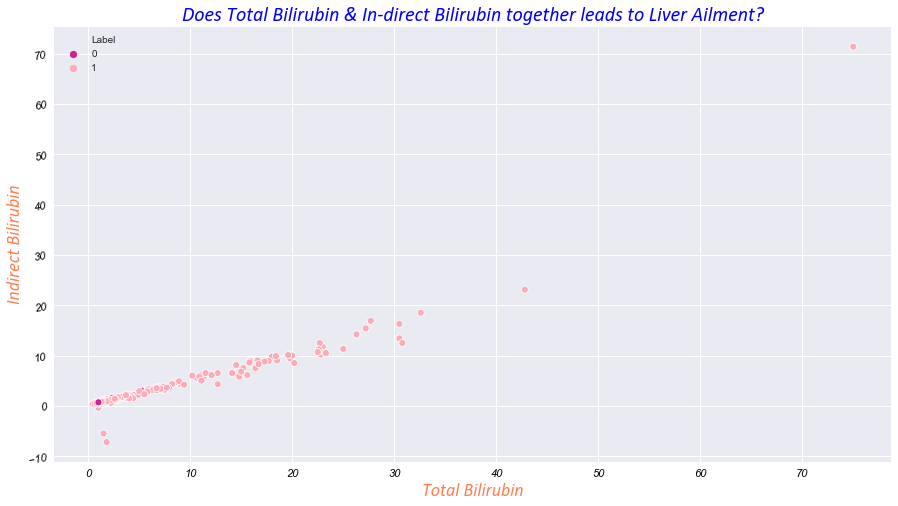

In [28]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,8))
    sns.scatterplot(x='Total_Bilirubin',y='Unconjugated_bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('RdPu_r',2))
    plt.xlabel('Total Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Indirect Bilirubin',fontdict=label_font_dict)
    plt.title('Does Total Bilirubin & In-direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **There is definitely a significant role of Total and Unconjugated Bilirubin towards Liver Disease.**
##### **Let's observe it closely:**

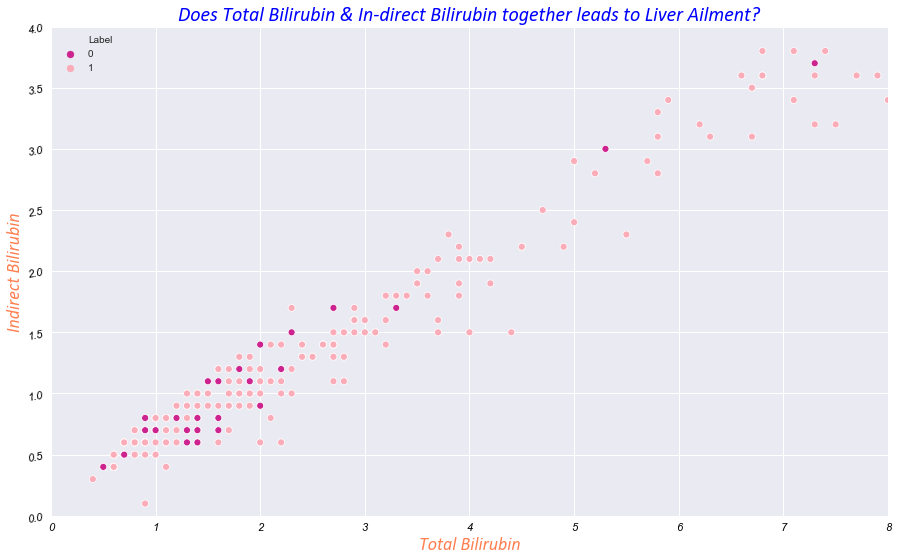

In [29]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,9))
    sns.scatterplot(x='Total_Bilirubin',y='Unconjugated_bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('RdPu_r',2))
    plt.xlim(0,8)
    plt.ylim(0,4)
    plt.xlabel('Total Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Indirect Bilirubin',fontdict=label_font_dict)
    plt.title('Does Total Bilirubin & In-direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **This definitely shows us that if someone has higher level of both Indirect and Total Bilirubin then there are severe chances of liver ailment.**
##### **Let's check their correlation value:**

In [30]:
np.corrcoef(patients_df['Total_Bilirubin'],patients_df['Unconjugated_bilirubin'])

array([[1.        , 0.94004973],
       [0.94004973, 1.        ]])

##### **As the scatter plot depicted both Total and Unconjugated Bilirubin are highly correlated with each other.**

In [31]:
pd.DataFrame(np.corrcoef(patients_df['Total_Bilirubin'],patients_df['Unconjugated_bilirubin'])).applymap(lambda val: np.square(val))

0         1
0  1.000000  0.883694
1  0.883694  1.000000

##### **This mean approx 88% of the variations in these two variables are explainable among them. And, they are positively correlated to each other.**

#### **``PLOT - 9``**
##### **``"Let's visualize the distribution of Total, Direct and Indirect Bilirubin in males and females"``**

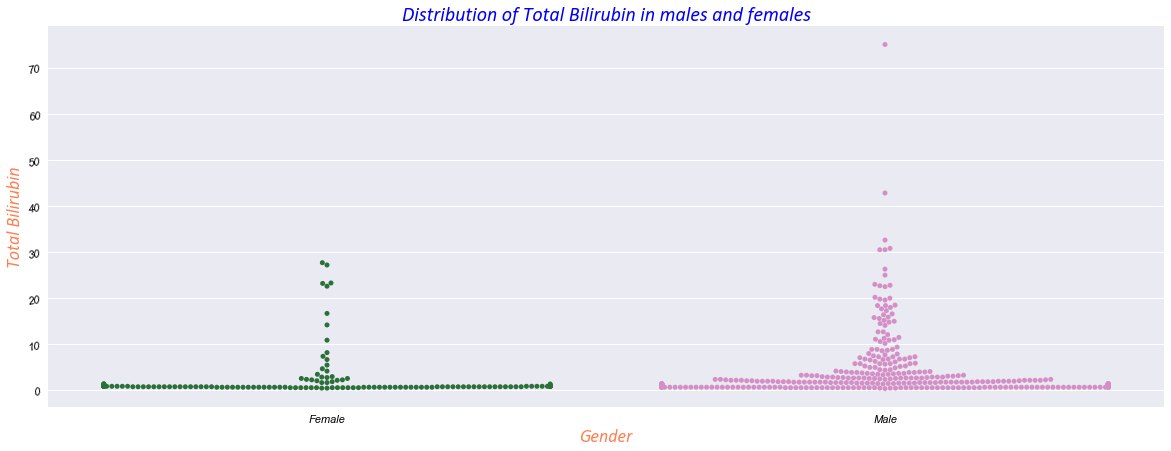

In [32]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Total_Bilirubin',data=patients_df,palette=sns.color_palette('cubehelix',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Total Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of Total Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Close-look**

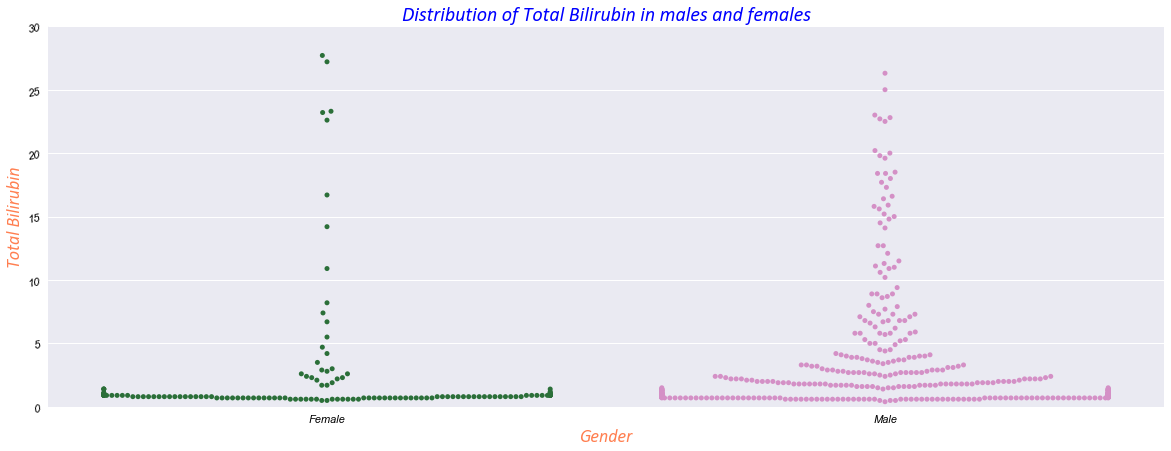

In [33]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Total_Bilirubin',data=patients_df,palette=sns.color_palette('cubehelix',2))
    plt.ylim(0,30)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Total Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of Total Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

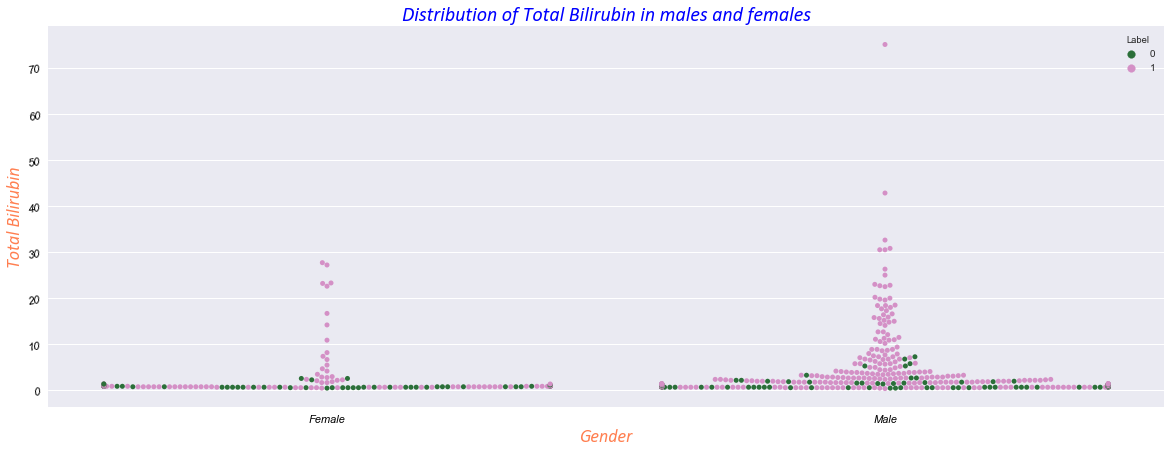

In [34]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Total_Bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('cubehelix',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Total Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of Total Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **``Direct Bilirubin``**

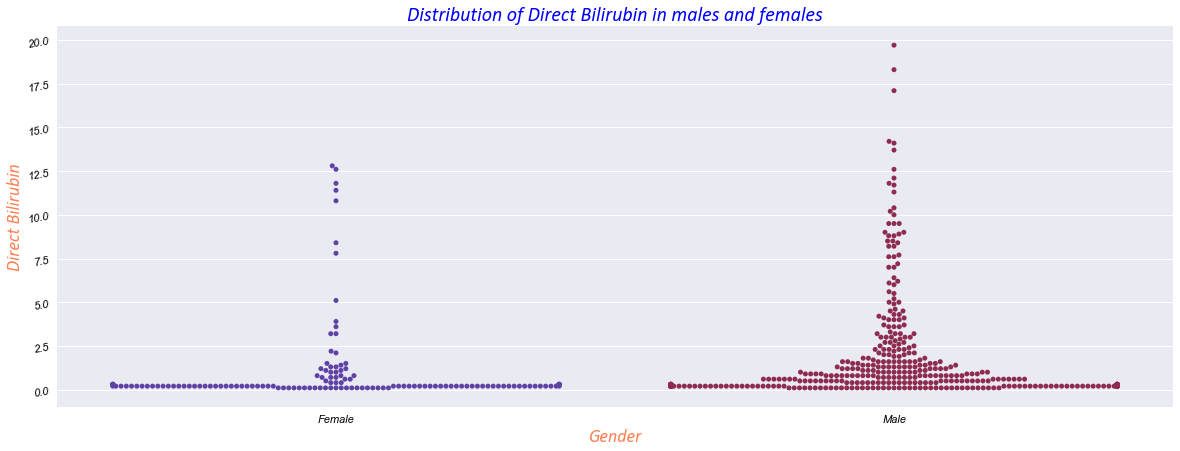

In [35]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Direct_Bilirubin',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of Direct Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

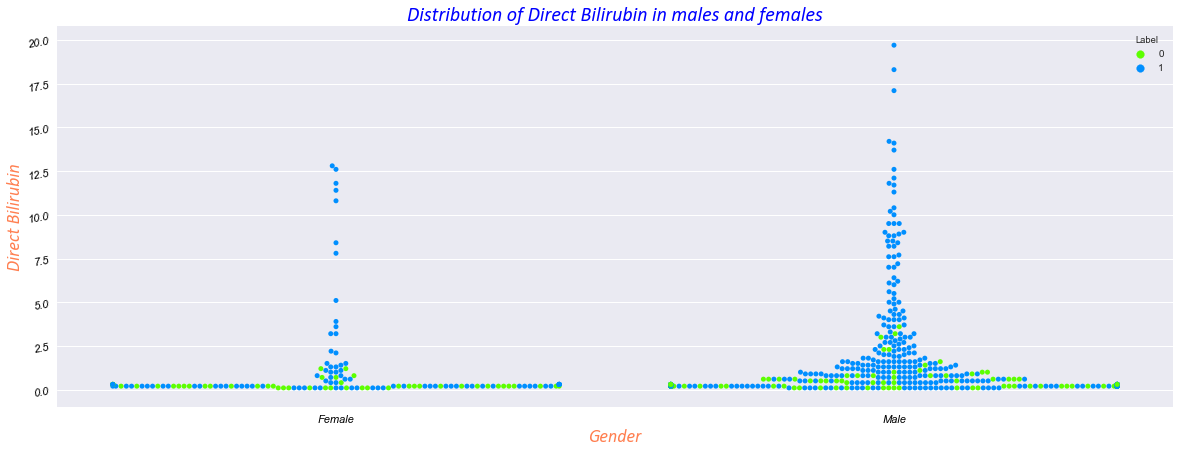

In [36]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Direct_Bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of Direct Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **``Unconjugated Bilirubin``**

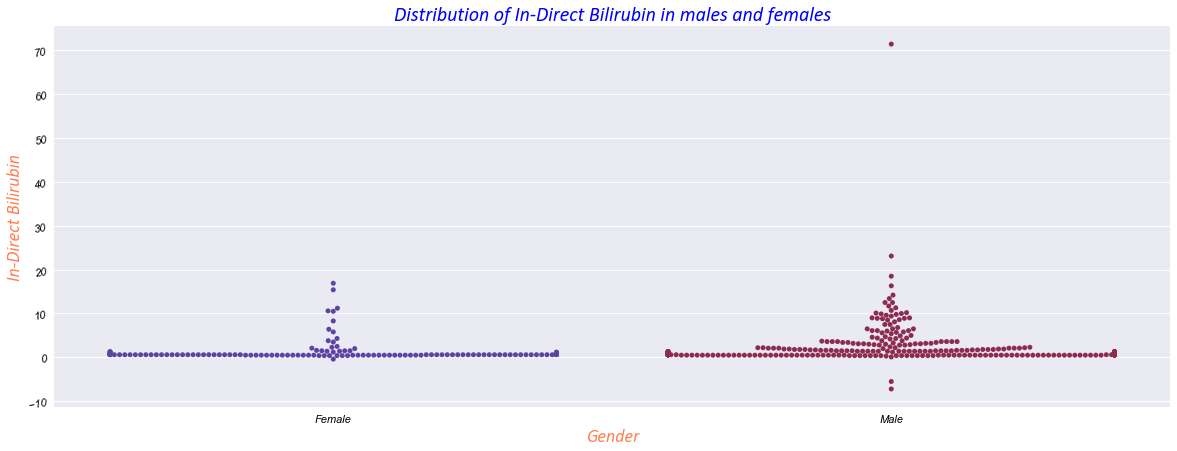

In [37]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Unconjugated_bilirubin',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('In-Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of In-Direct Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Close Look**

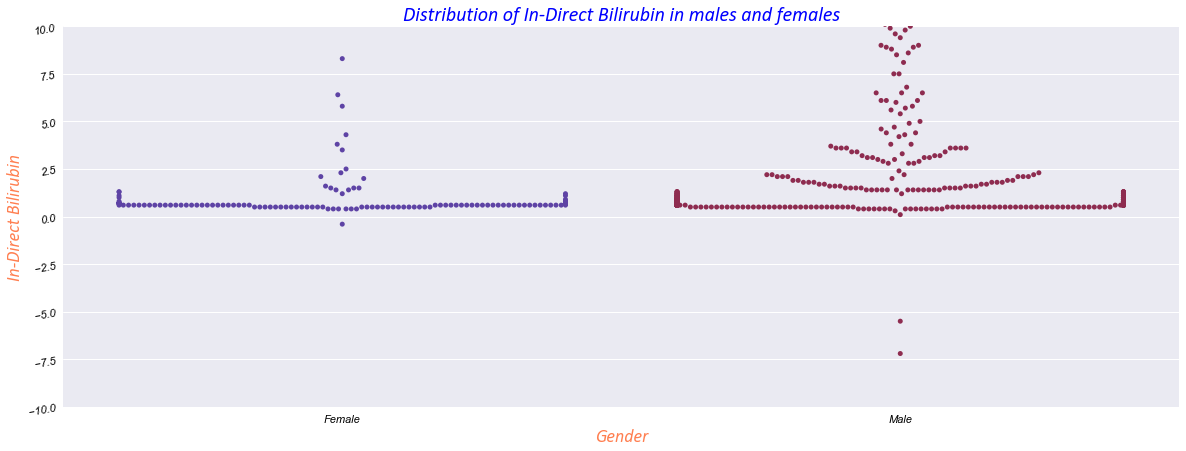

In [38]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Unconjugated_bilirubin',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.ylim(-10,10)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('In-Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of In-Direct Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

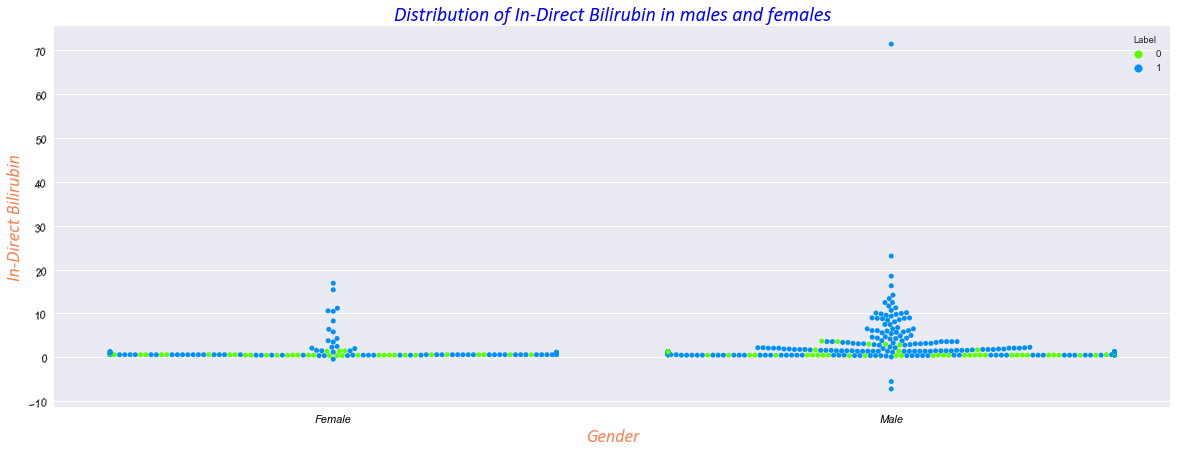

In [39]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,7))
    sns.swarmplot(x='Gender',y='Unconjugated_bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('In-Direct Bilirubin',fontdict=label_font_dict)
    plt.title('Distribution of In-Direct Bilirubin in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

#### **``PLOT - 10``**
##### **``"Let's examine the relationship of Direct and In-direct Bilirubin"``**

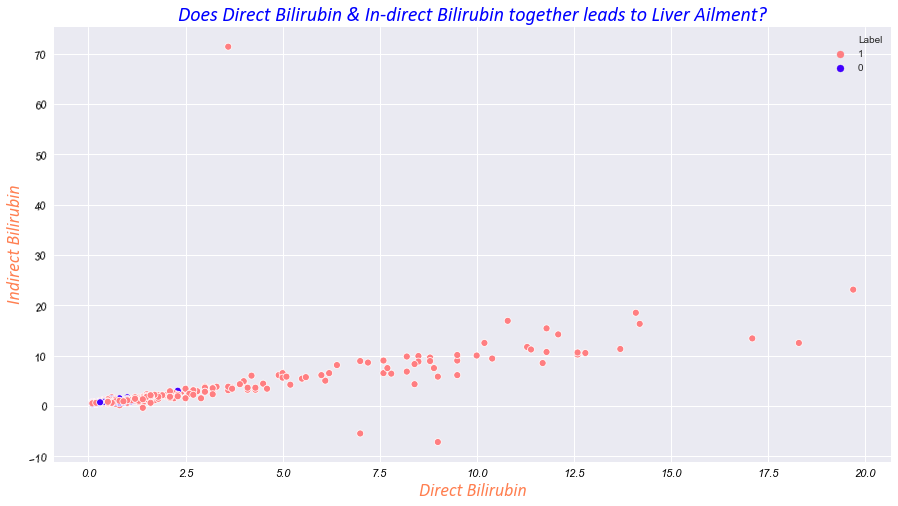

In [40]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,8))    
    sns.scatterplot(x='Direct_Bilirubin',y='Unconjugated_bilirubin',hue='Label',data=patients_df,
                    hue_order=[1,0],palette=sns.color_palette('gnuplot2_r',2))
    plt.xlabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Indirect Bilirubin',fontdict=label_font_dict)
    plt.title('Does Direct Bilirubin & In-direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **One point to note here is that data points are not tightly packed after a certian value of Direct Bilirubin which shows there might be a influence of other variable.**
##### **Let's observe it closely:**

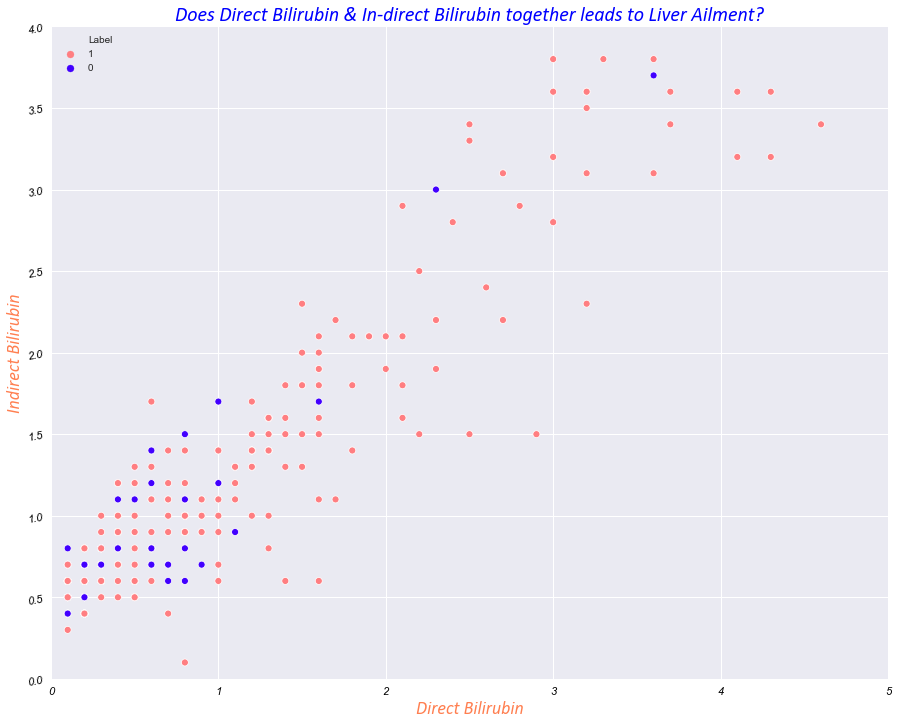

In [41]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,12))    
    sns.scatterplot(x='Direct_Bilirubin',y='Unconjugated_bilirubin',hue='Label',data=patients_df,
                    hue_order=[1,0],palette=sns.color_palette('gnuplot2_r',2))
    plt.xlim(0,5)
    plt.ylim(0,4)
    plt.xlabel('Direct Bilirubin',fontdict=label_font_dict)
    plt.ylabel('Indirect Bilirubin',fontdict=label_font_dict)
    plt.title('Does Direct Bilirubin & In-direct Bilirubin together leads to Liver Ailment?',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
    plt.legend(loc='upper left')
plt.show()

##### **Let's check their correlation value:**

In [42]:
np.corrcoef(patients_df['Direct_Bilirubin'],patients_df['Unconjugated_bilirubin'])

array([[1.        , 0.65684506],
       [0.65684506, 1.        ]])

In [43]:
pd.DataFrame(np.corrcoef(patients_df['Direct_Bilirubin'],patients_df['Unconjugated_bilirubin'])).applymap(lambda val: np.square(val))

0         1
0  1.000000  0.431445
1  0.431445  1.000000

##### **This mean approx 43% of the variations in these two variables are explainable among them. And, they are positively correlated to each other.**

#### **``PLOT - 11``**
##### **``"Let's see the trend In-direct Bilirubin across all ages"``**

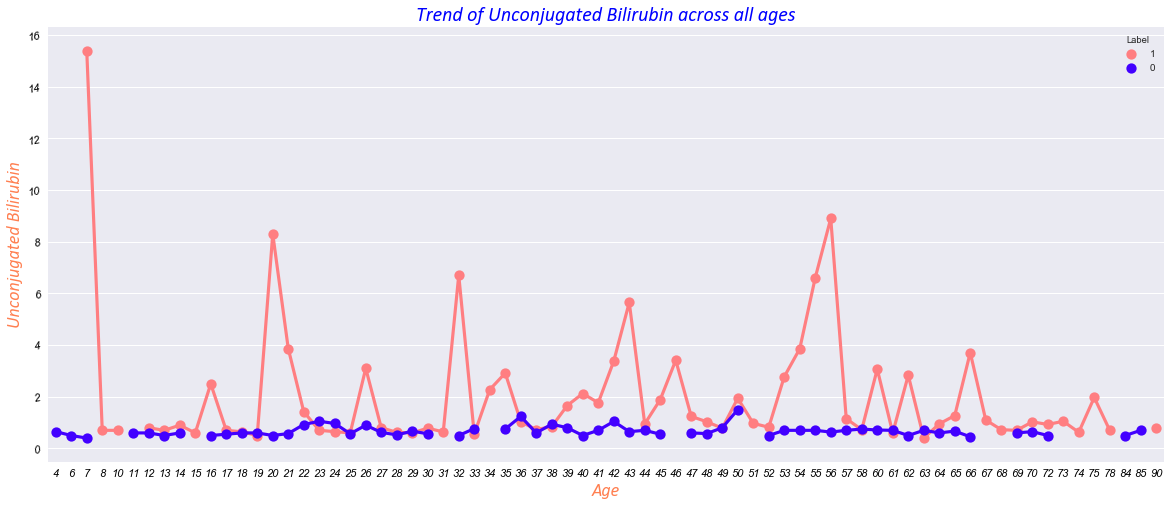

In [44]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,8))
    sns.pointplot(x='Age',y='Unconjugated_bilirubin',hue='Label',data=patients_df,palette=sns.color_palette('gnuplot2_r',2),hue_order=[1,0],ci=False)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Unconjugated Bilirubin',fontdict=label_font_dict)
    plt.title('Trend of Unconjugated Bilirubin across all ages',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Well, the higher level of Unconjugated Bilirubin dictates the existence of Liver ailment. However, the lower level of it doesn't really rule out the possibility of disease.** 

#### **``PLOT - 12``**
##### **``"Above Point-plot gives rise to a question is that, does the level of In-direct Bilirubin varies significantly across gender?"``**

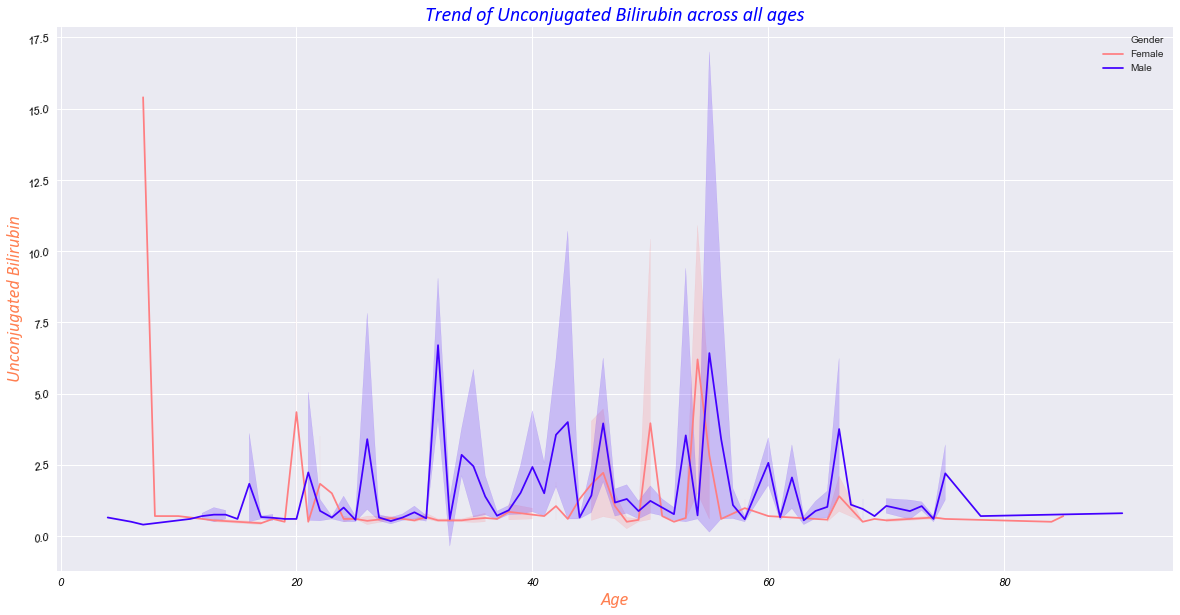

In [45]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(20,10))
    sns.lineplot(x='Age',y='Unconjugated_bilirubin',hue='Gender',data=patients_df,palette=sns.color_palette('gnuplot2_r',2),ci=95)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Unconjugated Bilirubin',fontdict=label_font_dict)
    plt.title('Trend of Unconjugated Bilirubin across all ages',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.legend(loc='upper right')
plt.show()

##### **This graph certainly caught my attention on below points:**
- ###### **The spike for females is higher than males at the age of 50 and both gender are at the same level of Unconjugated bilirubin at the age of 55** 
- ###### **The spike at the age of 20 in females is higher than males**
##### **``There can be multiple reasons for these spikes, So, before identifying their cause lets first check whether these spikes leads to liver disease.``** 

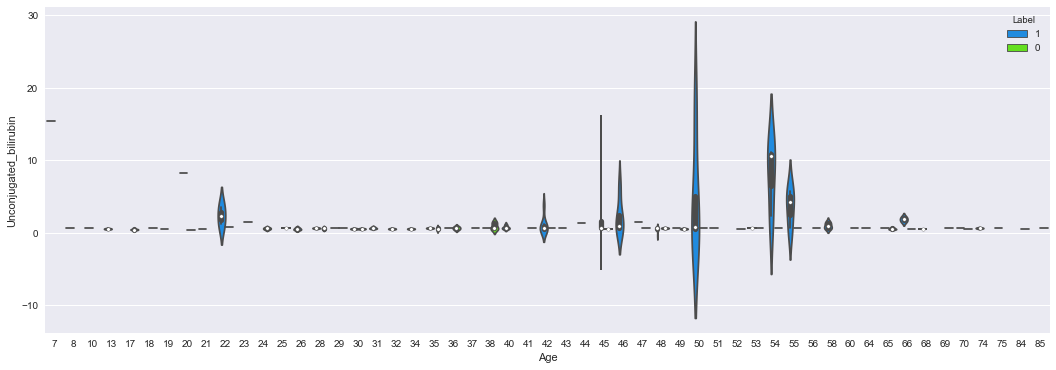

In [46]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,6))
    sns.violinplot(x='Age',y='Unconjugated_bilirubin',hue='Label',hue_order=[1,0],
                data=patients_df[patients_df['Gender'] == 'Female'],palette=sns.color_palette('gist_rainbow_r',2))
plt.show()

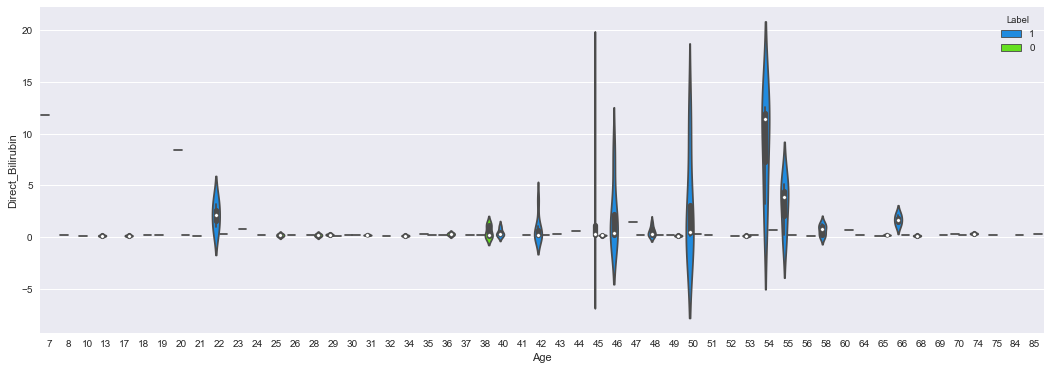

In [47]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,6))
    sns.violinplot(x='Age',y='Direct_Bilirubin',hue='Label',hue_order=[1,0],
                data=patients_df[patients_df['Gender'] == 'Female'],palette=sns.color_palette('gist_rainbow_r',2),ci=False)
plt.show()

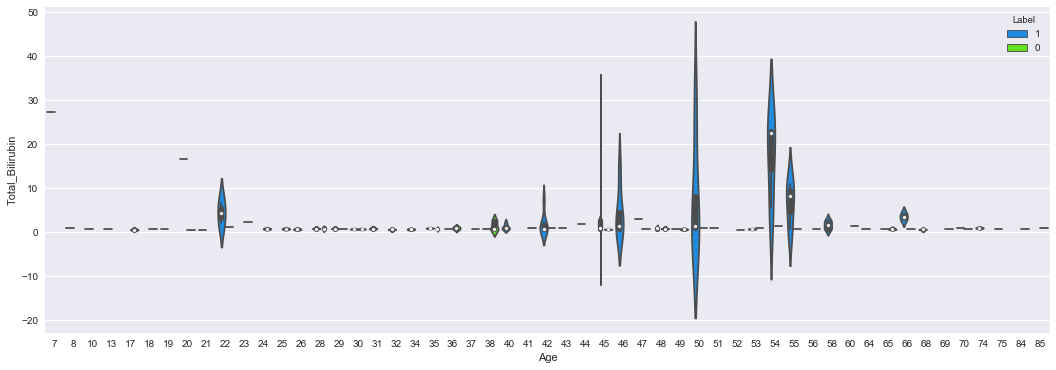

In [48]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,6))
    sns.violinplot(x='Age',y='Total_Bilirubin',hue='Label',hue_order=[1,0],
                data=patients_df[patients_df['Gender'] == 'Female'],palette=sns.color_palette('gist_rainbow_r',2),ci=False)
plt.show()

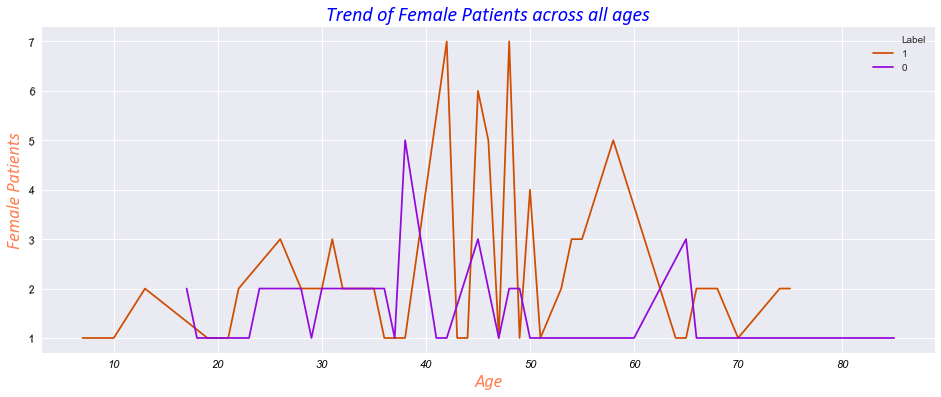

In [49]:
female_pos_neg = patients_df[patients_df['Gender'] == 'Female'].groupby(['Age','Label']).count()['Gender'].reset_index()
female_pos_neg.columns = ['Age','Label','Patients_Count']

with plt.style.context('seaborn'):
    plt.figure(figsize=(16,6))
    sns.lineplot(x='Age',y='Patients_Count',hue='Label',data=female_pos_neg,palette=sns.color_palette('gnuplot_r',2),hue_order=[1,0])
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Female Patients',fontdict=label_font_dict)
    plt.title('Trend of Female Patients across all ages',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Now, here the spikes which we discussed in previous plot showing the presence of multiple positively diagnosed cases. ``This definitely raises the eyebrow and can we say that postmenopausal(age >= 50) women are more prone to liver disease?``**
##### **``Check out below links and some papers do suggest that postmenopausal hormonal imbalance makes women vulnerable towards liver disease:``**

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4491951/

https://www.hindawi.com/journals/bmri/2015/131528/

https://www.rush.edu/health-wellness/discover-health/hormones-you-age#:~:text=For%20women%3A%20menopause,follicle%20stimulating%20hormone%20(FSH).

##### **``Check out below paper suggesting that postmenopausal the level of total and direct bilirubin increased significantly:``**
https://www.researchgate.net/publication/43084619_Altered_Liver_Function_and_the_Status_of_Calcium_in_Postmenopausal_Women_in_and_Around_Mangalore#:~:text=The%20level%20of%20total%20bilirubin,women's%20(p%3C0.0001).

##### **With respect to the spike at 20 years of age in females there can be multiple reasons for that, however, alcohol consumption and bad lifestyle can be the leading factors. Check out the below paper discussing the ``Problem alcohol drinking in rural women of Telangana region, Andhra Pradesh``.**
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3025160/

https://timesofindia.indiatimes.com/life-style/health-fitness/health-news/is-liver-disease-the-next-major-lifestyle-disease-of-india-after-diabetes-and-bp/articleshow/58122706.cms

https://thepapergown.zocdoc.com/why-are-more-young-women-getting-cirrhosis/#:~:text=For%20alcohol%2Drelated%20cirrhosis%20to,at%20the%20University%20of%20Michigan

#### **``PLOT - 13``**
##### **``"ALP trend in males and females across all ages"``**

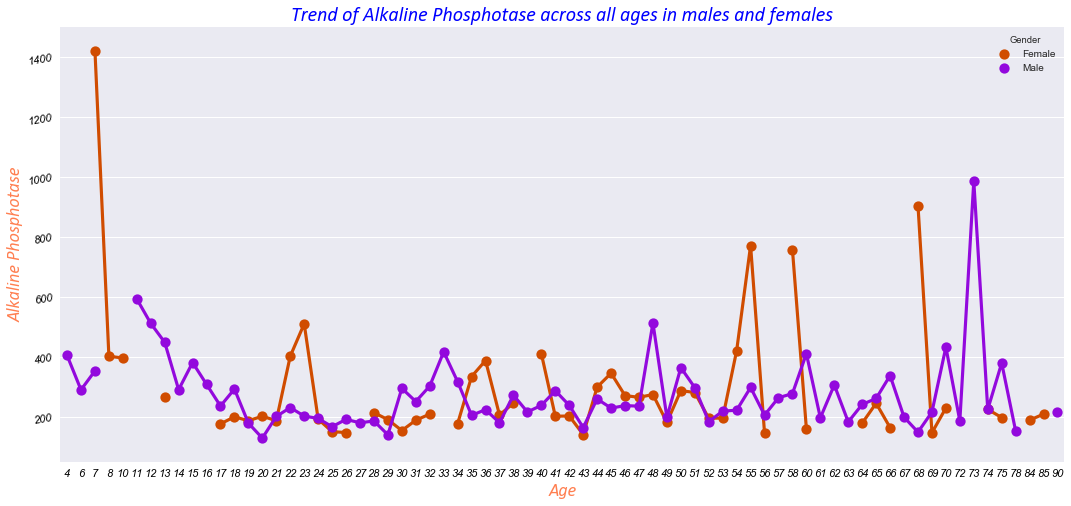

In [50]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,8))
    sns.pointplot(x='Age',y='Alkaline_Phosphotase',hue='Gender',data=patients_df,palette=sns.color_palette('gnuplot_r',2),ci=False)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Alkaline Phosphotase',fontdict=label_font_dict)
    plt.title('Trend of Alkaline Phosphotase across all ages in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **For females there is a moderate jump in the level of ASP after the age of 50. However, in males it tends to follow the consistent path with one paramount jump at the end.**

##### **Let's visualize the distirbution for +ve and -ve cases.**

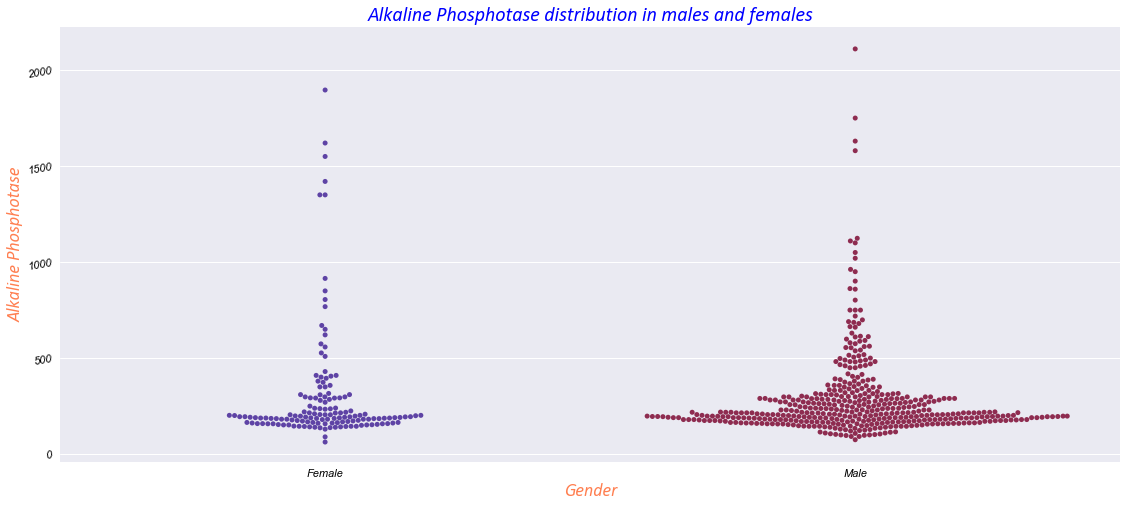

In [51]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Alkaline_Phosphotase',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alkaline Phosphotase',fontdict=label_font_dict)
    plt.title('Alkaline Phosphotase distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

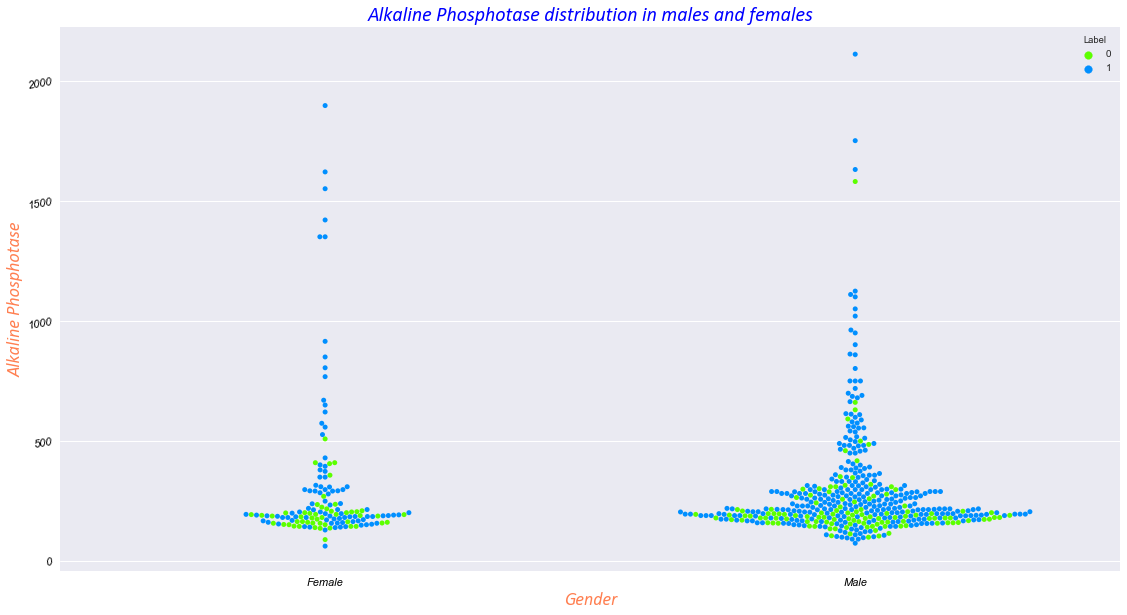

In [52]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,10))
    sns.swarmplot(x='Gender',y='Alkaline_Phosphotase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2),hue_order=[0,1])
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alkaline Phosphotase',fontdict=label_font_dict)
    plt.title('Alkaline Phosphotase distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Close Look**

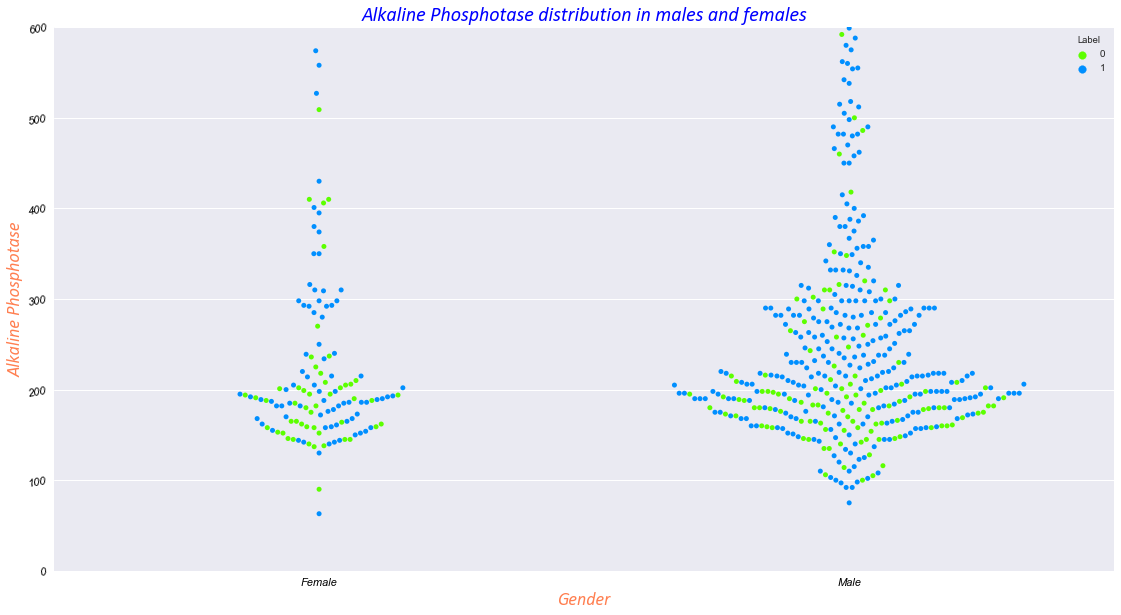

In [53]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,10))
    sns.swarmplot(x='Gender',y='Alkaline_Phosphotase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2),hue_order=[0,1])
    plt.ylim(0,600)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alkaline Phosphotase',fontdict=label_font_dict)
    plt.title('Alkaline Phosphotase distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

#### **``PLOT - 14``**
##### **``"ALT trend in males and females across all ages"``**

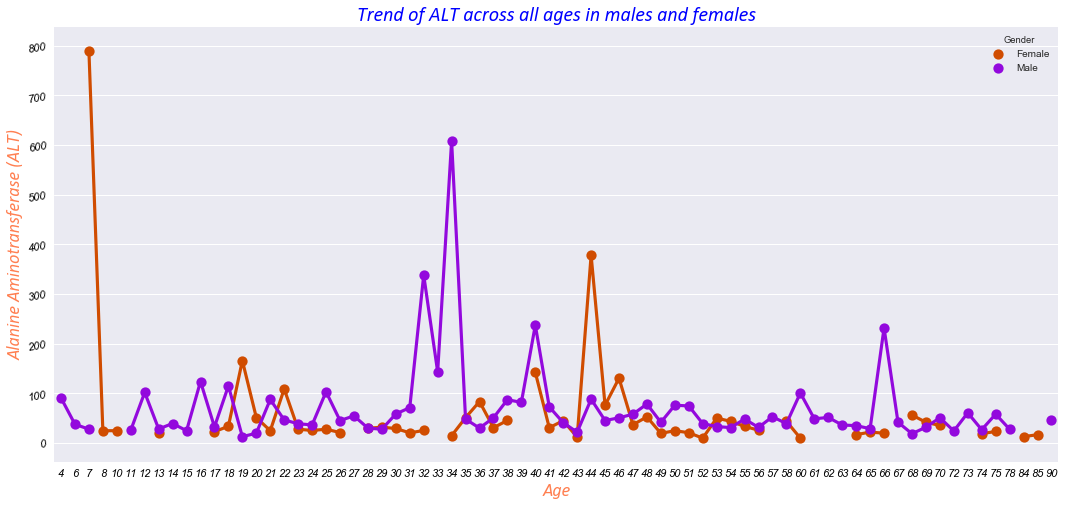

In [54]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,8))
    sns.pointplot(x='Age',y='Alamine_Aminotransferase',hue='Gender',data=patients_df,palette=sns.color_palette('gnuplot_r',2),ci=False)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Alanine Aminotransferase (ALT)',fontdict=label_font_dict)
    plt.title('Trend of ALT across all ages in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **For females the majority of the trend is flat with major spike at age of 44. Similar tend is visible in males with few peaks around the age of 35, 40 and 65.**

##### **Let's visualize the distirbution for +ve and -ve cases.**

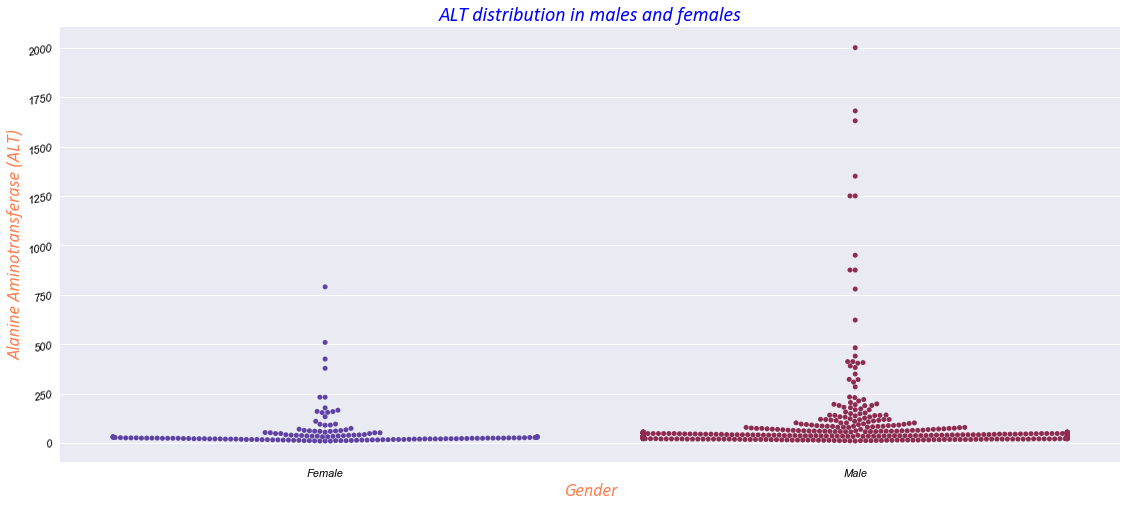

In [55]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Alamine_Aminotransferase',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alanine Aminotransferase (ALT)',fontdict=label_font_dict)
    plt.title('ALT distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

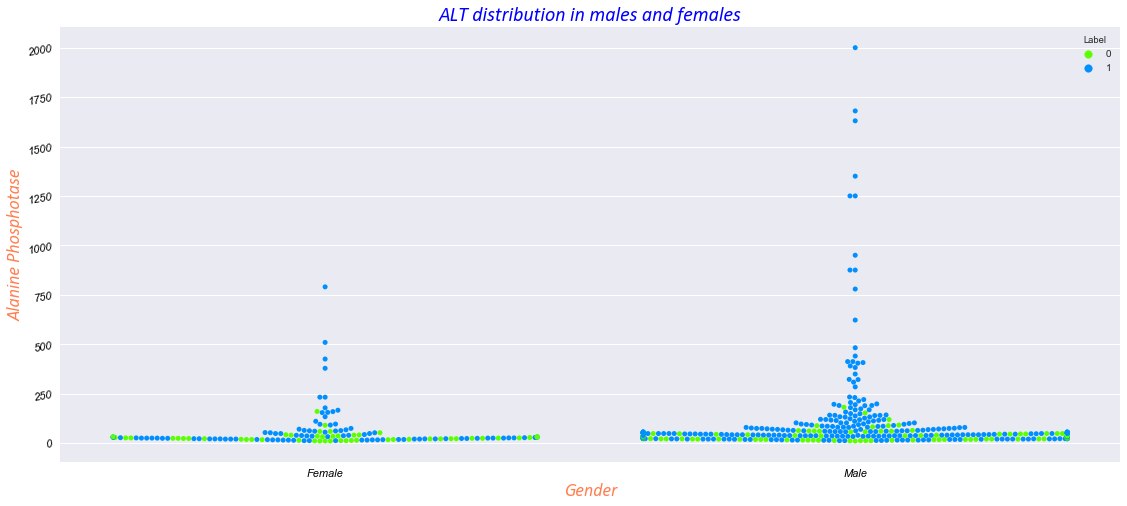

In [56]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Alamine_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alanine Phosphotase',fontdict=label_font_dict)
    plt.title('ALT distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

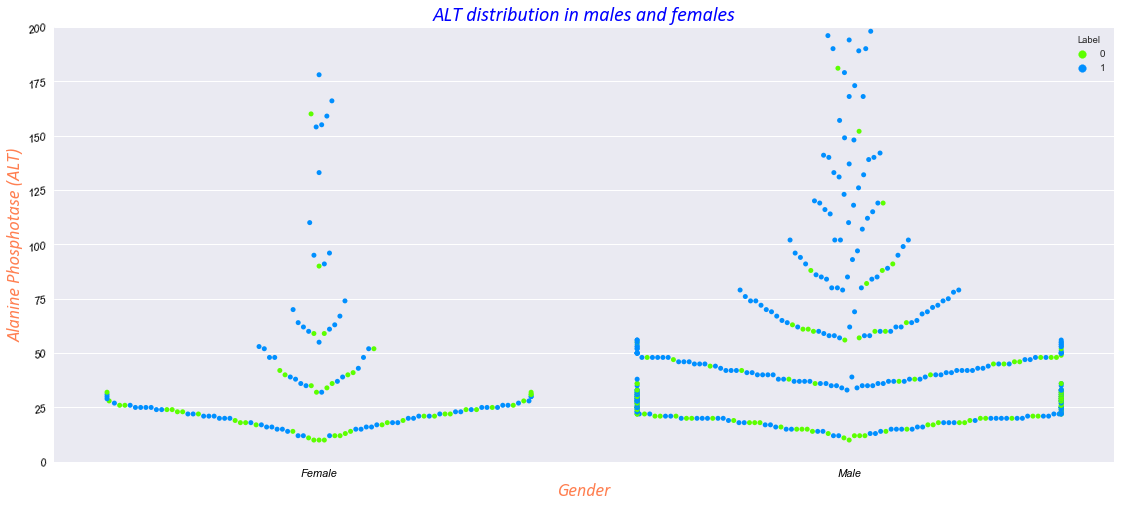

In [57]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Alamine_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.ylim(0,200)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Alanine Phosphotase (ALT)',fontdict=label_font_dict)
    plt.title('ALT distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

#### **``PLOT - 15``**
##### **``"AST trend in males and females across all ages"``**

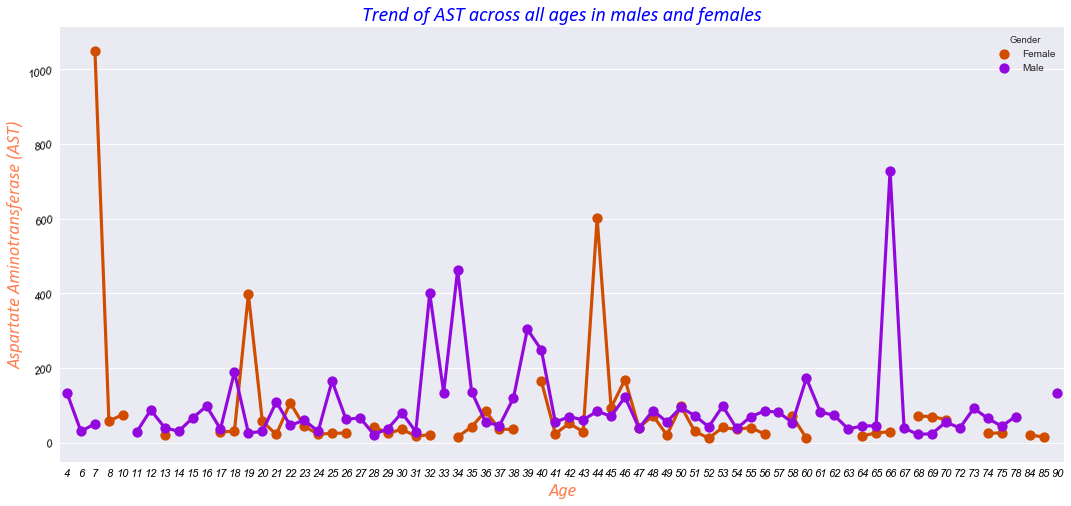

In [58]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,8))
    sns.pointplot(x='Age',y='Aspartate_Aminotransferase',hue='Gender',data=patients_df,palette=sns.color_palette('gnuplot_r',2),ci=False)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Aspartate Aminotransferase (AST)',fontdict=label_font_dict)
    plt.title('Trend of AST across all ages in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **The first look made me feel like I have plotted the chart for ALT, but it is of AST. Looks similar to ALT and needs to be examined closely.**

##### **Let's visualize the distirbution for +ve and -ve cases.**

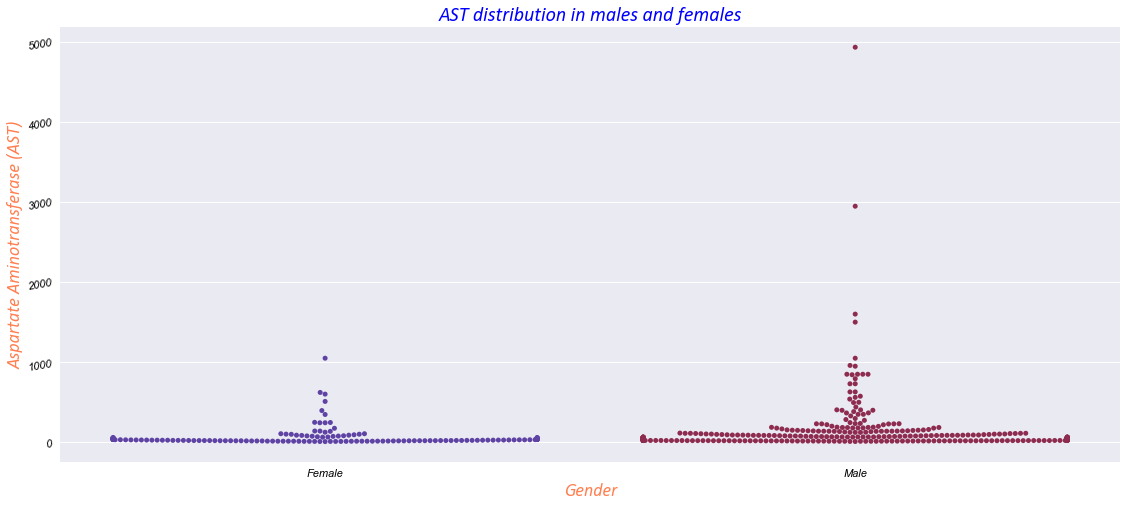

In [59]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Aspartate_Aminotransferase',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Aspartate Aminotransferase (AST)',fontdict=label_font_dict)
    plt.title('AST distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

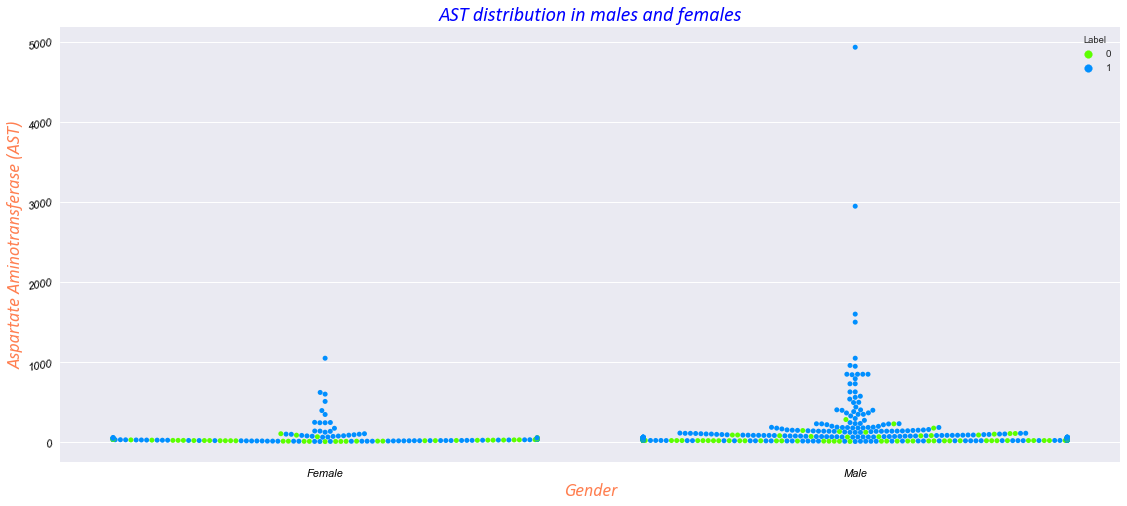

In [60]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Aspartate Aminotransferase (AST)',fontdict=label_font_dict)
    plt.title('AST distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

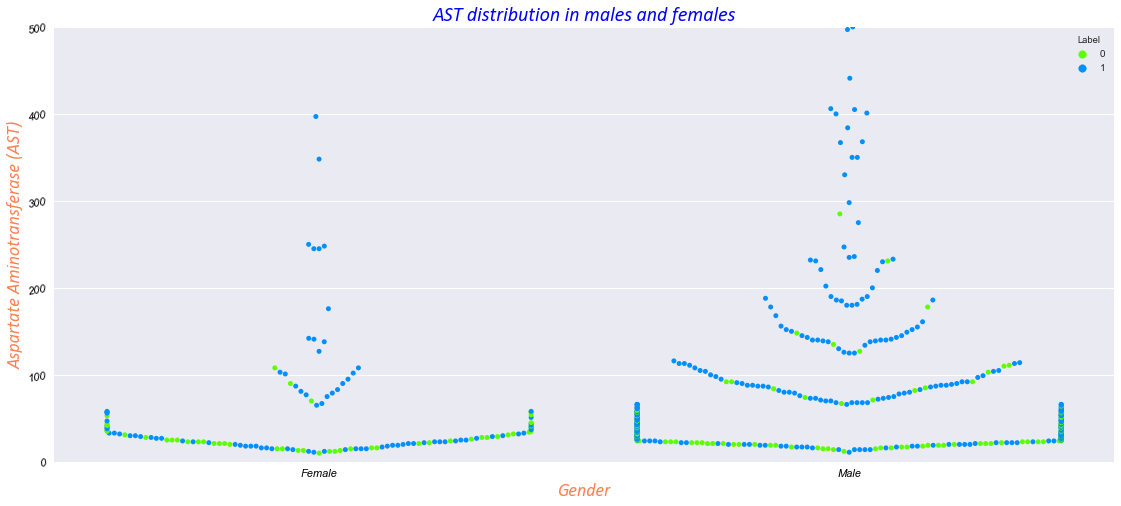

In [61]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.ylim(0,500)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Aspartate Aminotransferase (AST)',fontdict=label_font_dict)
    plt.title('AST distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

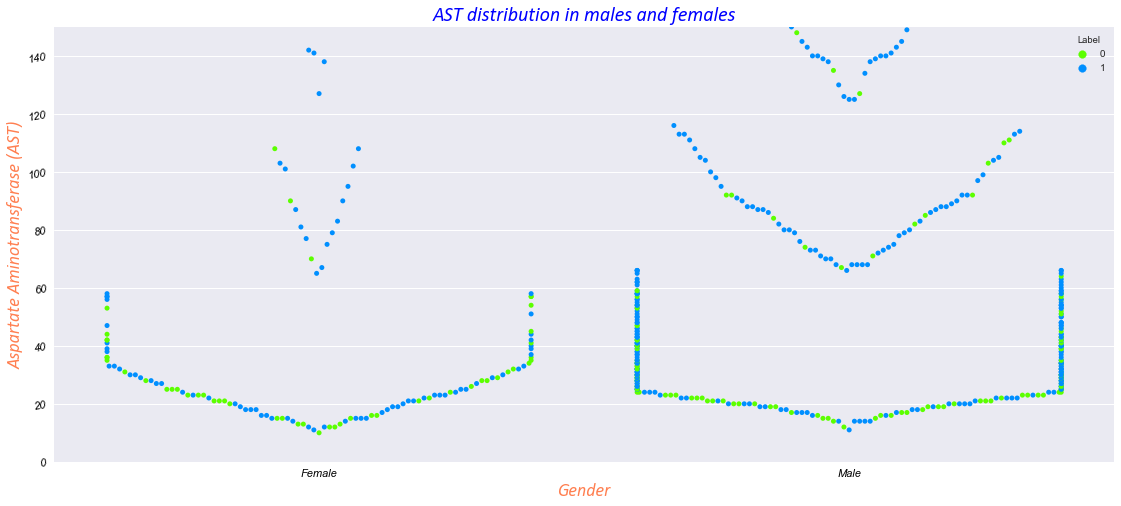

In [62]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,8))
    sns.swarmplot(x='Gender',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.ylim(0,150)
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Aspartate Aminotransferase (AST)',fontdict=label_font_dict)
    plt.title('AST distribution in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **Majority of the data is less than level of 100 IU/L and values are tightly packed which suggests that AST alone is not influencing the presence of liver disease.**

#### **``PLOT - 16``**
##### **``"Relationship b/w ALT and AST for both type of cases"``**

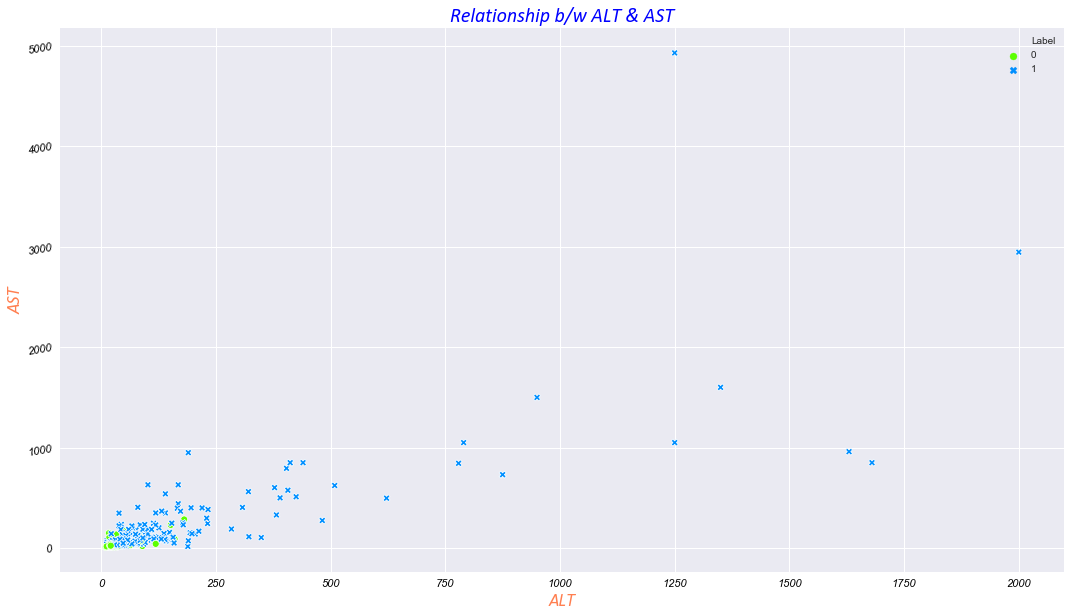

In [63]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,10))
    sns.scatterplot(x='Alamine_Aminotransferase',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,
                    palette=sns.color_palette('gist_rainbow',2),style='Label')
    plt.xlabel('ALT',fontdict=label_font_dict)
    plt.ylabel('AST',fontdict=label_font_dict)
    plt.title('Relationship b/w ALT & AST',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

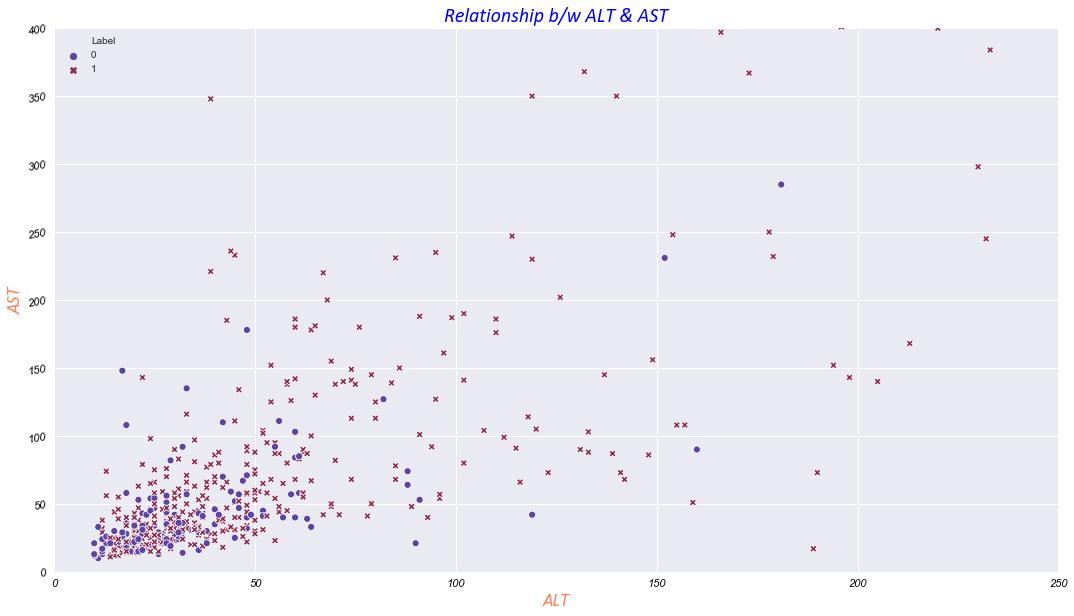

In [64]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,10))
    sns.scatterplot(x='Alamine_Aminotransferase',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,
                   palette=sns.color_palette('twilight',2),style='Label')
    plt.xlim(0,250)
    plt.ylim(0,400)
    plt.xlabel('ALT',fontdict=label_font_dict)
    plt.ylabel('AST',fontdict=label_font_dict)
    plt.title('Relationship b/w ALT & AST',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
    plt.legend(loc='upper left')

In [65]:
np.corrcoef(x=patients_df['Alamine_Aminotransferase'],y=patients_df['Aspartate_Aminotransferase'])

array([[1.        , 0.79196568],
       [0.79196568, 1.        ]])

In [66]:
pd.DataFrame(np.corrcoef(x=patients_df['Alamine_Aminotransferase'],y=patients_df['Aspartate_Aminotransferase'])).applymap(lambda val:np.square(val))

0        1
0  1.00000  0.62721
1  0.62721  1.00000

#### **``PLOT - 17``**
##### **``"Quantiles values of ALP for males and females"``**

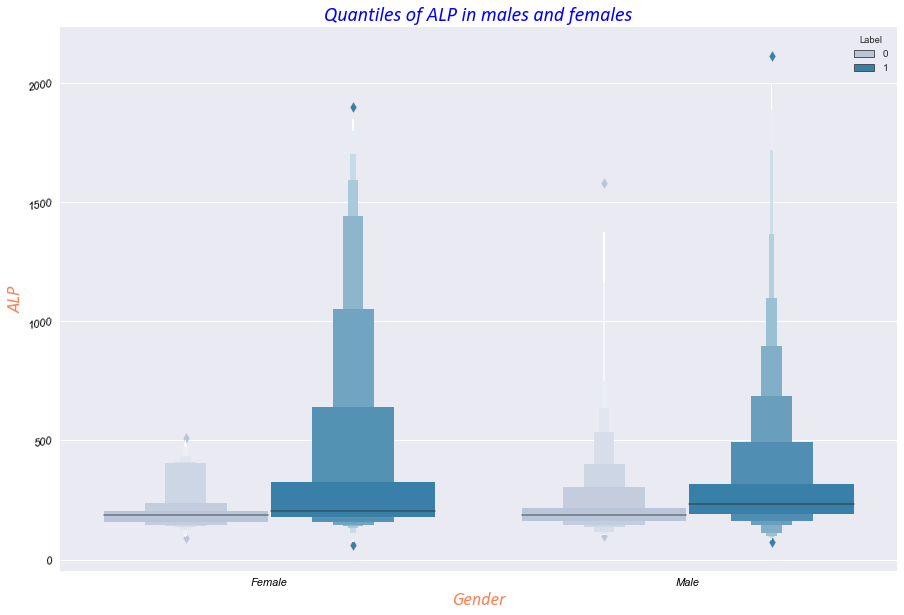

In [67]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.boxenplot(x='Gender',y='Alkaline_Phosphotase',hue='Label',data=patients_df,palette=sns.color_palette('PuBu',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('ALP',fontdict=label_font_dict)
    plt.title('Quantiles of ALP in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **This does tells us that the value of ALP in +ve cases is substanially high.**

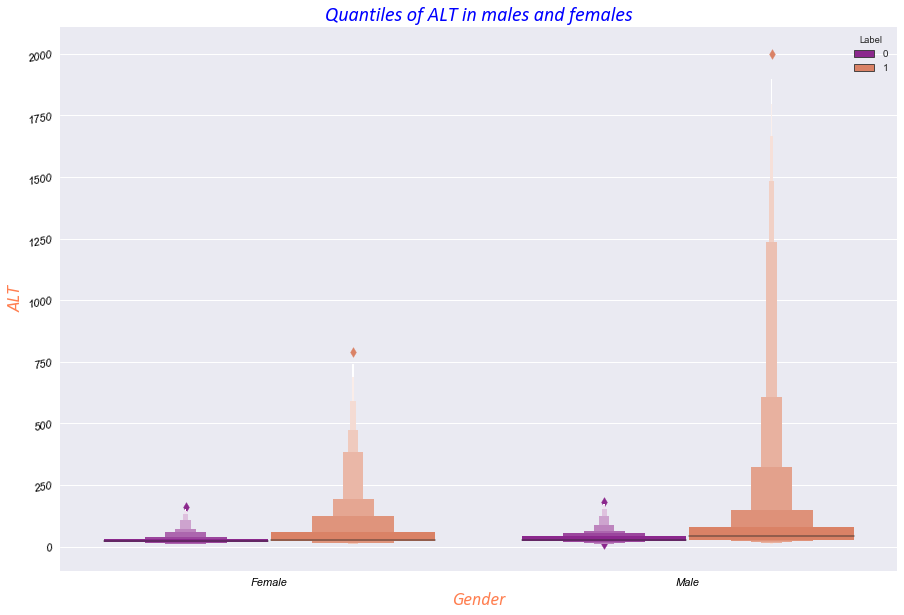

In [68]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.boxenplot(x='Gender',y='Alamine_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('plasma',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('ALT',fontdict=label_font_dict)
    plt.title('Quantiles of ALT in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **This does tells us that the value of ALT in +ve cases is substanially high.**

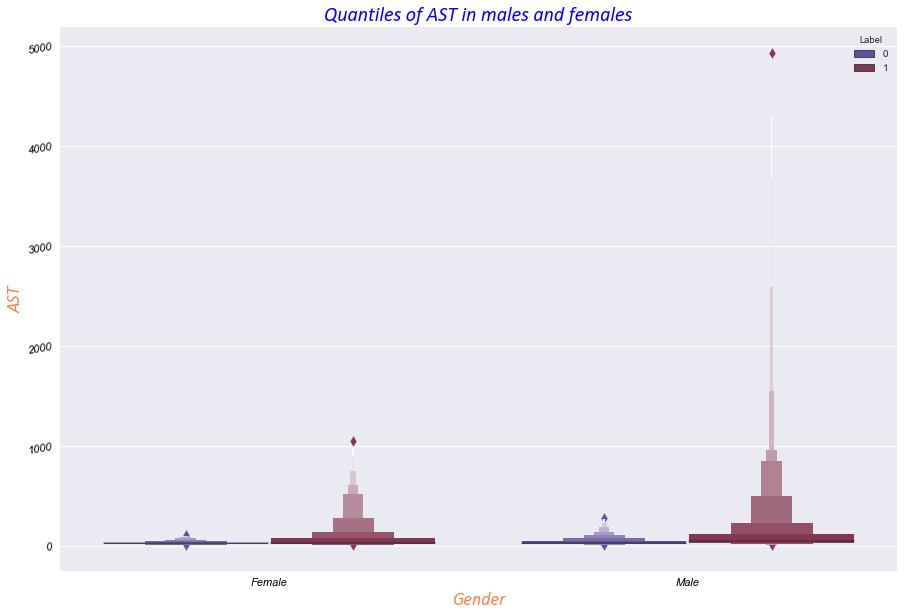

In [69]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.boxenplot(x='Gender',y='Aspartate_Aminotransferase',hue='Label',data=patients_df,palette=sns.color_palette('twilight',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('AST',fontdict=label_font_dict)
    plt.title('Quantiles of AST in males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **This does tells us that the value of AST in +ve cases is substanially high.**

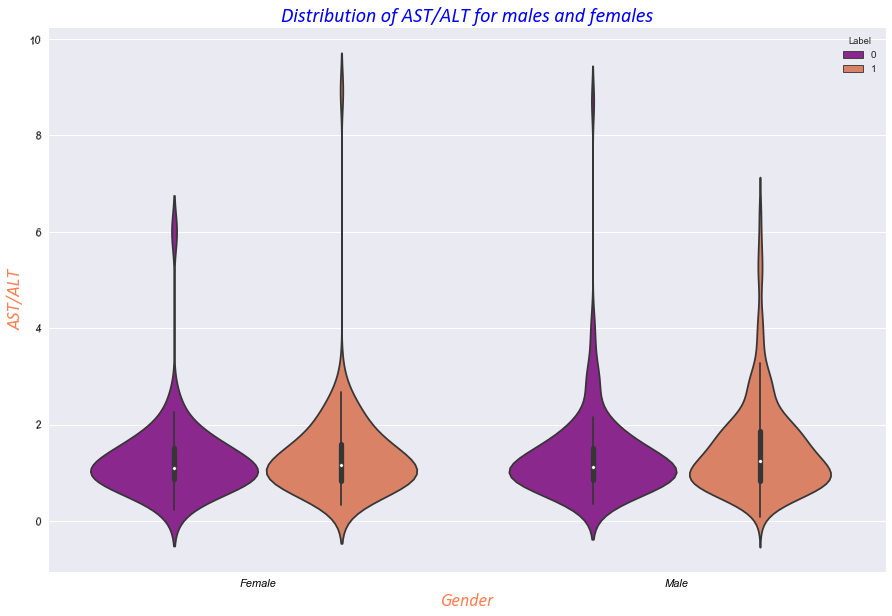

In [70]:
patients_df['AST_ALT_Ratio'] = np.divide(patients_df['Aspartate_Aminotransferase'],patients_df['Alamine_Aminotransferase'])

with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.violinplot(x='Gender',y='AST_ALT_Ratio',hue='Label',data=patients_df,palette=sns.color_palette('plasma',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('AST/ALT',fontdict=label_font_dict)
    plt.title('Distribution of AST/ALT for males and females',fontdict=title_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

#### **``PLOT - 18``**
##### **``"Let's try to find some relationship among several variables"``**

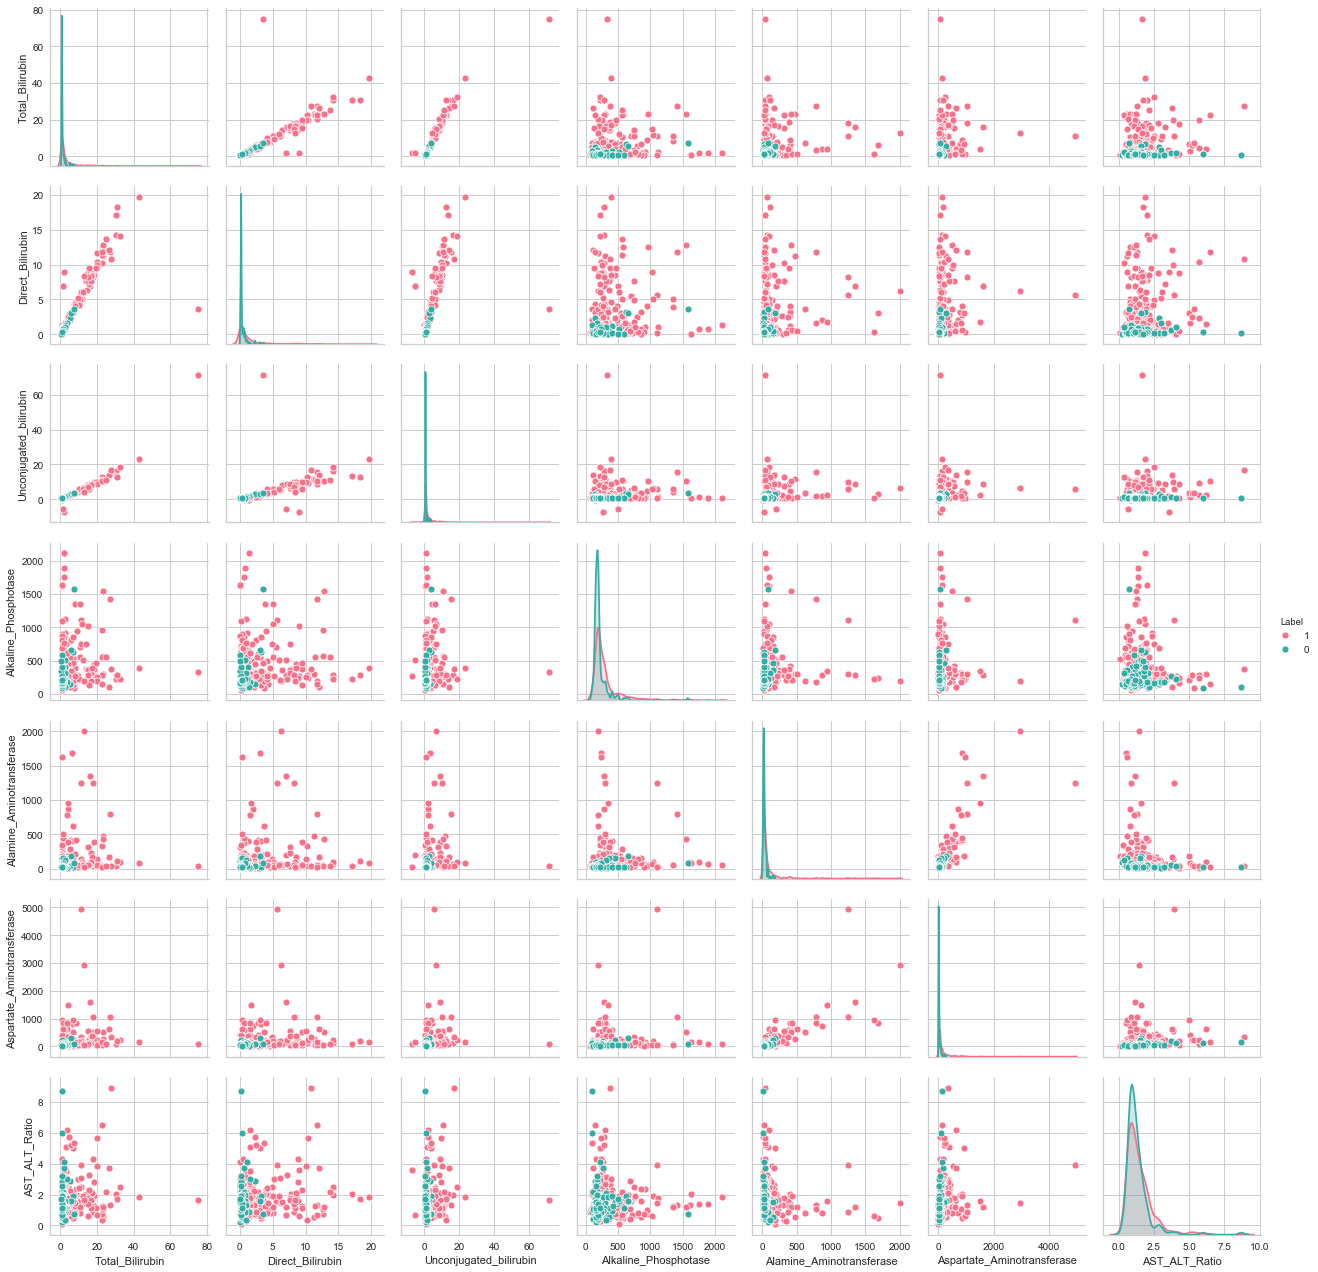

In [71]:
sns.pairplot(data=patients_df[['Total_Bilirubin','Direct_Bilirubin','Unconjugated_bilirubin',
                                           'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
                                           'AST_ALT_Ratio','Label']],hue='Label',palette='husl',hue_order=[1,0])
plt.xticks(color='black',size=11,style='oblique')
plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

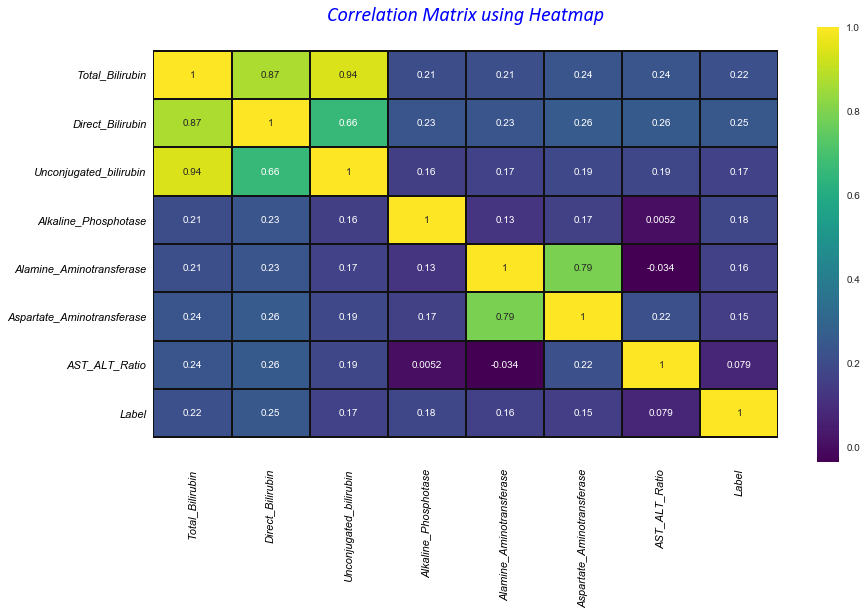

In [72]:
plt.figure(figsize=(14,8))
fig = sns.heatmap(patients_df[['Total_Bilirubin','Direct_Bilirubin','Unconjugated_bilirubin',
                                           'Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
                                           'AST_ALT_Ratio','Label']].corr(),annot=True,cmap='viridis',linecolor='k',linewidths=1)
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Matrix using Heatmap',fontdict=title_font_dict)
plt.xticks(color='black',size=11,style='oblique')
plt.yticks(rotation=0,color='black',size=11,style='oblique')
plt.show()

In [73]:
min_var_vals = patients_df.groupby(['Gender', 'Label']).agg(
    min_Tot_Bilirubin = ('Total_Bilirubin', min),
    min_Dir_Bilirubin = ('Direct_Bilirubin', min),
    min_InDir_Bilirubin = ('Unconjugated_bilirubin', min),
    min_ALP = ('Alkaline_Phosphotase', min),
    min_ALT = ('Alamine_Aminotransferase', min),
    min_AST = ('Aspartate_Aminotransferase', min),
    min_AST_ALT_Ratio = ('AST_ALT_Ratio',min))

min_var_vals

min_ALP  min_ALT  min_AST  min_AST_ALT_Ratio  min_Dir_Bilirubin  \
Gender Label                                                                    
Female 0           90       10       10           0.233333                0.1   
       1           63       12       11           0.320755                0.1   
Male   0          100       10       12           0.352941                0.1   
       1           75       12       11           0.089947                0.1   

              min_InDir_Bilirubin  min_Tot_Bilirubin  
Gender Label                                          
Female 0                      0.4                0.5  
       1                     -0.4                0.5  
Male   0                      0.4                0.5  
       1                     -7.2                0.4

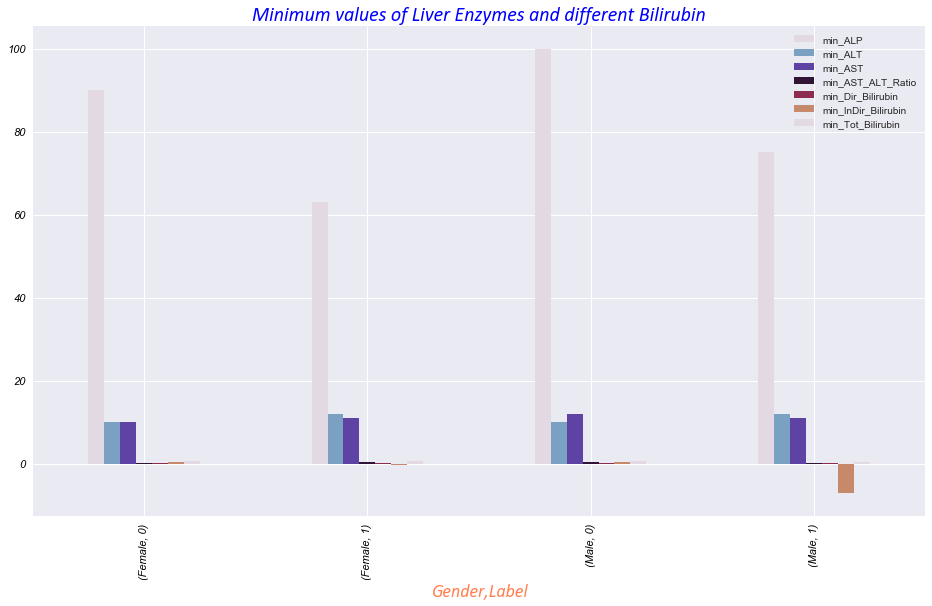

In [74]:
with plt.style.context('seaborn'):
    min_var_vals.plot(kind='bar',colormap='twilight',figsize=(16,9))
    plt.xlabel('Gender,Label',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Minimum values of Liver Enzymes and different Bilirubin',fontdict=title_font_dict)
plt.legend()
plt.show()

In [75]:
max_var_vals = patients_df.groupby(['Gender', 'Label']).agg(
    max_Tot_Bilirubin = ('Total_Bilirubin', max),
    max_Dir_Bilirubin = ('Direct_Bilirubin', max),
    max_InDir_Bilirubin = ('Unconjugated_bilirubin', max),
    max_ALP = ('Alkaline_Phosphotase', max),
    max_ALT = ('Alamine_Aminotransferase', max),
    max_AST = ('Aspartate_Aminotransferase', max),
    max_AST_ALT_Ratio = ('AST_ALT_Ratio',max))

max_var_vals

max_ALP  max_ALT  max_AST  max_AST_ALT_Ratio  max_Dir_Bilirubin  \
Gender Label                                                                    
Female 0          509      160      108           6.000000                1.2   
       1         1896      790     1050           8.923077               12.8   
Male   0         1580      181      285           8.705882                3.6   
       1         2110     2000     4929           6.500000               19.7   

              max_InDir_Bilirubin  max_Tot_Bilirubin  
Gender Label                                          
Female 0                      1.5                2.6  
       1                     16.9               27.7  
Male   0                      3.7                7.3  
       1                     71.4               75.0

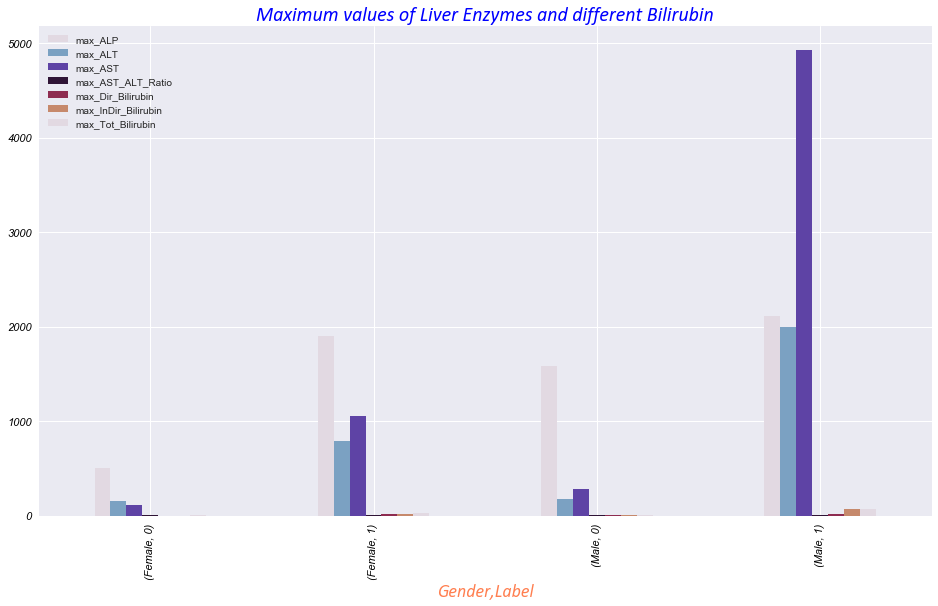

In [76]:
with plt.style.context('seaborn'):
    max_var_vals.plot(kind='bar',colormap='twilight',figsize=(16,9))
    plt.xlabel('Gender,Label',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Maximum values of Liver Enzymes and different Bilirubin',fontdict=title_font_dict)
plt.legend()
plt.show()

#### **``PLOT - 19``**
##### **``"Let's try to find some relationship among Total Protiens, Albumin and Albumin/Globulin(ratio)"``**

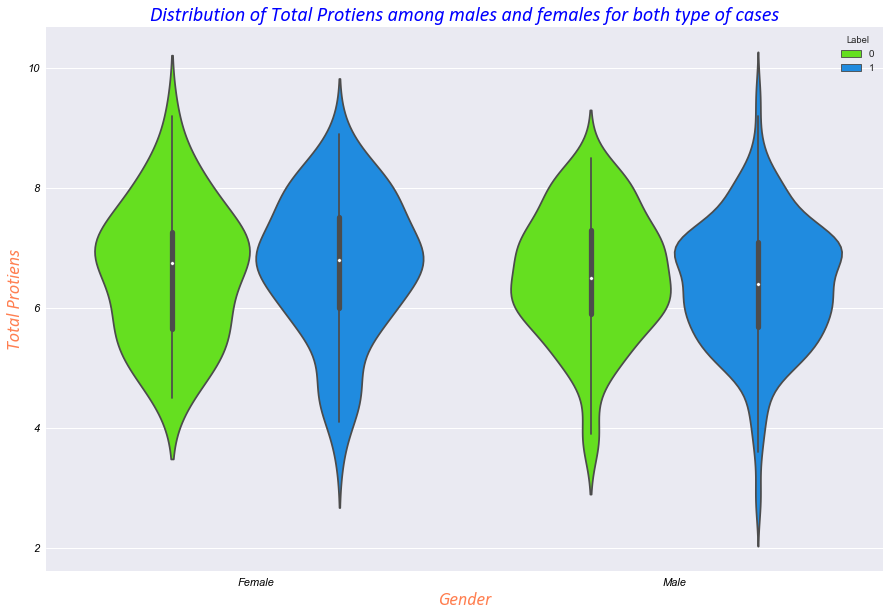

In [77]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.violinplot(x='Gender',hue='Label',y='Total_Protiens',data=patients_df,palette=sns.color_palette('gist_rainbow',2))
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Total Protiens',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Distribution of Total Protiens among males and females for both type of cases',fontdict=title_font_dict)
plt.show()

##### **``Does Total Protiens decreases over the period of age??``**

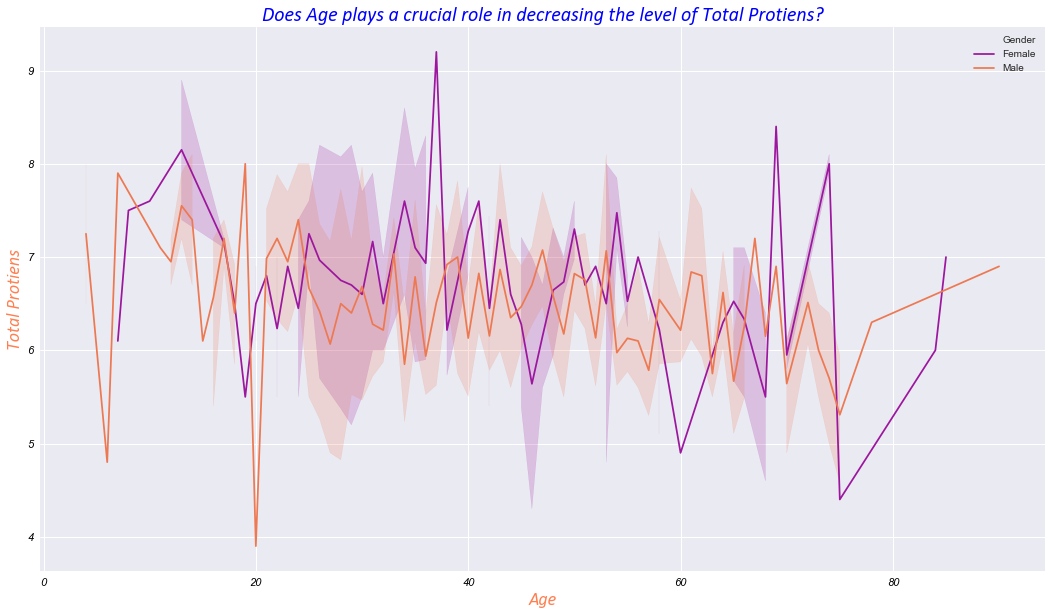

In [78]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,10))
    sns.lineplot(x='Age',y='Total_Protiens',hue='Gender',data=patients_df,palette=sns.color_palette('plasma',2),ci=95)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Total Protiens',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Does Age plays a crucial role in decreasing the level of Total Protiens?',fontdict=title_font_dict)
plt.legend()
plt.show()

##### **Certainly, the answer is No.**
##### **``Let's check the effect of Albumin towards liver ailment``**

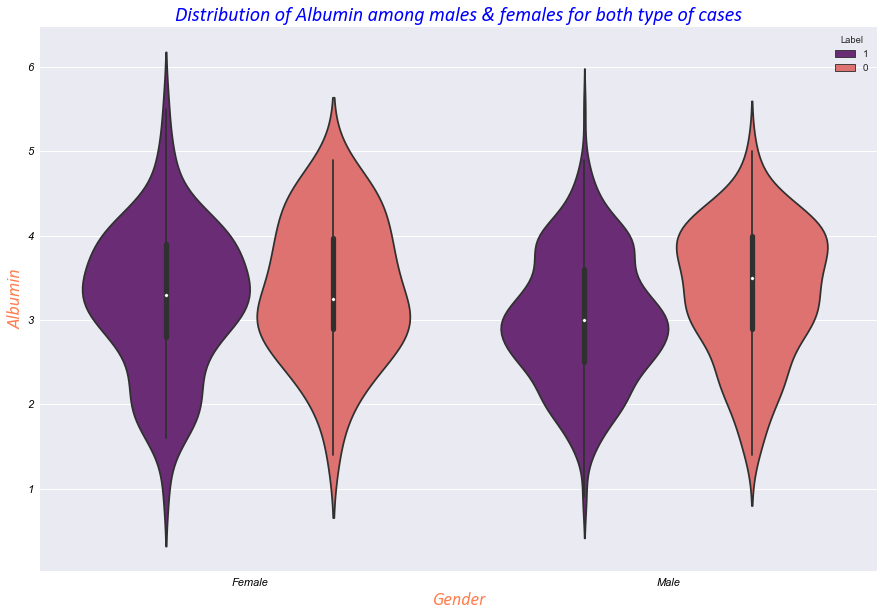

In [79]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.violinplot(x='Gender',hue='Label',y='Albumin',data=patients_df,palette=sns.color_palette('magma',2),hue_order=[1,0])
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('Albumin',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Distribution of Albumin among males & females for both type of cases',fontdict=title_font_dict)
plt.show()

##### **``Does Albumin decreases over the period of age??``**

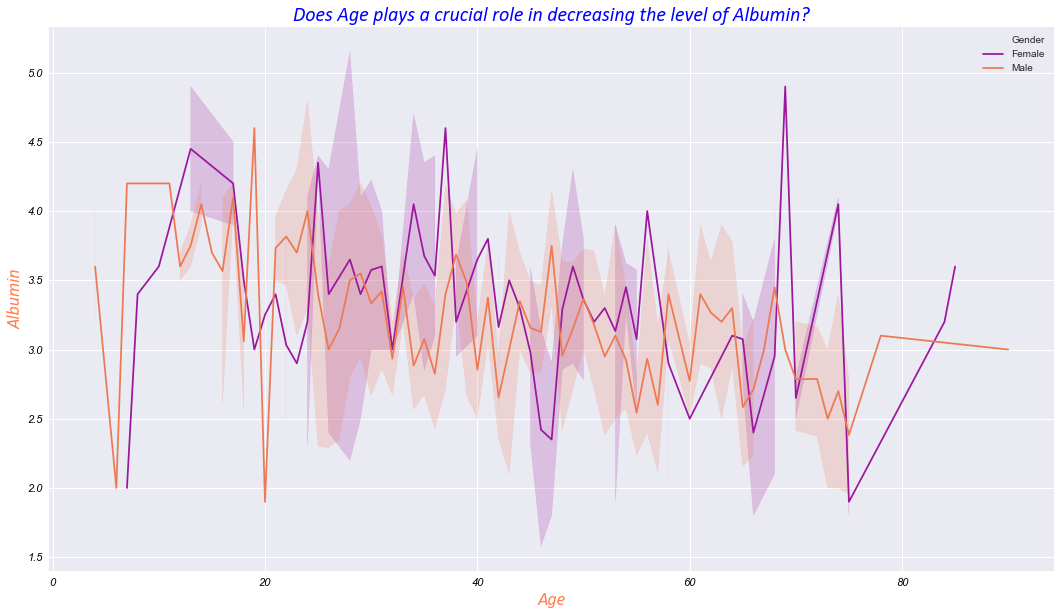

In [80]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,10))
    sns.lineplot(x='Age',y='Albumin',hue='Gender',data=patients_df,palette=sns.color_palette('plasma',2),ci=95)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('Albumin',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Does Age plays a crucial role in decreasing the level of Albumin?',fontdict=title_font_dict)
plt.legend()
plt.show()

##### **There is a slight downfall we can see in the Albumin levels as the age increases.**
##### **``Let's check the effect of A/G Ratio towards liver ailment``**

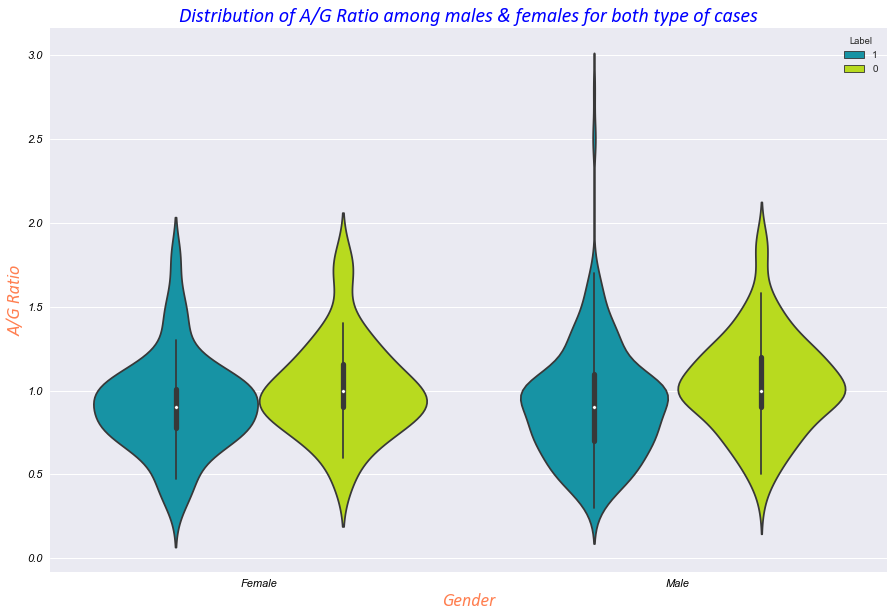

In [81]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,10))
    sns.violinplot(x='Gender',hue='Label',y='Albumin_and_Globulin_Ratio',data=patients_df,palette=sns.color_palette('nipy_spectral',2),hue_order=[1,0])
    plt.xlabel('Gender',fontdict=label_font_dict)
    plt.ylabel('A/G Ratio',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Distribution of A/G Ratio among males & females for both type of cases',fontdict=title_font_dict)
plt.show()

##### **``Let's check the effect of A/G Ratio towards liver ailment``**

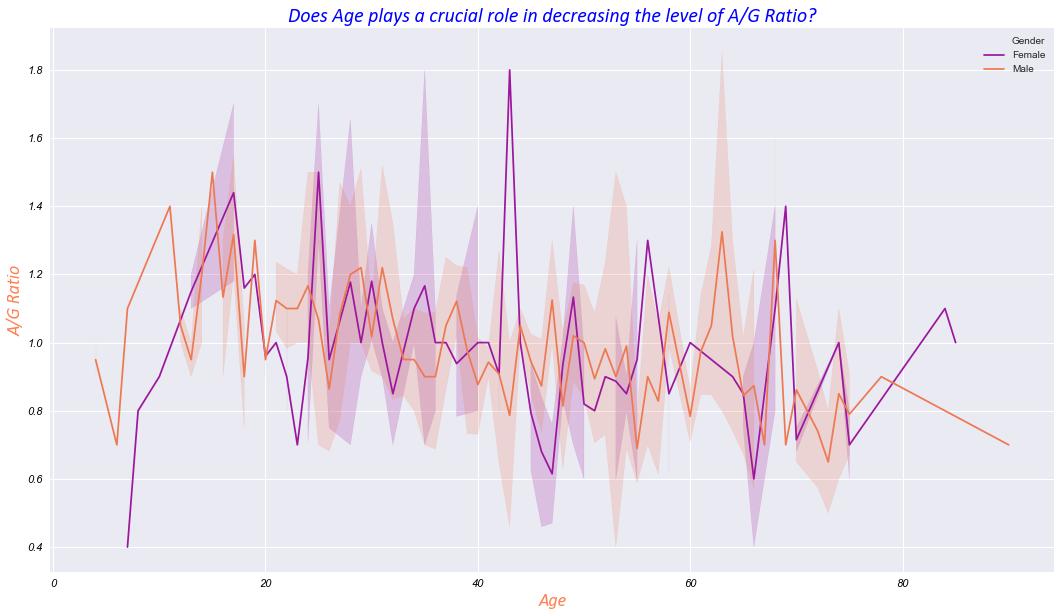

In [82]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,10))
    sns.lineplot(x='Age',y='Albumin_and_Globulin_Ratio',hue='Gender',data=patients_df,palette=sns.color_palette('plasma',2),ci=95)
    plt.xlabel('Age',fontdict=label_font_dict)
    plt.ylabel('A/G Ratio',fontdict=label_font_dict)
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Does Age plays a crucial role in decreasing the level of A/G Ratio?',fontdict=title_font_dict)
plt.legend()
plt.show()

##### **Overall, we can say that there is downwards movement in the levels of A/G Ratio as the age increases. This can be due the decreasing value Albumin which brings the overall value of the ratio down.**

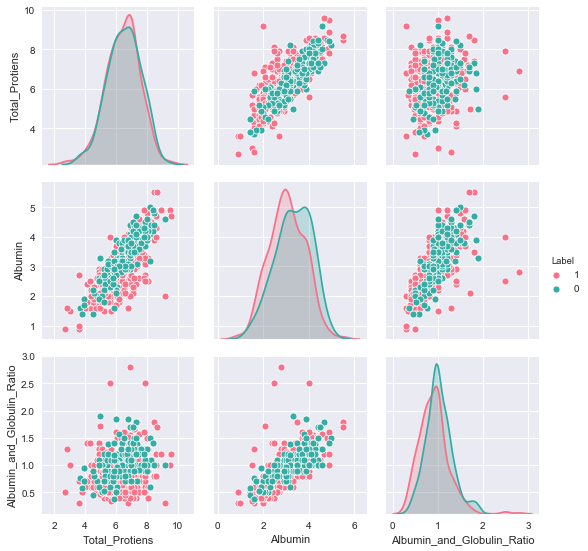

In [83]:
with plt.style.context('seaborn'):
    sns.pairplot(data=patients_df[['Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Label']],hue='Label',palette='husl',hue_order=[1,0])
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **As, the previous violin plots have indicated we really cannot separate the +ve and -ve cases only by going with these 3 columns. Now, lets try to see their correlation values...**

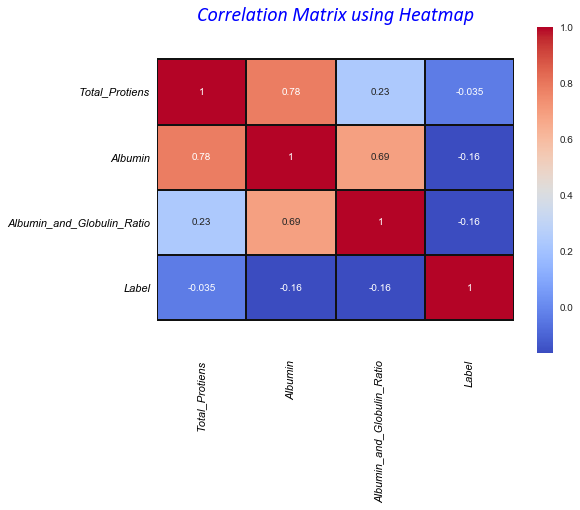

In [84]:
plt.figure(figsize=(8,6))
fig = sns.heatmap(patients_df[['Total_Protiens','Albumin','Albumin_and_Globulin_Ratio','Label']].corr(),
                  annot=True,cmap='coolwarm',linecolor='k',linewidths=0.9)
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Matrix using Heatmap',fontdict=title_font_dict)
plt.xticks(rotation=90,color='black',size=11,style='oblique')
plt.yticks(rotation=0,color='black',size=11,style='oblique')
plt.show()

##### **Let's see the all features pair plot..**

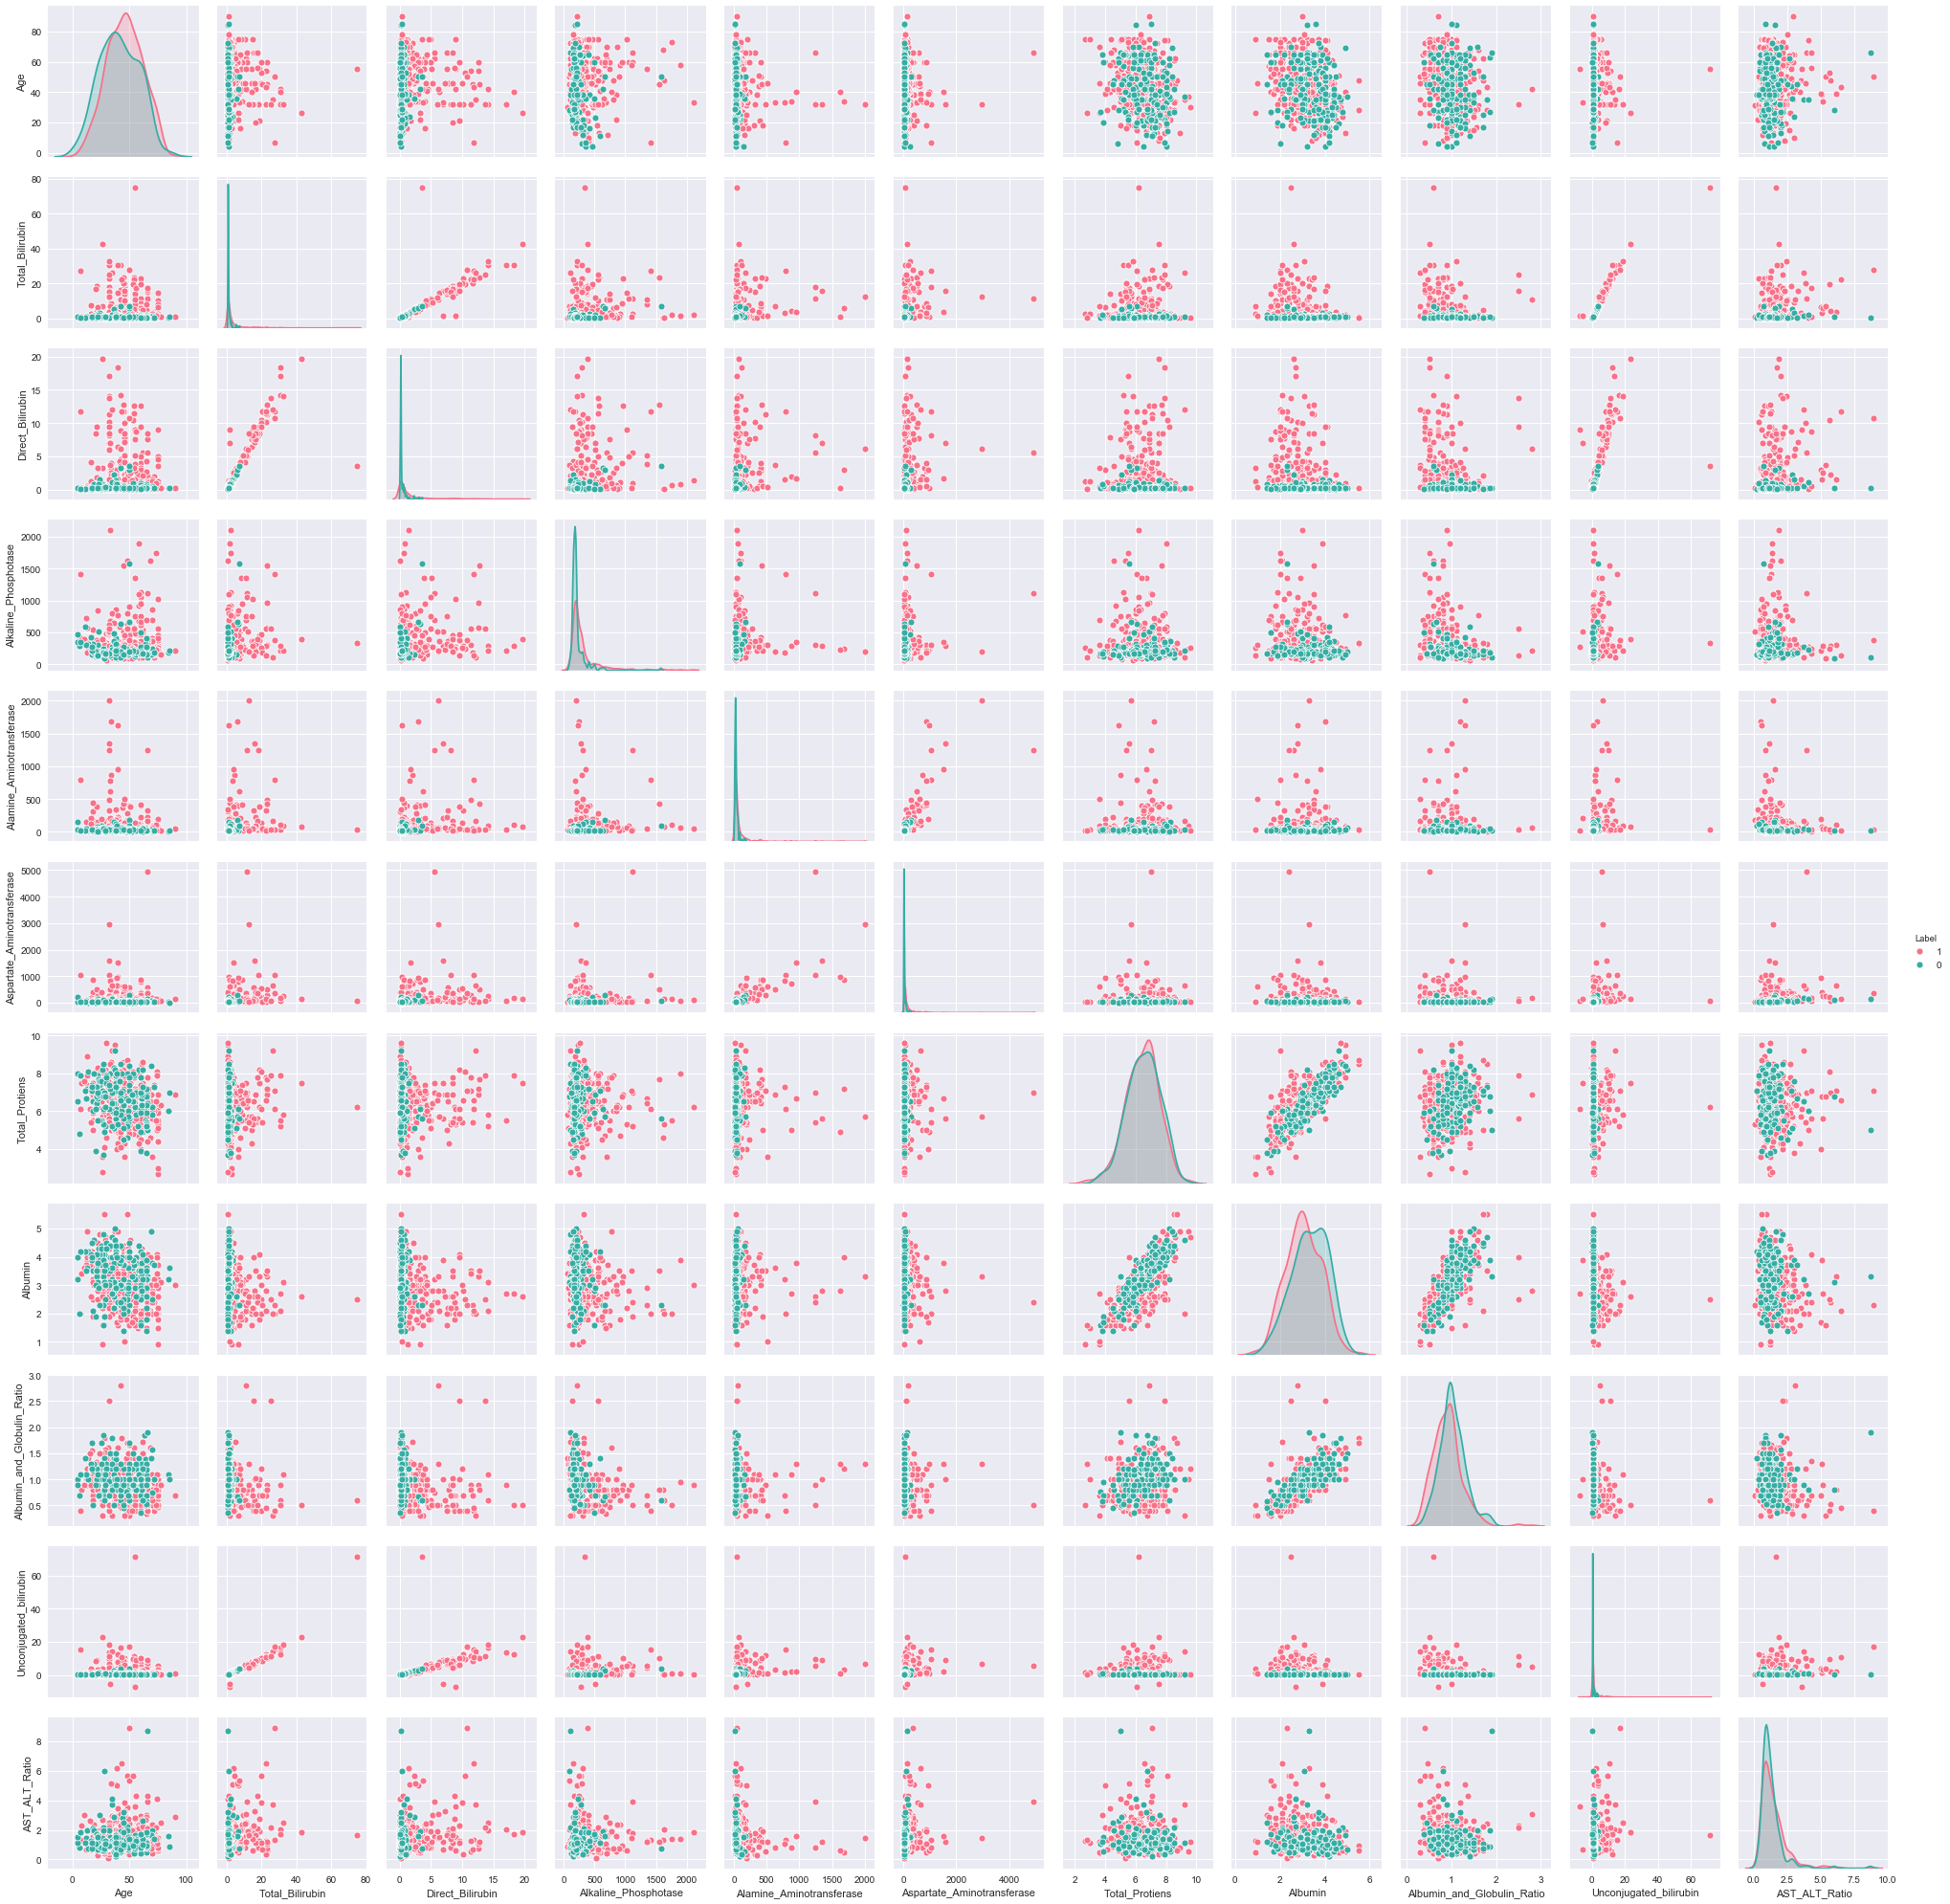

In [85]:
with plt.style.context('seaborn'):
    sns.pairplot(data=patients_df,hue='Label',palette='husl',hue_order=[1,0])
    plt.xticks(color='black',size=11,style='oblique')
    plt.yticks(rotation=10,color='black',size=11,style='oblique')
plt.show()

##### **So, we really cannnot separate the +ve and -ve cases by forming a relationship among two features as most of the data points totally overlap each other. However, in some of the features as we found earlier linear progression exists.**

##### **Let's see the all features correlation matrix**

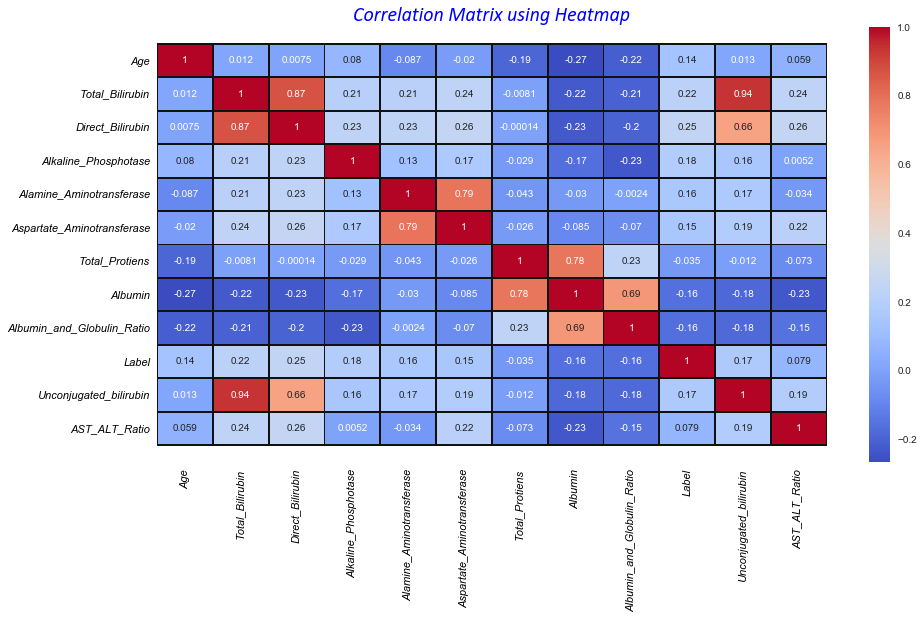

In [86]:
plt.figure(figsize=(15,8))
fig = sns.heatmap(patients_df.corr(),
                  annot=True,cmap='coolwarm',linecolor='k',linewidths=0.9)
bottom, top = fig.get_ylim()
fig.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Correlation Matrix using Heatmap',fontdict=title_font_dict)
plt.xticks(rotation=90,color='black',size=11,style='oblique')
plt.yticks(rotation=0,color='black',size=11,style='oblique')
plt.show()

##### **Few things to point out here:**
 - ##### **Unconjugated or In-direct Bilirubin is highly correlated with Total and Direct Bilirubin. I just created this column to see whether it really influences the result and it is after all the substraction of Direct Bilirubin from Total. So, will drop this feature.**
 - ##### **Direct and Total Bilirubin are also highly correlated with each other. During EDA, we have also found that both are behaving in same manner at majority of the places. So, will see the evaluation metrics with both and w/o one of them.**
 - ##### **ALT and AST are also correlated with each other. During EDA, we have also found that both are behaving in same manner at majority of the places. And, I have already created a AST/ALT(ratio) feature. Hence, will remove these columns.**
 - ##### **Total Protiens and Albumin are correlated to each other, it is because 60% of total protiens occupied by albumin rest by Globulin. As we have the A/G Ratio feature so will go ahead and remove the Albumin column.**

#### **``Encoding Gender Feature``**

be = ce.BinaryEncoder(cols='Gender')

patients_df = be.fit_transform(patients_df)
patients_df.head()

#### **``Filling missing values in A/G Ratio``**

In [87]:
patients_df[patients_df['Albumin_and_Globulin_Ratio'].isna()]

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
209   45  Female              0.9               0.3                   189   
241   51    Male              0.8               0.2                   230   
253   35  Female              0.6               0.2                   180   
312   27    Male              1.3               0.6                   106   

     Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
209                        23                          33             6.6   
241                        24                          46             6.5   
253                        12                          15             5.2   
312                        25                          54             8.5   

     Albumin  Albumin_and_Globulin_Ratio  Label  Unconjugated_bilirubin  \
209      3.9                         NaN      1                     0.6   
241      3.1                         NaN      1                     0.6   
253      2.7                         NaN      0                     0.4   
312      4.8                         NaN      0                     0.7   

     AST_ALT_Ratio  
209       1.434783  
241       1.916667  
253       1.250000  
312       2.160000

##### **Now, by multiple ways you can fill the missing values here, however, as I mentioned above:**

\begin{align}
\\ Total \ Protiens &= 0.60 \ (Albumin) + 0.40 \ (Globulin)
\end{align}

##### **Hence, calulate the values of A/G Ratio for these 4 records by using the Total_Protiens and Albumin features.**

In [88]:
patients_df['Albumin_and_Globulin_Ratio'] = pd.DataFrame(patients_df.apply(lambda val: val['Albumin_and_Globulin_Ratio'] if str(val['Albumin_and_Globulin_Ratio']).upper() != 'NAN' 
                                                                           else val['Albumin']/(val['Total_Protiens'] - val['Albumin']),axis=1))

patients_df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Label  Unconjugated_bilirubin  \
0      3.3                        0.90      1                     0.6   
1      3.2                        0.74      1                     5.4   
2      3.3                        0.89      1                     3.2   
3      3.4                        1.00      1                     0.6   
4      2.4                        0.40      1                     1.9   

   AST_ALT_Ratio  
0       1.125000  
1       1.562500  
2       1.133333  
3       1.428571  
4       2.185185

#### **``Inspecting some features one by one``**

##### **``1. Alkaline_Phosphotase``**

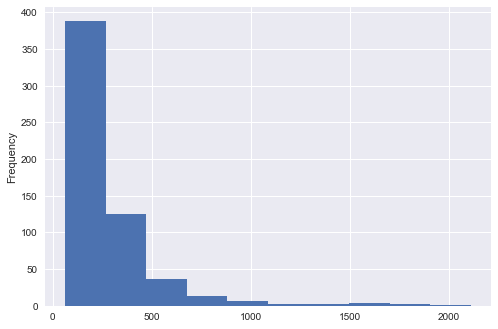

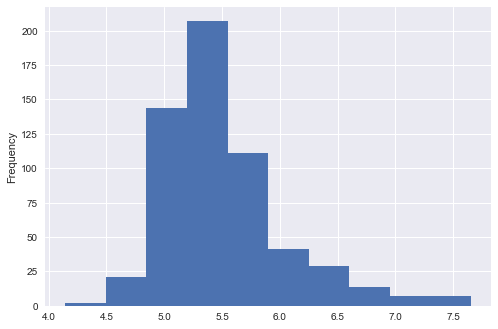

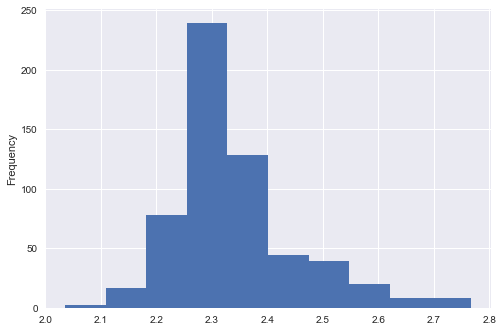

In [89]:
with plt.style.context('seaborn'):
    patients_df['Alkaline_Phosphotase'].plot(kind='hist')
    plt.show()
    np.log(patients_df['Alkaline_Phosphotase']).plot(kind='hist')
    plt.show()
    np.sqrt(np.log(patients_df['Alkaline_Phosphotase'])).plot(kind='hist')
    plt.show()

##### **``2. Alamine_Aminotransferase``**

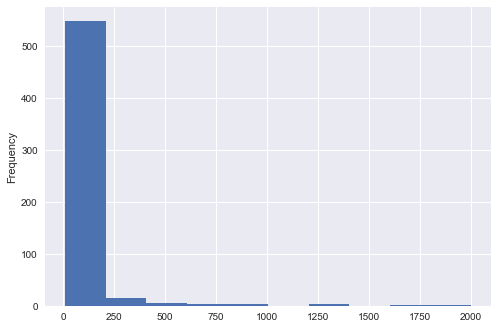

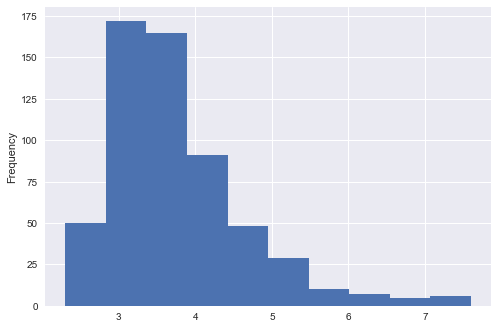

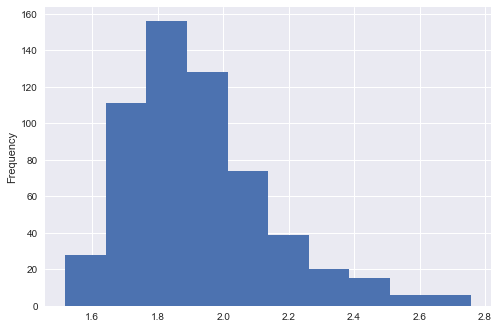

In [90]:
with plt.style.context('seaborn'):
    patients_df['Alamine_Aminotransferase'].plot(kind='hist')
    plt.show()
    np.log(patients_df['Alamine_Aminotransferase']).plot(kind='hist')
    plt.show()
    np.sqrt(np.log(patients_df['Alamine_Aminotransferase'])).plot(kind='hist')
    plt.show()

##### **``3. Aspartate_Aminotransferase``**

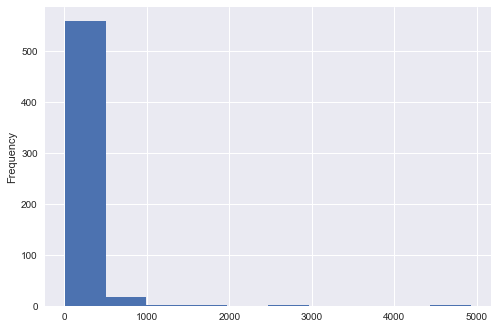

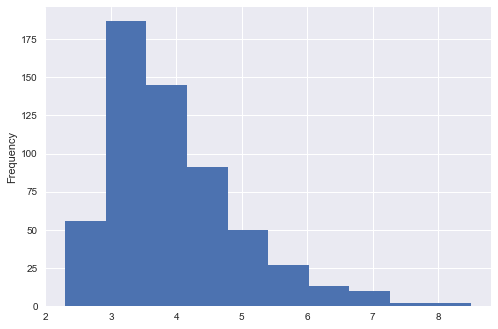

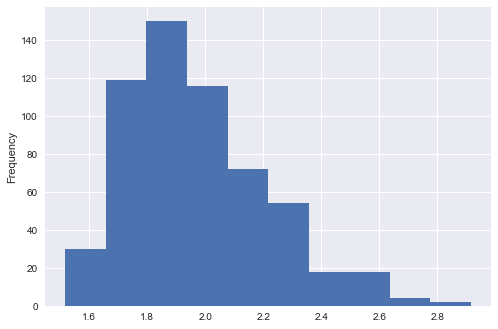

In [91]:
with plt.style.context('seaborn'):
    patients_df['Aspartate_Aminotransferase'].plot(kind='hist')
    plt.show()
    np.log(patients_df['Aspartate_Aminotransferase']).plot(kind='hist')
    plt.show()
    np.sqrt(np.log(patients_df['Aspartate_Aminotransferase'])).plot(kind='hist')
    plt.show()

In [92]:
patients_df.head()

Age  Gender  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0   65  Female              0.7               0.1                   187   
1   62    Male             10.9               5.5                   699   
2   62    Male              7.3               4.1                   490   
3   58    Male              1.0               0.4                   182   
4   72    Male              3.9               2.0                   195   

   Alamine_Aminotransferase  Aspartate_Aminotransferase  Total_Protiens  \
0                        16                          18             6.8   
1                        64                         100             7.5   
2                        60                          68             7.0   
3                        14                          20             6.8   
4                        27                          59             7.3   

   Albumin  Albumin_and_Globulin_Ratio  Label  Unconjugated_bilirubin  \
0      3.3                        0.90      1                     0.6   
1      3.2                        0.74      1                     5.4   
2      3.3                        0.89      1                     3.2   
3      3.4                        1.00      1                     0.6   
4      2.4                        0.40      1                     1.9   

   AST_ALT_Ratio  
0       1.125000  
1       1.562500  
2       1.133333  
3       1.428571  
4       2.185185

patients_df['ALP_LOG'] = np.log(patients_df['Alkaline_Phosphotase'])
patients_df['ALT_LOG'] = np.log(patients_df['Alamine_Aminotransferase'])
patients_df['AST_LOG'] = np.log(patients_df['Aspartate_Aminotransferase'])
patients_df['AST_ALT_Ratio'] = patients_df['AST_LOG']/patients_df['ALT_LOG']

#### **``Normalizing the Data``**

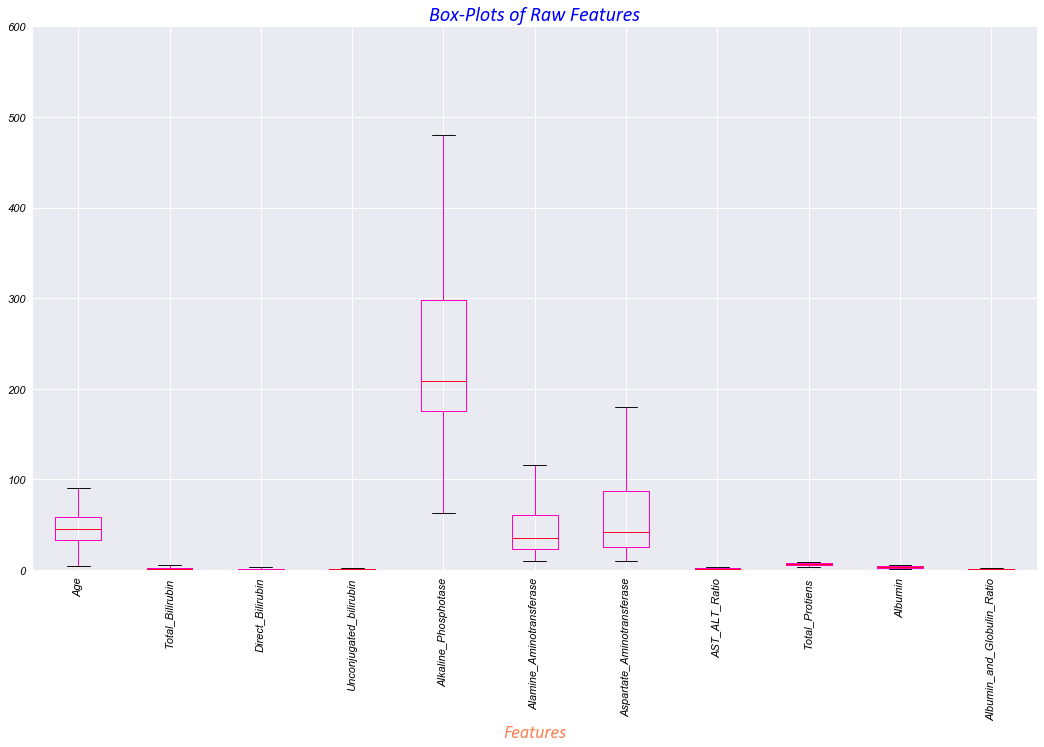

In [93]:
with plt.style.context('seaborn'):
    patients_df[['Age','Total_Bilirubin','Direct_Bilirubin','Unconjugated_bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
    'AST_ALT_Ratio','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']].plot(kind='box',figsize=(18,10),colormap='gist_rainbow_r')
    plt.xlabel('Features',fontdict=label_font_dict)
    plt.xticks(rotation=90,color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Box-Plots of Raw Features',fontdict=title_font_dict)
    plt.ylim(bottom=0,top=600)
plt.show()

In [94]:
unnormalize_patients_df = patients_df[[
    'Age','Total_Bilirubin','Direct_Bilirubin','Unconjugated_bilirubin','Alkaline_Phosphotase','Alamine_Aminotransferase','Aspartate_Aminotransferase',
    'AST_ALT_Ratio','Total_Protiens','Albumin','Albumin_and_Globulin_Ratio']]

unnormalize_patients_df.head()

Age  Total_Bilirubin  Direct_Bilirubin  Unconjugated_bilirubin  \
0   65              0.7               0.1                     0.6   
1   62             10.9               5.5                     5.4   
2   62              7.3               4.1                     3.2   
3   58              1.0               0.4                     0.6   
4   72              3.9               2.0                     1.9   

   Alkaline_Phosphotase  Alamine_Aminotransferase  Aspartate_Aminotransferase  \
0                   187                        16                          18   
1                   699                        64                         100   
2                   490                        60                          68   
3                   182                        14                          20   
4                   195                        27                          59   

   AST_ALT_Ratio  Total_Protiens  Albumin  Albumin_and_Globulin_Ratio  
0       1.125000             6.8      3.3                        0.90  
1       1.562500             7.5      3.2                        0.74  
2       1.133333             7.0      3.3                        0.89  
3       1.428571             6.8      3.4                        1.00  
4       2.185185             7.3      2.4                        0.40

In [95]:
normalize_patients_df = pd.DataFrame(prep.normalize(unnormalize_patients_df,norm='l2'))
normalize_patients_df.columns = unnormalize_patients_df.columns
normalize_patients_df.head(10)

Age  Total_Bilirubin  Direct_Bilirubin  Unconjugated_bilirubin  \
0  0.325676         0.003507          0.000501                0.003006   
1  0.087092         0.015311          0.007726                0.007585   
2  0.123431         0.014533          0.008162                0.006371   
3  0.300933         0.005189          0.002075                0.003113   
4  0.330338         0.017893          0.009176                0.008717   
5  0.214426         0.008391          0.003263                0.005128   
6  0.164914         0.005709          0.001269                0.004440   
7  0.141467         0.004390          0.001463                0.002927   
8  0.082939         0.004391          0.001464                0.002927   
9  0.180005         0.002291          0.000655                0.001636   

   Alkaline_Phosphotase  Alamine_Aminotransferase  Aspartate_Aminotransferase  \
0              0.936945                  0.080166                    0.090187   
1              0.981892                  0.089901                    0.140471   
2              0.975503                  0.119449                    0.135376   
3              0.944307                  0.072639                    0.103770   
4              0.894667                  0.123877                    0.270694   
5              0.969581                  0.088567                    0.065260   
6              0.976796                  0.101485                    0.076114   
7              0.985390                  0.068294                    0.053660   
8              0.985506                  0.107332                    0.092696   
9              0.949118                  0.173460                    0.189824   

   AST_ALT_Ratio  Total_Protiens   Albumin  Albumin_and_Globulin_Ratio  
0       0.005637        0.034071  0.016534                    0.004509  
1       0.002195        0.010535  0.004495                    0.001039  
2       0.002256        0.013936  0.006570                    0.001772  
3       0.007412        0.035282  0.017641                    0.005189  
4       0.010026        0.033493  0.011011                    0.001835  
5       0.003435        0.035427  0.020510                    0.006060  
6       0.004757        0.044400  0.022200                    0.006343  
7       0.003833        0.032684  0.017561                    0.005366  
8       0.004213        0.036103  0.020003                    0.005854  
9       0.003582        0.022255  0.011128                    0.003273

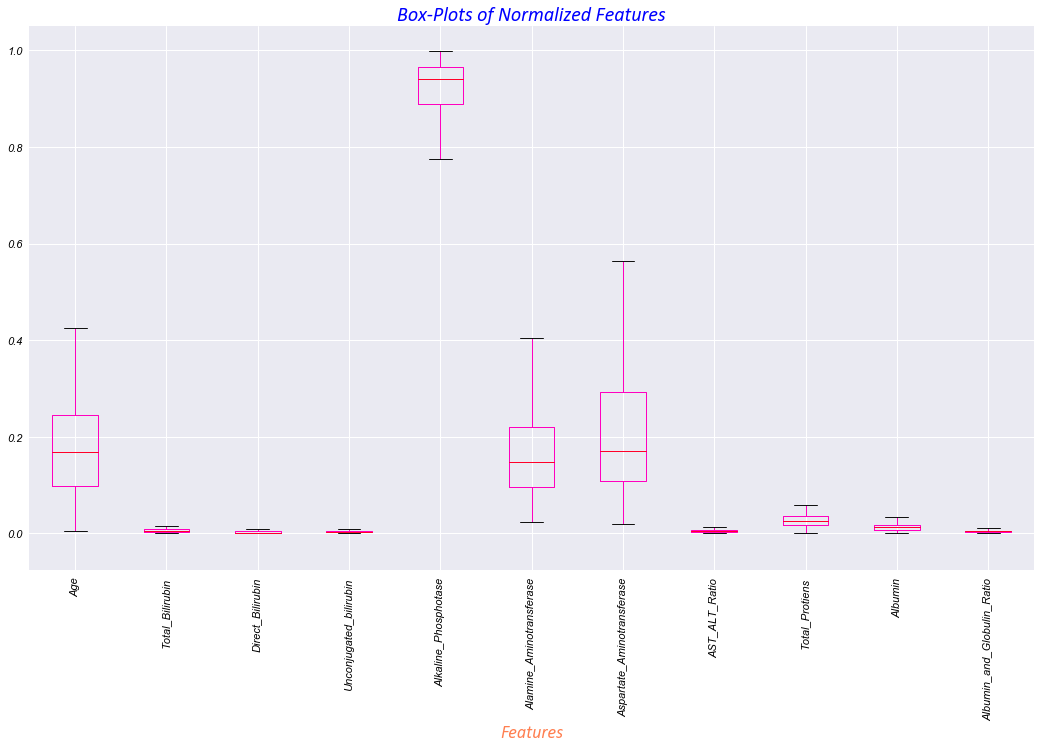

In [96]:
with plt.style.context('seaborn'):
    normalize_patients_df.plot(kind='box',figsize=(18,10),colormap='gist_rainbow_r')
    plt.xlabel('Features',fontdict=label_font_dict)
    plt.xticks(rotation=90,color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Box-Plots of Normalized Features',fontdict=title_font_dict)
plt.show()

In [97]:
normalize_patients_df = pd.concat([normalize_patients_df,patients_df['Label']],axis=1)

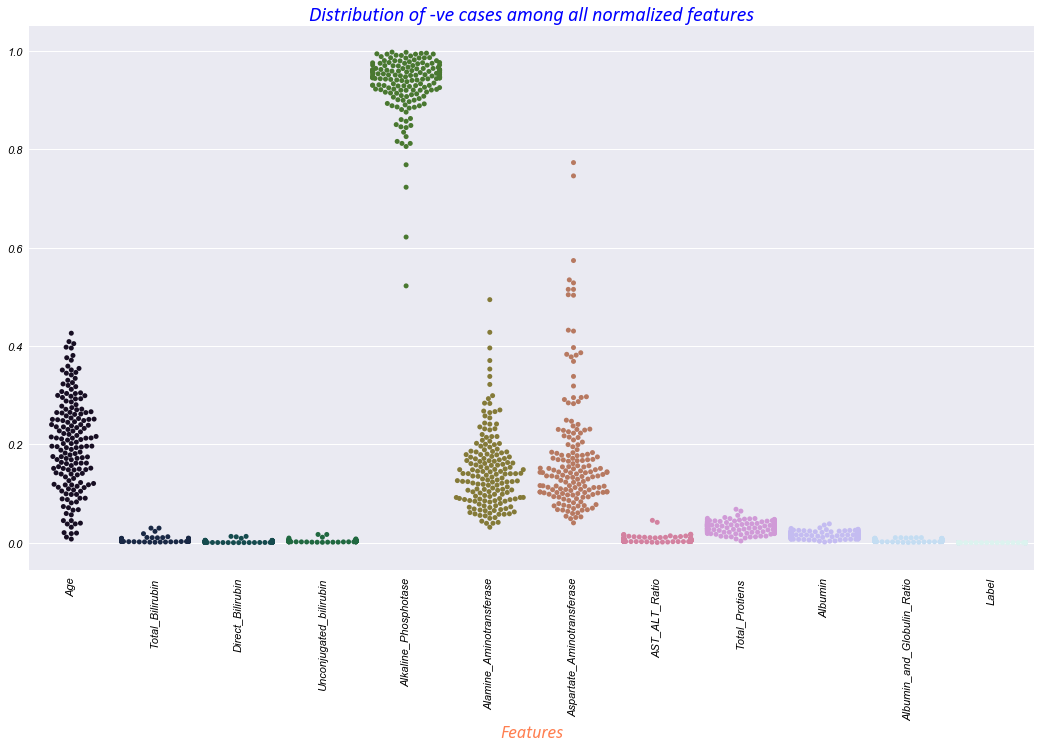

In [98]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,10))
    sns.swarmplot(data=normalize_patients_df[normalize_patients_df['Label'] == 0],palette='cubehelix')
    plt.xlabel('Features',fontdict=label_font_dict)
    plt.xticks(rotation=90,color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Distribution of -ve cases among all normalized features',fontdict=title_font_dict)
plt.show()

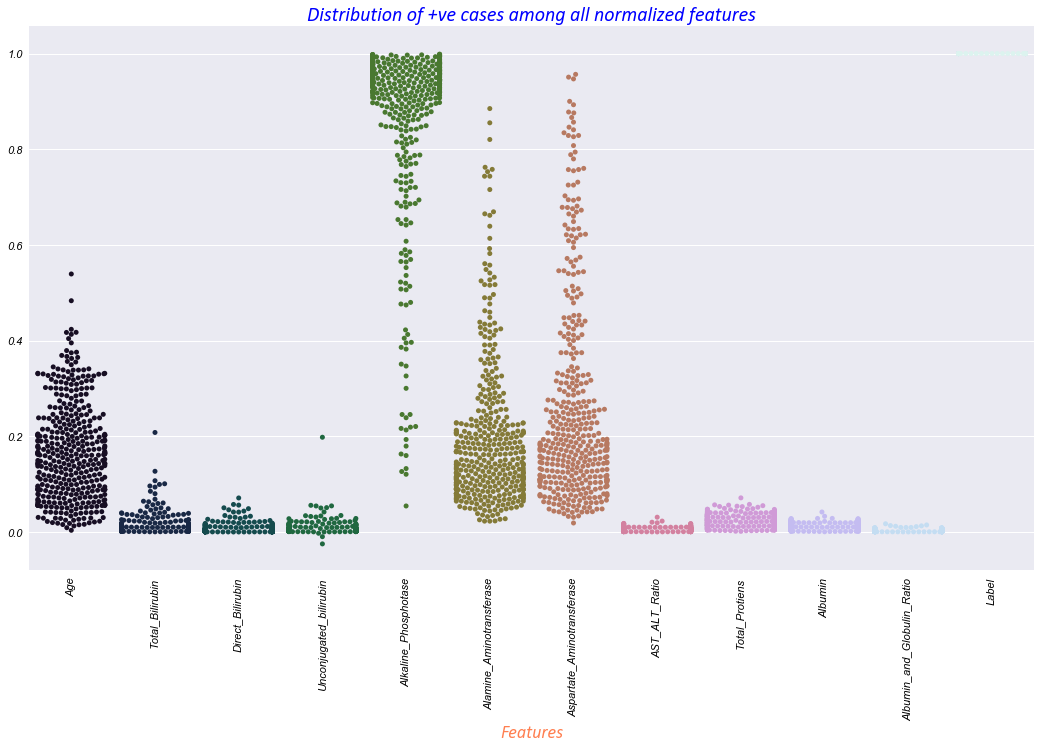

In [99]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(18,10))
    sns.swarmplot(data=normalize_patients_df[normalize_patients_df['Label'] == 1],palette='cubehelix')
    plt.xlabel('Features',fontdict=label_font_dict)
    plt.xticks(rotation=90,color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Distribution of +ve cases among all normalized features',fontdict=title_font_dict)
plt.show()

##### **Well by seeing the above Swarmplots, we can say that data points are widely spread out for both types of patients.**

In [100]:
normalize_patients_df = pd.concat([patients_df['Gender'],normalize_patients_df],axis=1)
# normalize_patients_df = pd.concat([patients_df[['Gender_0','Gender_1']],normalize_patients_df],axis=1)
normalize_patients_df.head()

Gender       Age  Total_Bilirubin  Direct_Bilirubin  \
0  Female  0.325676         0.003507          0.000501   
1    Male  0.087092         0.015311          0.007726   
2    Male  0.123431         0.014533          0.008162   
3    Male  0.300933         0.005189          0.002075   
4    Male  0.330338         0.017893          0.009176   

   Unconjugated_bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0                0.003006              0.936945                  0.080166   
1                0.007585              0.981892                  0.089901   
2                0.006371              0.975503                  0.119449   
3                0.003113              0.944307                  0.072639   
4                0.008717              0.894667                  0.123877   

   Aspartate_Aminotransferase  AST_ALT_Ratio  Total_Protiens   Albumin  \
0                    0.090187       0.005637        0.034071  0.016534   
1                    0.140471       0.002195        0.010535  0.004495   
2                    0.135376       0.002256        0.013936  0.006570   
3                    0.103770       0.007412        0.035282  0.017641   
4                    0.270694       0.010026        0.033493  0.011011   

   Albumin_and_Globulin_Ratio  Label  
0                    0.004509      1  
1                    0.001039      1  
2                    0.001772      1  
3                    0.005189      1  
4                    0.001835      1

### **``Upscaling the negative cases``**

In [101]:
normalize_patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 13 columns):
Gender                        583 non-null object
Age                           583 non-null float64
Total_Bilirubin               583 non-null float64
Direct_Bilirubin              583 non-null float64
Unconjugated_bilirubin        583 non-null float64
Alkaline_Phosphotase          583 non-null float64
Alamine_Aminotransferase      583 non-null float64
Aspartate_Aminotransferase    583 non-null float64
AST_ALT_Ratio                 583 non-null float64
Total_Protiens                583 non-null float64
Albumin                       583 non-null float64
Albumin_and_Globulin_Ratio    583 non-null float64
Label                         583 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 59.3+ KB


In [102]:
class_bifurcation = pd.DataFrame(normalize_patients_df['Label'].value_counts()).reset_index()
class_bifurcation.columns = ['Class_Label','Patients_Count']
class_bifurcation

Class_Label  Patients_Count
0            1             416
1            0             167

In [103]:
normalize_patients_df.head()

Gender       Age  Total_Bilirubin  Direct_Bilirubin  \
0  Female  0.325676         0.003507          0.000501   
1    Male  0.087092         0.015311          0.007726   
2    Male  0.123431         0.014533          0.008162   
3    Male  0.300933         0.005189          0.002075   
4    Male  0.330338         0.017893          0.009176   

   Unconjugated_bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0                0.003006              0.936945                  0.080166   
1                0.007585              0.981892                  0.089901   
2                0.006371              0.975503                  0.119449   
3                0.003113              0.944307                  0.072639   
4                0.008717              0.894667                  0.123877   

   Aspartate_Aminotransferase  AST_ALT_Ratio  Total_Protiens   Albumin  \
0                    0.090187       0.005637        0.034071  0.016534   
1                    0.140471       0.002195        0.010535  0.004495   
2                    0.135376       0.002256        0.013936  0.006570   
3                    0.103770       0.007412        0.035282  0.017641   
4                    0.270694       0.010026        0.033493  0.011011   

   Albumin_and_Globulin_Ratio  Label  
0                    0.004509      1  
1                    0.001039      1  
2                    0.001772      1  
3                    0.005189      1  
4                    0.001835      1

In [104]:
Gender = {'Male':0,'Female':1}
normalize_patients_df['Gender'] = normalize_patients_df['Gender'].map(Gender)

In [105]:
normalize_patients_df.head()

Gender       Age  Total_Bilirubin  Direct_Bilirubin  \
0       1  0.325676         0.003507          0.000501   
1       0  0.087092         0.015311          0.007726   
2       0  0.123431         0.014533          0.008162   
3       0  0.300933         0.005189          0.002075   
4       0  0.330338         0.017893          0.009176   

   Unconjugated_bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0                0.003006              0.936945                  0.080166   
1                0.007585              0.981892                  0.089901   
2                0.006371              0.975503                  0.119449   
3                0.003113              0.944307                  0.072639   
4                0.008717              0.894667                  0.123877   

   Aspartate_Aminotransferase  AST_ALT_Ratio  Total_Protiens   Albumin  \
0                    0.090187       0.005637        0.034071  0.016534   
1                    0.140471       0.002195        0.010535  0.004495   
2                    0.135376       0.002256        0.013936  0.006570   
3                    0.103770       0.007412        0.035282  0.017641   
4                    0.270694       0.010026        0.033493  0.011011   

   Albumin_and_Globulin_Ratio  Label  
0                    0.004509      1  
1                    0.001039      1  
2                    0.001772      1  
3                    0.005189      1  
4                    0.001835      1

In [106]:
pd.DataFrame(normalize_patients_df.groupby(['Label','Gender']).count()['Age'])

Age
Label Gender     
0     0       117
      1        50
1     0       324
      1        92

In [107]:
pd.DataFrame(normalize_patients_df.groupby(['Label']).count()['Age'])

Age
Label     
0      167
1      416

In [108]:
pd.DataFrame(normalize_patients_df.groupby(['Gender']).count()['Age'])

Age
Gender     
0       441
1       142

In [109]:
normalize_patients_df.head()

Gender       Age  Total_Bilirubin  Direct_Bilirubin  \
0       1  0.325676         0.003507          0.000501   
1       0  0.087092         0.015311          0.007726   
2       0  0.123431         0.014533          0.008162   
3       0  0.300933         0.005189          0.002075   
4       0  0.330338         0.017893          0.009176   

   Unconjugated_bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0                0.003006              0.936945                  0.080166   
1                0.007585              0.981892                  0.089901   
2                0.006371              0.975503                  0.119449   
3                0.003113              0.944307                  0.072639   
4                0.008717              0.894667                  0.123877   

   Aspartate_Aminotransferase  AST_ALT_Ratio  Total_Protiens   Albumin  \
0                    0.090187       0.005637        0.034071  0.016534   
1                    0.140471       0.002195        0.010535  0.004495   
2                    0.135376       0.002256        0.013936  0.006570   
3                    0.103770       0.007412        0.035282  0.017641   
4                    0.270694       0.010026        0.033493  0.011011   

   Albumin_and_Globulin_Ratio  Label  
0                    0.004509      1  
1                    0.001039      1  
2                    0.001772      1  
3                    0.005189      1  
4                    0.001835      1

#### **``Validation and Unseen dataset using Stratified split``** 

In [110]:
from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit

In [111]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.20,train_size=0.80,random_state=23)

In [112]:
dataset_X = normalize_patients_df.iloc[:,0:-1]
dataset_y = normalize_patients_df.iloc[:,-1]

In [113]:
val_idx = []
unseen_idx = []

for val , unseen in sss.split(X=dataset_X,y=dataset_y):
    val_idx.append([idx for idx in val])
    unseen_idx.append([idx for idx in unseen])

In [114]:
val_idx = np.array(val_idx).flatten()
unseen_idx = np.array(unseen_idx).flatten()

In [115]:
validate_X = dataset_X.iloc[val_idx]
validate_y = dataset_y.iloc[val_idx]

unseen_X = dataset_X.iloc[unseen_idx]
unseen_y = dataset_y.iloc[unseen_idx]

In [116]:
print(validate_X.shape, validate_y.shape, unseen_X.shape, unseen_y.shape)

(466, 12) (466,) (117, 12) (117,)


In [117]:
validate_df = pd.concat([validate_X,validate_y],axis=1)
validate_df.reset_index(drop=True,inplace=True)
validate_df.head(10)

Gender       Age  Total_Bilirubin  Direct_Bilirubin  \
0       0  0.322834         0.003766          0.001076   
1       0  0.204393         0.003893          0.000973   
2       0  0.297790         0.002882          0.000480   
3       0  0.161733         0.003538          0.001011   
4       1  0.175075         0.004040          0.001347   
5       0  0.325787         0.011277          0.005012   
6       0  0.168485         0.003370          0.000963   
7       0  0.181216         0.004999          0.001250   
8       1  0.248429         0.004969          0.001491   
9       1  0.166305         0.001980          0.000396   

   Unconjugated_bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0                0.002690              0.920077                  0.166798   
1                0.002920              0.963567                  0.141129   
2                0.002402              0.768490                  0.201729   
3                0.002527              0.955235                  0.111191   
4                0.002693              0.956181                  0.080804   
5                0.006265              0.607718                  0.532536   
6                0.002407              0.953146                  0.202182   
7                0.003749              0.974815                  0.074986   
8                0.003478              0.949000                  0.109309   
9                0.001584              0.641463                  0.613746   

   Aspartate_Aminotransferase  AST_ALT_Ratio  Total_Protiens   Albumin  \
0                    0.139895       0.004513        0.037664  0.018832   
1                    0.092464       0.003188        0.032119  0.014600   
2                    0.528337       0.012579        0.023535  0.012488   
3                    0.217328       0.009879        0.037401  0.015668   
4                    0.215477       0.017956        0.038382  0.016161   
5                    0.488681       0.005749        0.040097  0.016916   
6                    0.144416       0.003438        0.032734  0.016367   
7                    0.093732       0.007811        0.042492  0.023121   
8                    0.154026       0.007001        0.038755  0.019874   
9                    0.427642       0.002759        0.032073  0.015839   

   Albumin_and_Globulin_Ratio  Label  
0                    0.005381      0  
1                    0.003893      0  
2                    0.005283      0  
3                    0.003538      0  
4                    0.005050      1  
5                    0.004386      1  
6                    0.004814      1  
7                    0.006874      0  
8                    0.004969      0  
9                    0.003564      1

#### **``Upsampling the minority class``**

In [118]:
validate_df.shape

(466, 13)

In [119]:
pd.DataFrame(validate_df.groupby(['Label','Gender']).count()['Age'])

Age
Label Gender     
0     0        94
      1        39
1     0       259
      1        74

In [120]:
pd.DataFrame(validate_df.groupby(['Label']).count()['Age'])

Age
Label     
0      133
1      333

In [121]:
pd.DataFrame(validate_df.groupby(['Gender']).count()['Age'])

Age
Gender     
0       353
1       113

In [122]:
df_minority = validate_df[(validate_df['Label'] == 0) & (validate_df['Gender'] == 1)]
df_majority = validate_df[((validate_df['Label'] == 0) & (validate_df['Gender'] == 0)) | (validate_df['Label'] == 1)]

In [123]:
df_majority['Label'].value_counts()

1    333
0     94
Name: Label, dtype: int64

In [124]:
df_minority['Label'].value_counts()

0    39
Name: Label, dtype: int64

In [125]:
df_majority['Gender'].value_counts()

0    353
1     74
Name: Gender, dtype: int64

In [126]:
df_minority['Gender'].value_counts()

1    39
Name: Gender, dtype: int64

In [128]:
df_minority_upsampled = resample(df_minority,replace=True,n_samples=69,random_state=123)

df_upsampled = pd.concat([df_majority,df_minority_upsampled],axis=0)
df_upsampled.shape

(496, 13)

In [129]:
df_upsampled.head()

Gender       Age  Total_Bilirubin  Direct_Bilirubin  \
0       0  0.322834         0.003766          0.001076   
1       0  0.204393         0.003893          0.000973   
2       0  0.297790         0.002882          0.000480   
3       0  0.161733         0.003538          0.001011   
4       1  0.175075         0.004040          0.001347   

   Unconjugated_bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0                0.002690              0.920077                  0.166798   
1                0.002920              0.963567                  0.141129   
2                0.002402              0.768490                  0.201729   
3                0.002527              0.955235                  0.111191   
4                0.002693              0.956181                  0.080804   

   Aspartate_Aminotransferase  AST_ALT_Ratio  Total_Protiens   Albumin  \
0                    0.139895       0.004513        0.037664  0.018832   
1                    0.092464       0.003188        0.032119  0.014600   
2                    0.528337       0.012579        0.023535  0.012488   
3                    0.217328       0.009879        0.037401  0.015668   
4                    0.215477       0.017956        0.038382  0.016161   

   Albumin_and_Globulin_Ratio  Label  
0                    0.005381      0  
1                    0.003893      0  
2                    0.005283      0  
3                    0.003538      0  
4                    0.005050      1

In [130]:
pd.DataFrame(df_upsampled.groupby(['Gender']).count()['Age'])

Age
Gender     
0       353
1       143

In [131]:
pd.DataFrame(df_upsampled.groupby(['Label']).count()['Age'])

Age
Label     
0      163
1      333

In [132]:
pd.DataFrame(df_upsampled.groupby(['Label','Gender']).count()['Age'])

Age
Label Gender     
0     0        94
      1        69
1     0       259
      1        74

In [133]:
df_minority_label = df_upsampled[(df_upsampled['Label'] == 0)]
df_majority_label = df_upsampled[(df_upsampled['Label'] == 1)]

In [134]:
df_minority_label['Label'].value_counts()

0    163
Name: Label, dtype: int64

In [135]:
df_majority_label['Label'].value_counts()

1    333
Name: Label, dtype: int64

In [136]:
df_minority_upsampled_label = resample(df_minority_label,replace=True,n_samples=250)

df_upsampled_label = pd.concat([df_majority_label,df_minority_upsampled_label],axis=0)
df_upsampled_label.shape

(583, 13)

In [137]:
pd.DataFrame(df_upsampled_label.groupby(['Gender']).count()['Age'])

Age
Gender     
0       411
1       172

In [138]:
pd.DataFrame(df_upsampled_label.groupby(['Label']).count()['Age'])

Age
Label     
0      250
1      333

In [139]:
pd.DataFrame(df_upsampled_label.groupby(['Label','Gender']).count()['Age'])

Age
Label Gender     
0     0       152
      1        98
1     0       259
      1        74

In [140]:
X = df_upsampled_label.iloc[:,0:-1]
y = df_upsampled_label.iloc[:,-1]

In [141]:
X.reset_index(drop=True,inplace=True)
X.head()

Gender       Age  Total_Bilirubin  Direct_Bilirubin  \
0       1  0.175075         0.004040          0.001347   
1       0  0.325787         0.011277          0.005012   
2       0  0.168485         0.003370          0.000963   
3       1  0.166305         0.001980          0.000396   
4       0  0.159192         0.063179          0.041788   

   Unconjugated_bilirubin  Alkaline_Phosphotase  Alamine_Aminotransferase  \
0                0.002693              0.956181                  0.080804   
1                0.006265              0.607718                  0.532536   
2                0.002407              0.953146                  0.202182   
3                0.001584              0.641463                  0.613746   
4                0.021391              0.945205                  0.139293   

   Aspartate_Aminotransferase  AST_ALT_Ratio  Total_Protiens   Albumin  \
0                    0.215477       0.017956        0.038382  0.016161   
1                    0.488681       0.005749        0.040097  0.016916   
2                    0.144416       0.003438        0.032734  0.016367   
3                    0.427642       0.002759        0.032073  0.015839   
4                    0.233814       0.008350        0.026864  0.012934   

   Albumin_and_Globulin_Ratio  
0                    0.005050  
1                    0.004386  
2                    0.004814  
3                    0.003564  
4                    0.004477

In [142]:
X.shape

(583, 12)

In [143]:
pd.DataFrame(X['Gender'].value_counts())

Gender
0     411
1     172

In [144]:
y.shape

(583,)

In [145]:
y.reset_index(drop=True,inplace=True)

#### **``Removing the Outliers``**

In [146]:
def val_iqr_limits(df_name,col_name,w_width=None):
    """
    Description: This function is created for calculating the upper and lower limits using Tuky's IQR method.
    
    Input parameters: It accepts below two input parameters:
        1. df_name: DataFrame
        2. col_name: Feature name
        3. w_width: Whisker width provided by user and by default 1.5 
        
    Return: It returns the median, upper and lower limits of the feature based on Tuky's IQR method.
    """
    if w_width == None:
        w_width = 1.5
    else:
        w_width = w_width
        
    val_median = df_name[col_name].median()
    q1 = df_name[col_name].quantile(0.25)
    q3 = df_name[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - (w_width*iqr)
    upper_limit = q3 + (w_width*iqr)
#     print(val_median,q1,q3,iqr,lower_limit,upper_limit)     ## Uncomment if you want to see the values of median, q1, q2, iqr, lower and upper limit 
    return val_median, upper_limit, lower_limit

def fix_outliers(df_name,col_name,whis_width=None):
    """
    Description: This function is created for applyng the Tuky's IQR method on variable.
    
    Input parameters: It accepts the below two parameters:
        1. df_name: DataFrame
        2. col_name: Feature name
        3. whis_width: Whisker width provided by user and by default 1.5 
    
    Return: It returns the modified feature with the removed outliers.
    """
    print("######## Applied Tuky IQR Method-I ########")
    v_median, upr_limit , low_limit = val_iqr_limits(df_name,col_name,whis_width)
    df_name[col_name] = df_name[col_name].apply(lambda val: low_limit + (val-upr_limit) if val > upr_limit 
                                                else upr_limit - (low_limit-val) if val < low_limit else val)
    
    print("######## Applied Tuky IQR Method-II ########\n")
    v1_median, upr_limit1, low_limit1 = val_iqr_limits(df_name,col_name,whis_width)
    
#     df_name[col_name] = df_name[col_name].apply(lambda val: upr_limit1 if val > upr_limit1 
#                                                 else low_limit1 if val < low_limit1 else val)
    df_name[col_name] = df_name[col_name].apply(lambda val: low_limit1 + (val-upr_limit1) if val > upr_limit1 
                                                else upr_limit1 - (low_limit1-val) if val < low_limit1 else val)

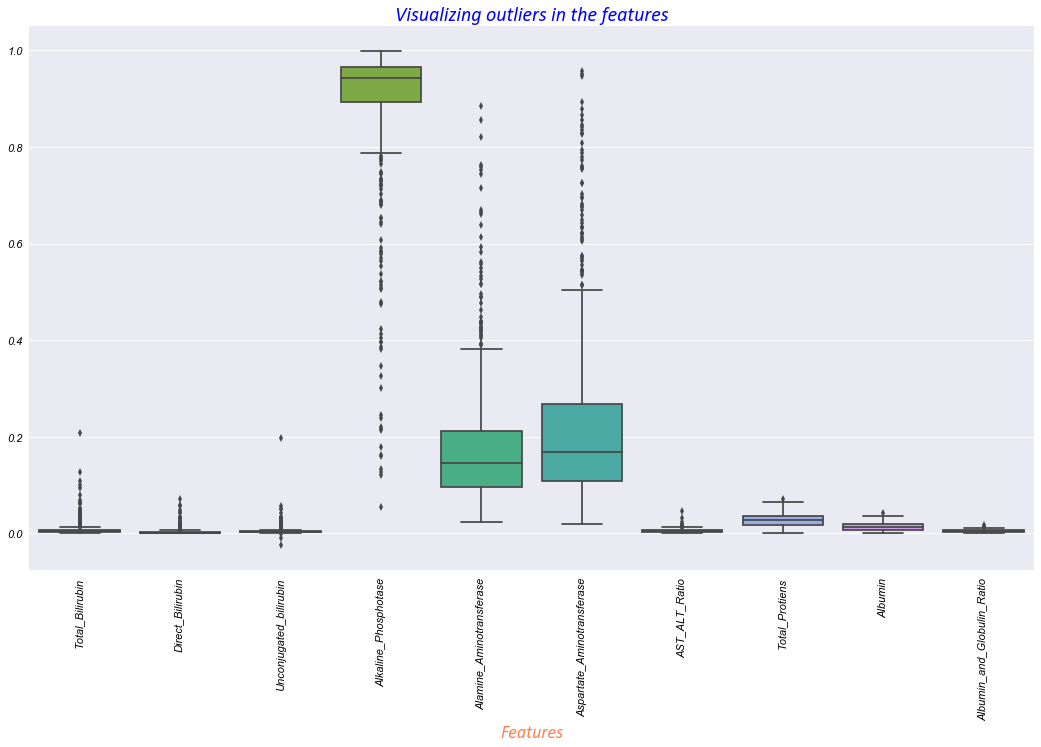

In [147]:
with plt.style.context('seaborn'): 
    plt.figure(figsize=(18,10))
    sns.boxplot(data=X.iloc[:,2:])
    plt.xlabel('Features',fontdict=label_font_dict)
    plt.xticks(rotation=90,color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Visualizing outliers in the features',fontdict=title_font_dict)
plt.show()

In [148]:
for col in X.iloc[:,2:].columns:
    fix_outliers(df_name = X,col_name=col,whis_width=1.5)

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########

######## Applied Tuky IQR Method-I ########
######## Applied Tuky IQR Method-II ########



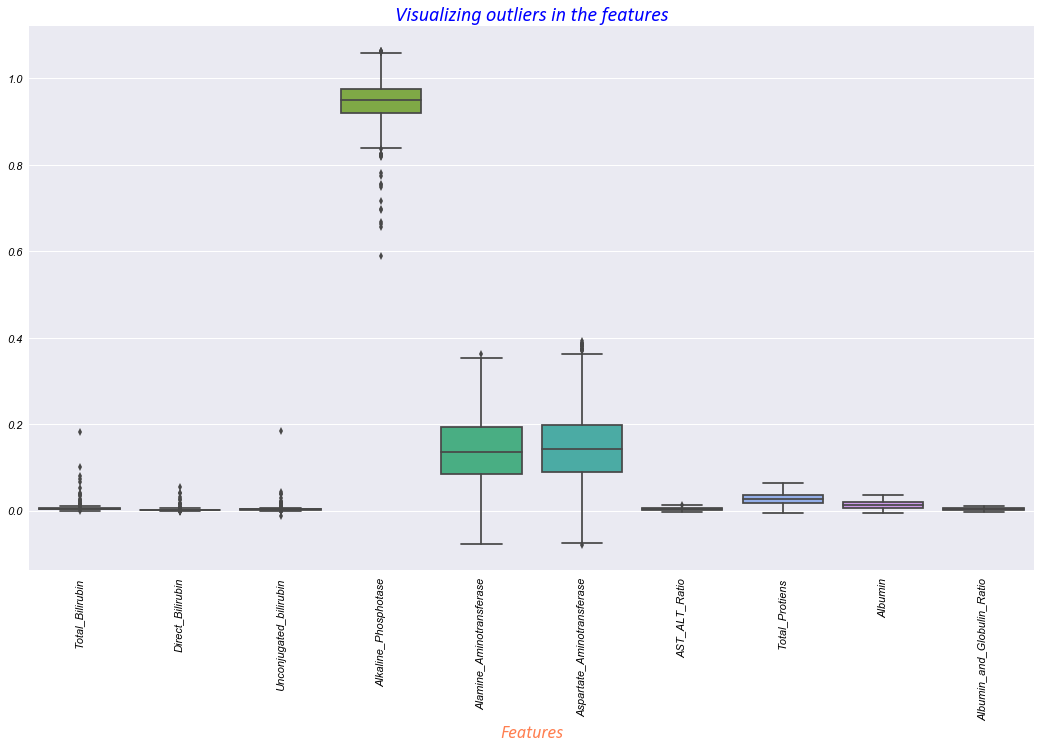

In [149]:
with plt.style.context('seaborn'): 
    plt.figure(figsize=(18,10))
    sns.boxplot(data=X.iloc[:,2:])
    plt.xlabel('Features',fontdict=label_font_dict)
    plt.xticks(rotation=90,color='black',size=11,style='oblique')
    plt.yticks(rotation=0,color='black',size=11,style='oblique')
    plt.title('Visualizing outliers in the features',fontdict=title_font_dict)
plt.show()

##### **Suppressed the outliers and now removing the unwanted features.**

In [150]:
bkp_X = X.copy(deep=True)
bkp_y = y.copy(deep=True)

In [151]:
X.shape, y.shape, bkp_X.shape, bkp_y.shape

((583, 12), (583,), (583, 12), (583,))

X = bkp_X.copy(deep=True)
y = bkp_y.copy(deep=True)

X.drop(['Total_Bilirubin'],inplace=True,axis=1)

In [152]:
X.drop(['Unconjugated_bilirubin'],inplace=True,axis=1)

In [153]:
X.drop(['Alamine_Aminotransferase'],inplace=True,axis=1)  ## Between ALT and AST will drop one column based upon the results

X.drop(['Alkaline_Phosphotase'],inplace=True,axis=1)

In [154]:
X.drop(['Albumin'],inplace=True,axis=1)

In [155]:
X.drop(['Aspartate_Aminotransferase'],inplace=True,axis=1)

In [156]:
X.head()

Gender       Age  Total_Bilirubin  Direct_Bilirubin  Alkaline_Phosphotase  \
0       1  0.175075         0.004040          0.001347              0.956181   
1       0  0.325787        -0.000823          0.005012              0.895378   
2       0  0.168485         0.003370          0.000963              0.953146   
3       1  0.166305         0.001980          0.000396              0.929123   
4       0  0.159192         0.036499          0.025210              0.945205   

   AST_ALT_Ratio  Total_Protiens  Albumin_and_Globulin_Ratio  
0       0.001839        0.038382                    0.005050  
1       0.005749        0.040097                    0.004386  
2       0.003438        0.032734                    0.004814  
3       0.002759        0.032073                    0.003564  
4       0.008350        0.026864                    0.004477

In [157]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Label, dtype: int64

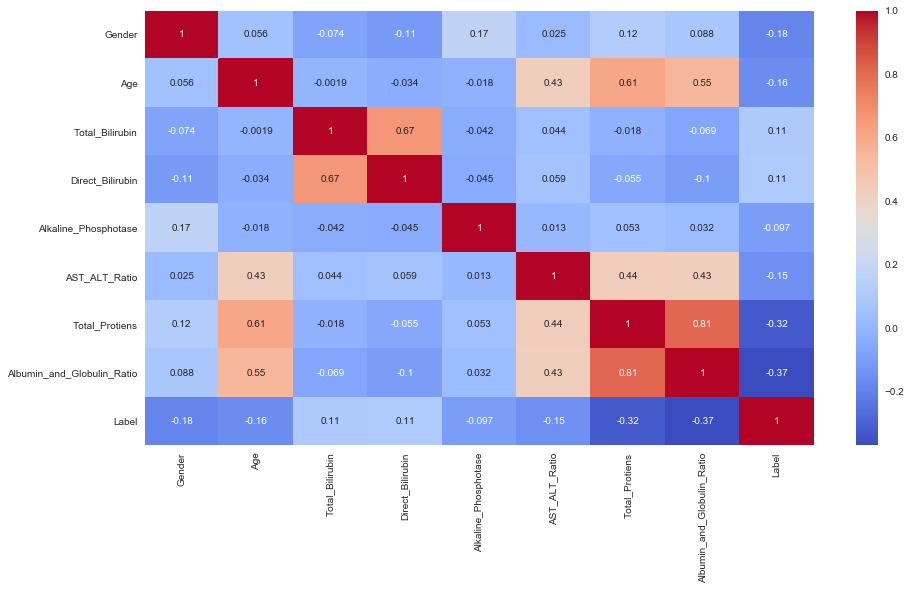

In [158]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(15,8))
    sns.heatmap(pd.concat([X,pd.DataFrame(y)],axis=1).corr(),annot=True,cmap='coolwarm')

X.drop(['ALT_LOG','AST_LOG'],inplace=True,axis=1)

X.drop(['Total_Protiens'],inplace=True,axis=1)

X.drop(['AST_ALT_Ratio'],inplace=True,axis=1)

### **``M.1 -- Model Cross-Validation and Hyper-parameterization``**

In [159]:
X.shape, y.shape

((583, 8), (583,))

In [160]:
np.bincount(y)

array([250, 333], dtype=int64)

In [225]:
from sklearn.ensemble import RandomForestClassifier

In [226]:
from sklearn.model_selection import StratifiedKFold, GroupShuffleSplit, cross_val_score, cross_validate, GridSearchCV, ShuffleSplit, StratifiedShuffleSplit

In [227]:
ss = StratifiedShuffleSplit(n_splits=1,test_size=0.15,train_size=0.85,random_state=31)

ss = ShuffleSplit(n_splits=1,test_size=0.15,random_state=31)

In [228]:
train_idx = []
test_idx = []

for train , test in ss.split(X=X,y=y):
    train_idx.append([idx for idx in train])
    test_idx.append([idx for idx in test])

In [229]:
train_idx = np.array(train_idx).flatten()
test_idx = np.array(test_idx).flatten()

In [230]:
X_train = X.iloc[train_idx]
y_train = y.iloc[train_idx]

X_test = X.iloc[test_idx]
y_test = y.iloc[test_idx]

In [231]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(495, 8) (88, 8) (495,) (88,)


In [232]:
skf = StratifiedKFold(n_splits=5,shuffle=True)

In [233]:
rf_classifier = RandomForestClassifier(n_estimators=35,criterion='gini')

In [234]:
cross_val_results = cross_val_score(rf_classifier,X=X_train,y=y_train,scoring='f1',cv=skf,n_jobs=-1)

In [235]:
cross_val_results

array([0.85217391, 0.81415929, 0.81904762, 0.88288288, 0.87179487])

In [236]:
cross_val_results.mean()

0.8480117157608499

In [237]:
cross_val_score(rf_classifier,X=X_train,y=y_train,scoring='recall',cv=skf,n_jobs=-1)

array([0.80701754, 0.71929825, 0.89473684, 0.83928571, 0.83928571])

In [238]:
cross_val_score(rf_classifier,X=X_train,y=y_train,scoring='recall',cv=skf,n_jobs=-1).mean()

0.812844611528822

In [239]:
cross_val_score(rf_classifier,X=X_train,y=y_train,scoring='precision',cv=skf,n_jobs=-1)

array([0.84482759, 0.92307692, 0.87755102, 0.87272727, 0.87272727])

In [240]:
cross_val_score(rf_classifier,X=X_train,y=y_train,scoring='precision',cv=skf,n_jobs=-1).mean()

0.88004854904557

#### **``M.1.1 -- Multiple Metric Cross-Validation``**
#### **``1. Random Forest``**

In [241]:
cross_validation_results = cross_validate(rf_classifier,X=X_train,y=y_train,cv=skf,n_jobs=-1,scoring=['f1','roc_auc','recall','precision'])

In [242]:
pd.DataFrame(cross_validation_results)

fit_time  score_time   test_f1  test_precision  test_recall  test_roc_auc
0  0.257841    0.055966  0.884956        0.892857     0.877193      0.929616
1  0.253844    0.077952  0.839286        0.854545     0.824561      0.907059
2  0.273832    0.057964  0.837607        0.816667     0.859649      0.884085
3  0.261840    0.063961  0.865385        0.937500     0.803571      0.956811
4  0.177899    0.036010  0.886957        0.864407     0.910714      0.922550

In [243]:
cross_validation_results_df = pd.DataFrame(cross_validation_results)
cross_validation_results_df.reset_index(inplace=True)
cross_validation_results_df.columns = ['Splits','Fit_Time','Score_Time','F1_Test_Score','Precision_Test_Score','Recall_Test_Score','ROC_AUC_Test_Score']
cross_validation_results_df

Splits  Fit_Time  Score_Time  F1_Test_Score  Precision_Test_Score  \
0       0  0.257841    0.055966       0.884956              0.892857   
1       1  0.253844    0.077952       0.839286              0.854545   
2       2  0.273832    0.057964       0.837607              0.816667   
3       3  0.261840    0.063961       0.865385              0.937500   
4       4  0.177899    0.036010       0.886957              0.864407   

   Recall_Test_Score  ROC_AUC_Test_Score  
0           0.877193            0.929616  
1           0.824561            0.907059  
2           0.859649            0.884085  
3           0.803571            0.956811  
4           0.910714            0.922550

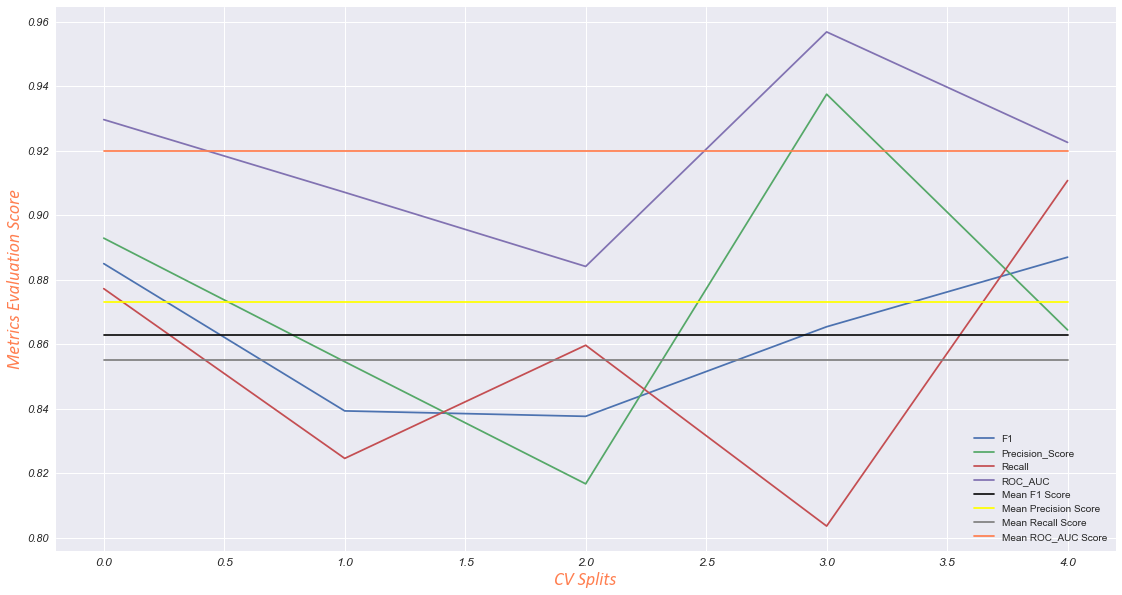

In [244]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,10))
    sns.lineplot(x='Splits',y='F1_Test_Score',data=cross_validation_results_df,label='F1_Score')
    sns.lineplot(x='Splits',y='Precision_Test_Score',data=cross_validation_results_df,label='Precision_Score')
    sns.lineplot(x='Splits',y='Recall_Test_Score',data=cross_validation_results_df,label='Recall_Score')
    sns.lineplot(x='Splits',y='ROC_AUC_Test_Score',data=cross_validation_results_df,label='ROC_AUC_Score')
    sns.lineplot(x='Splits',y=np.mean(cross_validation_results_df['F1_Test_Score']),data=cross_validation_results_df,label='Mean F1 Score',color='k')
    sns.lineplot(x='Splits',y=np.mean(cross_validation_results_df['Precision_Test_Score']),data=cross_validation_results_df,label='Mean Precision Score',color='yellow')  
    sns.lineplot(x='Splits',y=np.mean(cross_validation_results_df['Recall_Test_Score']),data=cross_validation_results_df,label='Mean Recall Score',color='gray')  
    sns.lineplot(x='Splits',y=np.mean(cross_validation_results_df['ROC_AUC_Test_Score']),data=cross_validation_results_df,label='Mean ROC_AUC Score',color='coral')    
    plt.xlabel('CV Splits',fontdict=label_font_dict)
    plt.ylabel('Metrics Evaluation Score',fontdict=label_font_dict)
    plt.legend(labels=['F1','Precision_Score','Recall','ROC_AUC','Mean F1 Score','Mean Precision Score','Mean Recall Score','Mean ROC_AUC Score'],loc='lower right')
    plt.xticks(style='oblique',size=12)
    plt.yticks(style='oblique',size=11)
plt.show()

#### **``2. Logistic Regression``**

In [245]:
from sklearn.linear_model import LogisticRegression

In [246]:
log_reg = LogisticRegression()

In [247]:
log_reg_cross_val_results = cross_val_score(log_reg,X=X_train,y=y_train,scoring='f1',cv=skf,n_jobs=-1)

In [248]:
log_reg_cross_val_results

array([0.71544715, 0.68217054, 0.77272727, 0.68333333, 0.6875    ])

##### **Logistic Regression seems to be not so good for this dataset.**

In [249]:
log_reg_cross_validate = cross_validate(log_reg,X=X_train,y=y_train,scoring=['f1','recall','precision'],cv=skf,n_jobs=-1)

In [250]:
pd.DataFrame(log_reg_cross_validate)

fit_time  score_time   test_f1  test_precision  test_recall
0  0.016991    0.020987  0.755906        0.685714     0.842105
1  0.018988    0.014991  0.692913        0.628571     0.771930
2  0.018989    0.013991  0.688525        0.646154     0.736842
3  0.019986    0.019990  0.730159        0.657143     0.821429
4  0.016989    0.016992  0.687023        0.600000     0.803571

#### **``3. Naive Bayes``**

In [251]:
from sklearn.naive_bayes import GaussianNB

In [252]:
gnb = GaussianNB()

In [253]:
gnb_cv_results = cross_val_score(estimator=gnb,X=X_train,y=y_train,scoring='f1',cv=skf,n_jobs=-1)

In [254]:
gnb_cv_results

array([0.59259259, 0.57142857, 0.62921348, 0.65957447, 0.69473684])

In [255]:
gnb_recall_cv_results = cross_val_score(estimator=gnb,X=X_train,y=y_train,scoring='recall',cv=skf,n_jobs=-1)

In [256]:
gnb_recall_cv_results

array([0.45614035, 0.47368421, 0.54385965, 0.5       , 0.53571429])

##### **Naive Bayes seems to be not so good for this dataset.**

#### **``4. Gradient Boosting``**

In [257]:
from sklearn.ensemble import GradientBoostingClassifier

In [258]:
gbc = GradientBoostingClassifier(n_estimators=25,max_depth=16)

In [259]:
gbc_cv_results = cross_val_score(estimator=gbc,X=X_train,y=y_train,scoring='f1',cv=skf,n_jobs=-1)

In [260]:
gbc_cv_results.mean()

0.8025448442924171

In [261]:
gbc_metrics_cv_results = cross_validate(estimator=gbc,X=X_train,y=y_train,scoring=['f1','recall','precision'],cv=skf,n_jobs=-1)

In [262]:
gbc_metrics_cv_results_df = pd.DataFrame(gbc_metrics_cv_results).reset_index()
gbc_metrics_cv_results_df.columns = ['Splits','Fit_time','Score_time','F1_Score','Precision_Score','Recall_Score']
gbc_metrics_cv_results_df

Splits  Fit_time  Score_time  F1_Score  Precision_Score  Recall_Score
0       0  0.467713    0.015989  0.851852         0.901961      0.807018
1       1  0.440728    0.015990  0.819048         0.895833      0.754386
2       2  0.450723    0.015990  0.859649         0.859649      0.859649
3       3  0.433734    0.016989  0.815534         0.893617      0.750000
4       4  0.251385    0.008994  0.680851         0.842105      0.571429

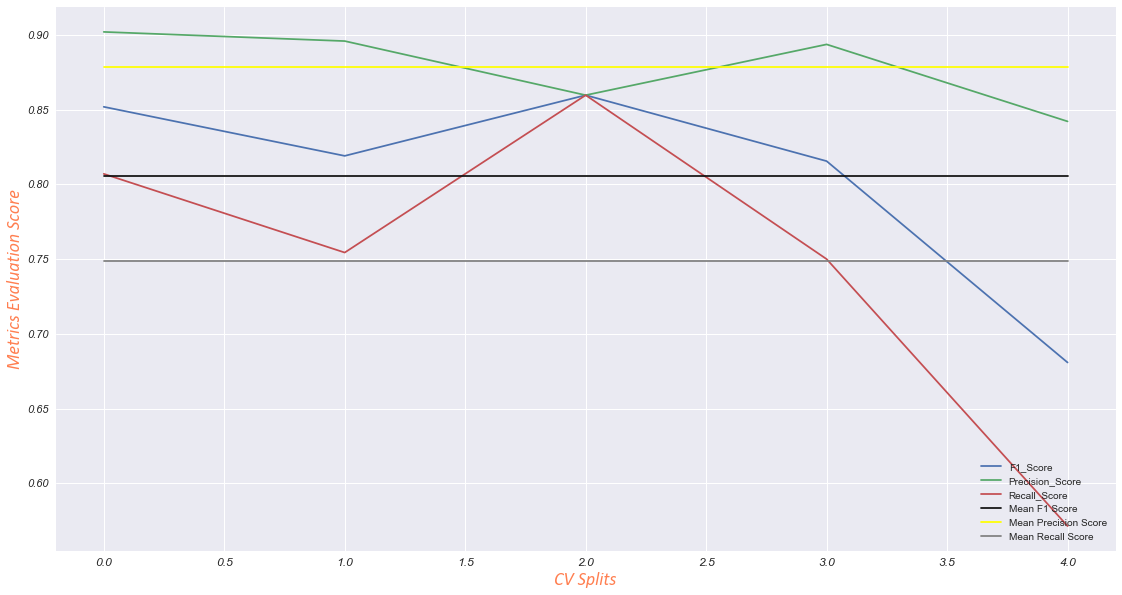

In [263]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,10))
    sns.lineplot(x='Splits',y='F1_Score',data=gbc_metrics_cv_results_df,label='F1_Score')
    sns.lineplot(x='Splits',y='Precision_Score',data=gbc_metrics_cv_results_df,label='Precision_Score')
    sns.lineplot(x='Splits',y='Recall_Score',data=gbc_metrics_cv_results_df,label='Recall_Score')
    sns.lineplot(x='Splits',y=np.mean(gbc_metrics_cv_results_df['F1_Score']),data=gbc_metrics_cv_results_df,label='Mean F1 Score',color='k')
    sns.lineplot(x='Splits',y=np.mean(gbc_metrics_cv_results_df['Precision_Score']),data=gbc_metrics_cv_results_df,label='Mean Precision Score',color='yellow')  
    sns.lineplot(x='Splits',y=np.mean(gbc_metrics_cv_results_df['Recall_Score']),data=gbc_metrics_cv_results_df,label='Mean Recall Score',color='gray')   
    plt.xlabel('CV Splits',fontdict=label_font_dict)
    plt.ylabel('Metrics Evaluation Score',fontdict=label_font_dict)
    plt.legend(labels=['F1_Score','Precision_Score','Recall_Score','Mean F1 Score','Mean Precision Score','Mean Recall Score'],loc='lower right')
    plt.xticks(style='oblique',size=12)
    plt.yticks(style='oblique',size=11)
plt.show()

#### **``5. Bagging Classifier``**

In [264]:
from sklearn.ensemble import BaggingClassifier

In [265]:
bagg_clas = BaggingClassifier(n_estimators=25)

In [266]:
bagg_class_cv_results = cross_val_score(estimator=bagg_clas,X=X_train,y=y_train,cv=skf,scoring='f1',n_jobs=-1)

In [267]:
bagg_class_cv_results

array([0.8173913 , 0.85185185, 0.83636364, 0.79245283, 0.86238532])

In [268]:
np.mean(bagg_class_cv_results)

0.8320889887705821

In [269]:
bagg_class_metric_cv_results = cross_validate(estimator=bagg_clas,X=X_train,y=y_train,cv=skf,scoring=['f1','recall','precision'],n_jobs=-1)

In [270]:
bagg_class_metric_cv_results_df = pd.DataFrame(bagg_class_metric_cv_results).reset_index()
bagg_class_metric_cv_results_df.columns = ['Splits','Fit_time','Score_time','F1_Score','Precision_Score','Recall_Score']
bagg_class_metric_cv_results_df

Splits  Fit_time  Score_time  F1_Score  Precision_Score  Recall_Score
0       0  0.246359    0.023986  0.768000         0.705882      0.842105
1       1  0.245360    0.022986  0.844037         0.884615      0.807018
2       2  0.268835    0.023985  0.826923         0.914894      0.754386
3       3  0.243851    0.028981  0.857143         0.857143      0.857143
4       4  0.173893    0.019044  0.849057         0.900000      0.803571

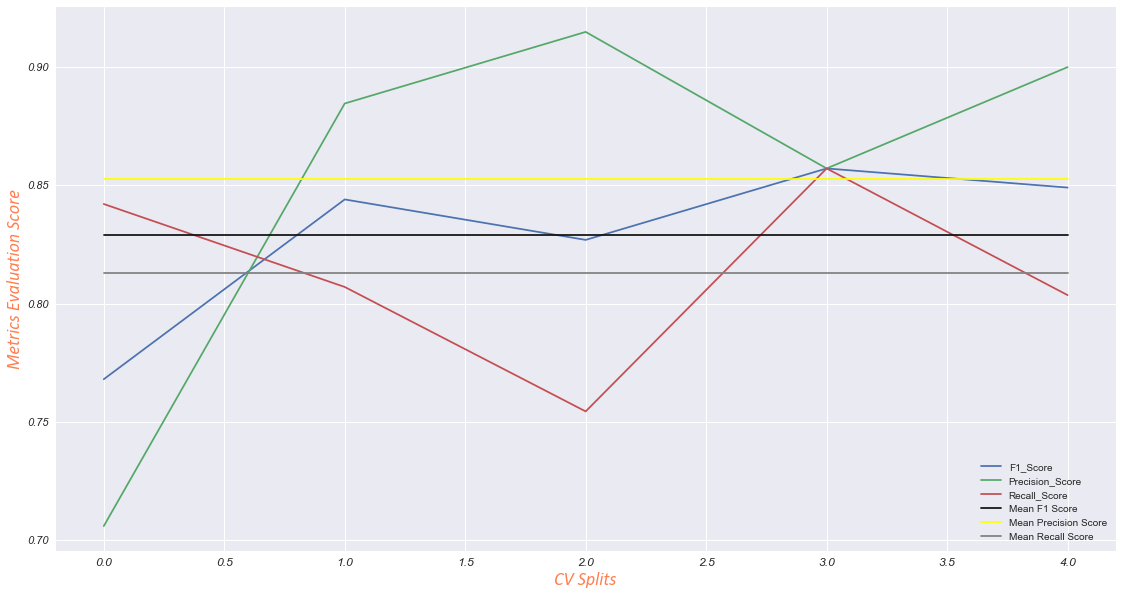

In [271]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,10))
    sns.lineplot(x='Splits',y='F1_Score',data=bagg_class_metric_cv_results_df,label='F1_Score')
    sns.lineplot(x='Splits',y='Precision_Score',data=bagg_class_metric_cv_results_df,label='Precision_Score')
    sns.lineplot(x='Splits',y='Recall_Score',data=bagg_class_metric_cv_results_df,label='Recall_Score')
    sns.lineplot(x='Splits',y=np.mean(bagg_class_metric_cv_results_df['F1_Score']),data=bagg_class_metric_cv_results_df,label='Mean F1 Score',color='k')
    sns.lineplot(x='Splits',y=np.mean(bagg_class_metric_cv_results_df['Precision_Score']),data=bagg_class_metric_cv_results_df,label='Mean Precision Score',color='yellow')  
    sns.lineplot(x='Splits',y=np.mean(bagg_class_metric_cv_results_df['Recall_Score']),data=bagg_class_metric_cv_results_df,label='Mean Recall Score',color='gray')   
    plt.xlabel('CV Splits',fontdict=label_font_dict)
    plt.ylabel('Metrics Evaluation Score',fontdict=label_font_dict)
    plt.legend(labels=['F1_Score','Precision_Score','Recall_Score','Mean F1 Score','Mean Precision Score','Mean Recall Score'],loc='lower right')
    plt.xticks(style='oblique',size=12)
    plt.yticks(style='oblique',size=11)
plt.show()

#### **``6. XG Boost``**

In [272]:
import xgboost

In [273]:
xgbc = xgboost.XGBClassifier()

In [274]:
xgbc_cv_results = cross_val_score(estimator=xgbc,X=X_train,y=y_train,cv=skf,n_jobs=-1,scoring='f1')

In [275]:
xgbc_cv_results

array([0.8411215 , 0.81818182, 0.87037037, 0.80769231, 0.77477477])

In [276]:
xgbc_cv_results.mean()

0.8224281532692748

In [277]:
xgbc_metrics_cv_results = cross_validate(estimator=xgbc,X=X_train,y=y_train,cv=skf,n_jobs=-1,scoring=['f1','precision','recall'])
xgbc_metrics_cv_results

{'fit_time': array([0.1828866 , 0.18988419, 0.19787908, 0.21586728, 0.14491105]),
 'score_time': array([0.01599121, 0.03297853, 0.02398396, 0.01998854, 0.01299119]),
 'test_f1': array([0.83636364, 0.82692308, 0.85217391, 0.82882883, 0.8173913 ]),
 'test_precision': array([0.86792453, 0.91489362, 0.84482759, 0.83636364, 0.79661017]),
 'test_recall': array([0.80701754, 0.75438596, 0.85964912, 0.82142857, 0.83928571])}

In [278]:
xgbc_metrics_cv_results_df = pd.DataFrame(xgbc_metrics_cv_results).reset_index()
xgbc_metrics_cv_results_df

index  fit_time  score_time   test_f1  test_precision  test_recall
0      0  0.182887    0.015991  0.836364        0.867925     0.807018
1      1  0.189884    0.032979  0.826923        0.914894     0.754386
2      2  0.197879    0.023984  0.852174        0.844828     0.859649
3      3  0.215867    0.019989  0.828829        0.836364     0.821429
4      4  0.144911    0.012991  0.817391        0.796610     0.839286

In [279]:
xgbc_metrics_cv_results_df.columns = ['Splits','Fit_time','Score_time','F1_Score','Precision_Score','Recall_Score']
xgbc_metrics_cv_results_df

Splits  Fit_time  Score_time  F1_Score  Precision_Score  Recall_Score
0       0  0.182887    0.015991  0.836364         0.867925      0.807018
1       1  0.189884    0.032979  0.826923         0.914894      0.754386
2       2  0.197879    0.023984  0.852174         0.844828      0.859649
3       3  0.215867    0.019989  0.828829         0.836364      0.821429
4       4  0.144911    0.012991  0.817391         0.796610      0.839286

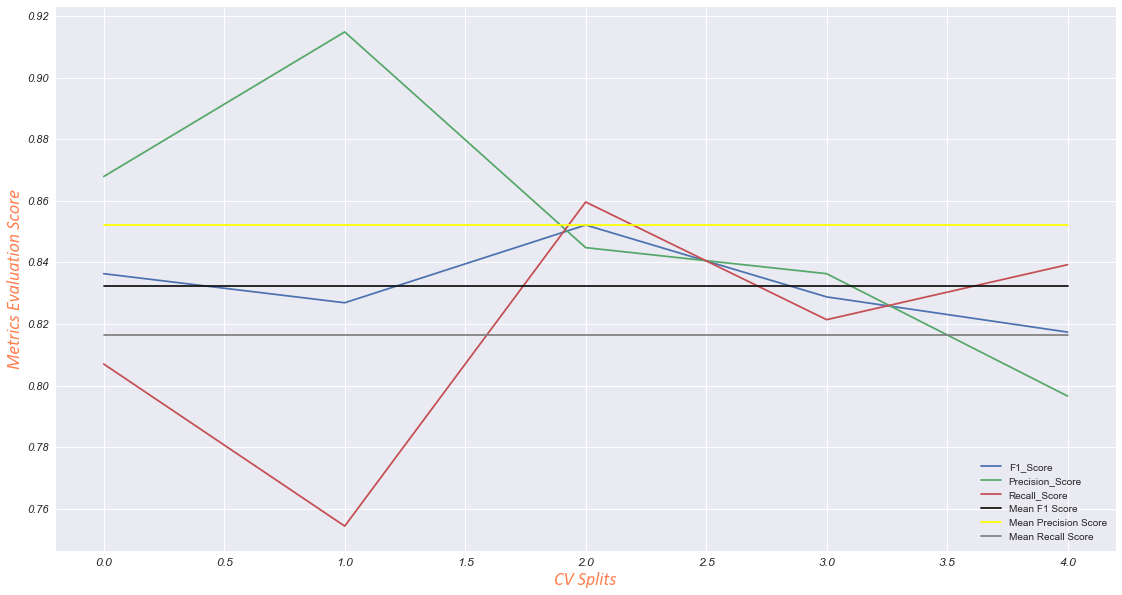

In [280]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(19,10))
    sns.lineplot(x='Splits',y='F1_Score',data=xgbc_metrics_cv_results_df,label='F1_Score')
    sns.lineplot(x='Splits',y='Precision_Score',data=xgbc_metrics_cv_results_df,label='Precision_Score')
    sns.lineplot(x='Splits',y='Recall_Score',data=xgbc_metrics_cv_results_df,label='Recall_Score')
    sns.lineplot(x='Splits',y=np.mean(xgbc_metrics_cv_results_df['F1_Score']),data=xgbc_metrics_cv_results_df,label='Mean F1 Score',color='k')
    sns.lineplot(x='Splits',y=np.mean(xgbc_metrics_cv_results_df['Precision_Score']),data=xgbc_metrics_cv_results_df,label='Mean Precision Score',color='yellow')  
    sns.lineplot(x='Splits',y=np.mean(xgbc_metrics_cv_results_df['Recall_Score']),data=xgbc_metrics_cv_results_df,label='Mean Recall Score',color='gray')   
    plt.xlabel('CV Splits',fontdict=label_font_dict)
    plt.ylabel('Metrics Evaluation Score',fontdict=label_font_dict)
    plt.legend(labels=['F1_Score','Precision_Score','Recall_Score','Mean F1 Score','Mean Precision Score','Mean Recall Score'],loc='lower right')
    plt.xticks(style='oblique',size=12)
    plt.yticks(style='oblique',size=11)
plt.show()

#### **``M.1.2 -- Finding Best Model Parameters``**

In [281]:
hp_rf_model = RandomForestClassifier()

In [282]:
estimators = [15,20,25,30,35]
max_depth = [2,4,8,16,32]
min_samples_split = [1,2,3,4,5]
min_samples_leaf = [1,2,3,4]
max_features = ['auto','sqrt','log2']

In [283]:
param_grid = dict(n_estimators=estimators, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, max_features=max_features)

In [284]:
grid = GridSearchCV(hp_rf_model,param_grid=param_grid,scoring=['precision','recall'],cv=skf,n_jobs=-1,refit=False)

In [285]:
grid.fit(X_train,y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              m...
                                              oob_score=False,
                                              random_state=None, verbose=0,
     

In [286]:
pd.set_option('display.max_columns',100)

In [289]:
pd.DataFrame(grid.cv_results_).sort_values(['rank_test_recall']).head(20)

mean_fit_time  mean_score_time  mean_test_precision  mean_test_recall  \
1313       0.190811         0.031218             0.867038          0.873120   
960        0.105799         0.015407             0.834532          0.869674   
1394       0.207401         0.031395             0.844908          0.866228   
949        0.210808         0.026789             0.844035          0.866165   
1009       0.218988         0.028609             0.855484          0.866103   
1007       0.171200         0.026398             0.863238          0.866040   
1017       0.163198         0.020795             0.871032          0.862719   
1217       0.169666         0.021202             0.865774          0.862657   
623        0.192473         0.023511             0.831634          0.862594   
724        0.222492         0.030313             0.845432          0.862594   
1409       0.239406         0.023900             0.855634          0.859211   
918        0.189794         0.024192             0.860938          0.859211   
1224       0.216395         0.025799             0.837376          0.859148   
957        0.166184         0.021794             0.812353          0.859148   
1319       0.221205         0.029604             0.869293          0.859148   
1442       0.166383         0.028396             0.842084          0.859148   
1024       0.223595         0.023593             0.850218          0.859148   
1133       0.206599         0.027797             0.843764          0.859148   
1395       0.101388         0.020609             0.800898          0.859085   
1062       0.164188         0.028190             0.806216          0.859085   

     param_max_depth param_max_features param_min_samples_leaf  \
1313              32               sqrt                      1   
960               16               auto                      3   
1394              32               sqrt                      4   
949               16               auto                      2   
1009              16               sqrt                      1   
1007              16               sqrt                      1   
1017              16               sqrt                      1   
1217              32               auto                      1   
623                8               auto                      1   
724                8               sqrt                      1   
1409              32               log2                      1   
918               16               auto                      1   
1224              32               auto                      1   
957               16               auto                      3   
1319              32               sqrt                      1   
1442              32               log2                      2   
1024              16               sqrt                      1   
1133              16               log2                      2   
1395              32               sqrt                      4   
1062              16               sqrt                      3   

     param_min_samples_split param_n_estimators  \
1313                       3                 30   
960                        3                 15   
1394                       4                 35   
949                        5                 35   
1009                       2                 35   
1007                       2                 25   
1017                       4                 25   
1217                       4                 25   
623                        5                 30   
724                        5                 35   
1409                       2                 35   
918                        4                 30   
1224                       5                 35   
957                        2                 25   
1319                       4                 35   
1442                       4                 25   
1024                       5                 35   
1133                       2             

#### **``Model-1 :: RandomForest``**

In [290]:
model_rfc = RandomForestClassifier(n_estimators=30,max_depth=16,min_samples_split=4,min_samples_leaf=1,max_features='auto')

In [291]:
upsample_rfc = model_rfc.fit(X_train,y_train)

In [292]:
upsample_rfc_pred = model_rfc.predict(X_test)

##### **``Feature_Importance``**

In [293]:
pd.concat([pd.DataFrame(X_test.columns), pd.DataFrame(model_rfc.feature_importances_)],axis=1)

0         0
0                      Gender  0.026775
1                         Age  0.123106
2             Total_Bilirubin  0.130898
3            Direct_Bilirubin  0.150951
4        Alkaline_Phosphotase  0.120744
5               AST_ALT_Ratio  0.125424
6              Total_Protiens  0.149836
7  Albumin_and_Globulin_Ratio  0.172267

In [294]:
metrics.accuracy_score(y_test,upsample_rfc_pred)

0.8522727272727273

In [295]:
metrics.precision_score(y_test,upsample_rfc_pred)

0.9302325581395349

In [296]:
metrics.recall_score(y_test,upsample_rfc_pred)

0.8

#### **``Confusion_Matrix``**

c:\users\rajsh\appdata\local\programs\python\python35\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


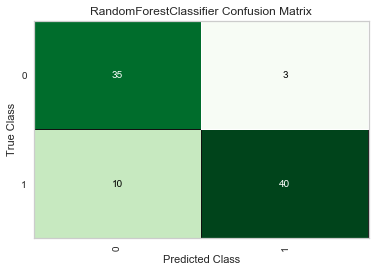

In [297]:
from yellowbrick.classifier import confusion_matrix as conf_matrix

visualizer = conf_matrix(model_rfc, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, cmap="Greens")

In [298]:
np.unique(y_test,return_counts=True)

(array([0, 1], dtype=int64), array([38, 50], dtype=int64))

In [299]:
unique, counts = np.unique(upsample_rfc_pred,return_counts=True)
unique, counts

(array([0, 1], dtype=int64), array([45, 43], dtype=int64))

#### **``Precision_Recall Curve``**

c:\users\rajsh\appdata\local\programs\python\python35\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


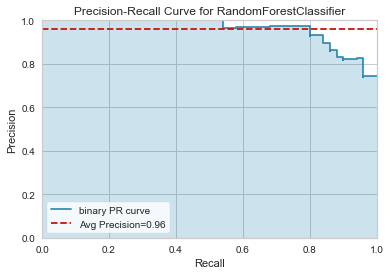

In [300]:
from yellowbrick.classifier import precision_recall_curve

visualizer = precision_recall_curve(model_rfc, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, cmap="Greens")

#### **``ROC Curve``**
##### **It should follow the y-axis to x-axis**

c:\users\rajsh\appdata\local\programs\python\python35\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


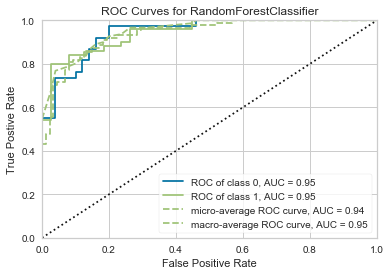

In [301]:
roc_auc = ROCAUC(model_rfc)
roc_auc.fit(X_train,y_train)
roc_auc.score(X_test,y_test)
roc_auc.show()

In [303]:
unseen_X.drop(['Unconjugated_bilirubin'],inplace=True,axis=1)

c:\users\rajsh\appdata\local\programs\python\python35\lib\site-packages\pandas\core\frame.py:4117: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [304]:
unseen_X.drop(['Alamine_Aminotransferase'],inplace=True,axis=1)  ## Between ALT and AST will drop one column based upon the results

In [305]:
unseen_X.drop(['Albumin'],inplace=True,axis=1)

In [306]:
unseen_X.drop(['Aspartate_Aminotransferase'],inplace=True,axis=1)

In [307]:
upsample_rfc_pred_unseen = model_rfc.predict(unseen_X)

In [308]:
metrics.accuracy_score(validate_y,upsample_rfc_pred_unseen)

ValueError: Found input variables with inconsistent numbers of samples: [466, 117]

In [295]:
metrics.precision_score(validate_y,upsample_rfc_pred_unseen)

0.9302325581395349

In [296]:
metrics.recall_score(validate_y,upsample_rfc_pred_unseen)

0.8

#### **``Model-2 :: XGBoost``**

In [ ]:
import xgboost

In [ ]:
xgbc = xgboost.XGBClassifier()

In [ ]:
xgbc_fit = xgbc.fit(X_train,y_train)

In [ ]:
xgbc_y_pred = xgbc.predict(X_test)

##### **``Feature_Importance``**

In [ ]:
pd.concat([pd.DataFrame(X_test.columns), pd.DataFrame(xgbc.feature_importances_)],axis=1)

In [ ]:
metrics.accuracy_score(y_test,xgbc_y_pred)

In [ ]:
metrics.precision_score(y_test,xgbc_y_pred)

In [ ]:
metrics.recall_score(y_test,xgbc_y_pred)

#### **``Confusion_Matrix``**

In [ ]:
from yellowbrick.classifier import confusion_matrix as conf_matrix

visualizer = conf_matrix(xgbc, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, cmap="Greens")

In [ ]:
np.unique(y_test,return_counts=True)

In [ ]:
unique, counts = np.unique(xgbc_y_pred,return_counts=True)
unique, counts

#### **``Precision_Recall Curve``**

In [ ]:
from yellowbrick.classifier import precision_recall_curve

visualizer = precision_recall_curve(xgbc, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, cmap="Greens")

#### **``ROC Curve``**
##### **It should follow the y-axis to x-axis**

In [ ]:
roc_auc = ROCAUC(xgbc)
roc_auc.fit(X_train,y_train)
roc_auc.score(X_test,y_test)
roc_auc.show()